In [ ]:
from google.colab import drive

# Try authenticating again before mounting
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#HIỂN THỊ DỮ LIỆU

In [ ]:
import pandas as pd

In [ ]:
path ="/content/drive/MyDrive/data/combined_csv_data (2).csv"
data = pd.read_csv(path)
data


#LƯU TRỮ THƯ MỤC VÀO DRIVE

In [ ]:
!cp -r "/content/data_split" "/content/drive/My Drive/"


#THỐNG KÊ DỮ LIỆU

In [ ]:
data["time"] = pd.to_datetime(data['time'], unit='s')
# Đặt cột "time" làm cột chỉ mục (index)
data.set_index('time', inplace=True)

data


In [ ]:
data = data[["icao24","lat","lon","velocity","heading","geoaltitude"]]
data

In [ ]:
data.describe()

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/data/data_full(1).csv", index_col="time")


In [ ]:

icao24 = set()
for index, row in data.iterrows():
  icao24.add(row["icao24"])


In [ ]:
print(len(list(icao24)))

1306


In [ ]:
import pandas as pd
import os

# Danh sách ICAO 24
icao24 = list(icao24)

# Tạo một thư mục để lưu các tệp con
output_dir = "output_directory"  # Thay đổi tên thư mục theo mong muốn của bạn
os.makedirs(output_dir, exist_ok=True)

# Lặp qua từng ICAO 24 trong danh sách
for icao24 in icao24:
    # Lọc dữ liệu cho từng ICAO 24
    subset_data = data[data['icao24'] == icao24]

    # Tạo tên tệp cho tệp con dựa trên giá trị của ICAO 24
    output_file_path = os.path.join(output_dir, f"{icao24}.csv")

    # Lưu dữ liệu vào tệp con
    subset_data.to_csv(output_file_path, index=True)


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/output_directory"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "data_full"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Chuyển đổi cột 'timestamp' thành đối tượng datetime
        data['time'] = pd.to_datetime(data['time'])

        # Tách dữ liệu thành các nhóm theo ngày
        for date, group_data in data.groupby(data['time'].dt.date):
            # Tạo tên tệp cho tệp nhỏ dựa trên ngày và ICAO 24
            output_file_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_{date}.csv")

            # Lưu dữ liệu vào tệp nhỏ
            group_data.to_csv(output_file_path, index=True)


<ipython-input-19-dc41d0972f29>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])
<ipython-input-19-dc41d0972f29>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


# XÓA QUỸ ĐẠO ÍT ĐIỂM

In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Kiểm tra kích thước tệp CSV
        file_size = os.path.getsize(input_file)
        if file_size == 0:
            print(f"File {filename} is empty or does not exist.")
            os.remove(input_file)
        else:
            try:
                # Đọc dữ liệu từ tệp CSV
                data = pd.read_csv(input_file)

                # Kiểm tra số lượng điểm của dữ liệu
                num_points = len(data)

                # Nếu số lượng điểm nhỏ hơn 100, xóa tệp CSV
                if num_points < 20:
                    os.remove(input_file)
            except Exception as e:
                print(f"Error reading file {filename}: {e}")


#Tách quỹ đạo theo time

In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/data_split"  # Thư mục để lưu các tệp CSV đã tách
non_split_dir = "/content/data_non_split"  # Thư mục để lưu các tệp không bị tách

# Tạo các thư mục đầu ra nếu chúng không tồn tại
os.makedirs(output_dir, exist_ok=True)
os.makedirs(non_split_dir, exist_ok=True)

# Ngưỡng thời gian ngắt quãng (giây)
time_gap_threshold = 3600

# Danh sách lưu trữ tên các tệp bị tách
split_files = []
non_split_files = []

# Hàm để tách dữ liệu thành các đoạn khác nhau dựa trên khoảng thời gian ngắt quãng
def split_trajectories(data, time_column, time_gap_threshold):
    # Chuyển đổi cột thời gian sang định dạng thời gian
    data[time_column] = pd.to_datetime(data[time_column])

    # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
    data['time_diff'] = data[time_column].diff().dt.total_seconds()

    # Xác định các điểm ngắt quãng dựa trên ngưỡng thời gian
    gaps = data['time_diff'] > time_gap_threshold

    # Nếu không có khoảng ngắt quãng nào vượt ngưỡng, trả về dữ liệu gốc
    if not gaps.any():
        return [data]

    # Tạo một cột để đánh dấu các đoạn quỹ đạo khác nhau
    data['segment'] = gaps.cumsum()

    # Tách dữ liệu thành các đoạn khác nhau
    segments = [segment_data.drop(columns=['time_diff', 'segment']) for _, segment_data in data.groupby('segment')]

    return segments

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(input_file)

        # Lọc các cột cần thiết
        data = data[['time', 'lat', 'lon', 'heading', 'velocity', 'geoaltitude']]

        # Tách các quỹ đạo bị ngắt quãng thời gian
        segments = split_trajectories(data, 'time', time_gap_threshold)

        # Kiểm tra xem tệp có bị ngắt quãng hay không
        if len(segments) == 1:
            # Sao chép tệp gốc vào thư mục không bị tách
            shutil.copy(input_file, non_split_dir)
            # Thêm tên tệp vào danh sách tệp không bị tách
            non_split_files.append(filename)
        else:
            # Thêm tên tệp vào danh sách tệp bị tách
            split_files.append(filename)

            # Lưu từng đoạn dữ liệu vào các file mới trong thư mục đầu ra nếu bị ngắt quãng
            for i, segment in enumerate(segments):
                output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_part_{i+1}.csv")
                segment.to_csv(output_file, index=False)

# In kết quả
print("Quá trình tách và lưu file hoàn tất.")
print("Danh sách các tệp bị tách:")
print(split_files)
print("Số lượng tệp bị tách:", len(split_files))
print("Danh sách các tệp không bị tách:")
print(non_split_files)
print("Số lượng tệp không bị tách:", len(non_split_files))


In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn đến thư mục chứa các tệp CSV không bị tách
input_dir = "/content/data_non_split"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Đường dẫn đến thư mục lưu các tệp CSV đã tách
output_dir = "/content/data_split"

# Tạo thư mục đầu ra nếu không tồn tại
os.makedirs(output_dir, exist_ok=True)

# Ngưỡng thời gian ngắt quãng (giây) cho việc kiểm tra lại
recheck_time_gap_threshold = 10

# Hàm để tách dữ liệu thành các đoạn khác nhau dựa trên khoảng thời gian ngắt quãng
def split_trajectories(data, time_column, time_gap_threshold):
    # Chuyển đổi cột thời gian sang định dạng thời gian
    data[time_column] = pd.to_datetime(data[time_column])

    # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
    data['time_diff'] = data[time_column].diff().dt.total_seconds()

    # Xác định các điểm ngắt quãng dựa trên ngưỡng thời gian
    gaps = data['time_diff'] > time_gap_threshold

    # Nếu không có khoảng ngắt quãng nào vượt ngưỡng, trả về dữ liệu gốc
    if not gaps.any():
        return [data]

    # Tạo một cột để đánh dấu các đoạn quỹ đạo khác nhau
    data['segment'] = gaps.cumsum()

    # Tách dữ liệu thành các đoạn khác nhau
    segments = [segment_data.drop(columns=['time_diff', 'segment']) for _, segment_data in data.groupby('segment')]

    return segments

# Danh sách lưu trữ tên các tệp bị tách
rechecked_split_files = []

# Kiểm tra các tệp trong non_split_dir cho khoảng thời gian ngắt quãng nhỏ hơn 10 giây
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(input_file)

        # Chuyển đổi cột thời gian sang định dạng thời gian
        data['time'] = pd.to_datetime(data['time'])

        # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
        data['time_diff'] = data['time'].diff().dt.total_seconds()

        # Kiểm tra nếu có bất kỳ khoảng thời gian ngắt quãng nào lớn hơn 10 giây
        if (data['time_diff'] > recheck_time_gap_threshold).any():
            # Tách dữ liệu dựa trên khoảng thời gian ngắt quãng 10 giây
            segments = split_trajectories(data, 'time', recheck_time_gap_threshold)

            # Thêm tên tệp vào danh sách tệp bị tách
            rechecked_split_files.append(filename)

            # Lưu từng đoạn dữ liệu vào các file mới trong thư mục đầu ra
            for i, segment in enumerate(segments):
                output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_part_{i+1}.csv")
                segment.to_csv(output_file, index=False)

            # Xóa tệp gốc khỏi thư mục non_split_dir
            os.remove(input_file)

# In kết quả
print("Quá trình kiểm tra và tách file hoàn tất.")
print("Danh sách các tệp bị tách lại do có khoảng thời gian ngắt quãng > 10 giây:")
print(rechecked_split_files)
print("Số lượng tệp bị tách lại:", len(rechecked_split_files))


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_non_split"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Hàm để kiểm tra và in ra khoảng thời gian ngắt quãng lớn hơn hoặc bằng 2 giây
def print_time_gaps(input_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
            # Đường dẫn đầy đủ đến tệp CSV
            input_file = os.path.join(input_dir, filename)

            # Đọc dữ liệu từ tệp CSV
            data = pd.read_csv(input_file)

            # Chuyển đổi cột 'time' sang datetime nếu cần thiết
            if 'time' in data.columns:
                data['time'] = pd.to_datetime(data['time'])

            # Tính toán khoảng thời gian ngắt quãng
            if 'time' in data.columns:
                time_diffs = data['time'].diff().dt.total_seconds().dropna()
                if (time_diffs >= 2).any():
                    print(f"File: {filename}")
                    print(f"Khoảng thời gian ngắt quãng >= 2 giây:")
                    for index, diff in time_diffs.items():  # Use .items() to iterate over (index, value) pairs
                        if diff >= 2:
                            print(f"   - Row {index + 1}: {diff} giây")
                    print()

print_time_gaps(input_dir)


#Chia dữ liệu

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Đường dẫn đến thư mục chứa các tệp CSV của bạn
input_folder = '/content/drive/MyDrive/merged_data'
# Đường dẫn đến thư mục lưu trữ các tệp đã chia
output_folder = '/content/drive/MyDrive/split_data'

# Tạo thư mục đầu ra nếu chưa tồn tại
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Tạo các thư mục con cho các tập D1 đến D5
for i in range(1, 6):
    os.makedirs(os.path.join(output_folder, f'D{i}/train'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, f'D{i}/test'), exist_ok=True)

# Hàm để chia và lưu các tệp CSV
def split_csv_files(input_folder, output_folder, test_size=0.1, n_splits=5):
    files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    for file in files:
        df = pd.read_csv(os.path.join(input_folder, file))

        for i in range(1, n_splits + 1):
            train, test = train_test_split(df, test_size=test_size, random_state=i)

            train.to_csv(os.path.join(output_folder, f'D{i}/train', file), index=False)
            test.to_csv(os.path.join(output_folder, f'D{i}/test', file), index=False)
            print(f'Processed {file} for split D{i}')

# Gọi hàm để chia và lưu các tệp CSV
split_csv_files(input_folder, output_folder)

print("Completed splitting CSV files into training and test sets.")


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Processed a94b02_2017-02-23.csv for split D2
Processed a94b02_2017-02-23.csv for split D3
Processed a94b02_2017-02-23.csv for split D4
Processed a94b02_2017-02-23.csv for split D5
Processed a41e74_2017-03-27.csv for split D1
Processed a41e74_2017-03-27.csv for split D2
Processed a41e74_2017-03-27.csv for split D3
Processed a41e74_2017-03-27.csv for split D4
Processed a41e74_2017-03-27.csv for split D5
Processed a6b55a_2017-01-15.csv for split D1
Processed a6b55a_2017-01-15.csv for split D2
Processed a6b55a_2017-01-15.csv for split D3
Processed a6b55a_2017-01-15.csv for split D4
Processed a6b55a_2017-01-15.csv for split D5
Processed a6b55a_2017-02-24.csv for split D1
Processed a6b55a_2017-02-24.csv for split D2
Processed a6b55a_2017-02-24.csv for split D3
Processed a6b55a_2017-02-24.csv for split D4
Processed a6b55a_2017-02-24.csv for split D5
Processed a6b55a_2017-03-08.csv for split D1
Processed a6b55a_2017-03-08.csv for split D

In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/drive/MyDrive/data_split"  # Thư mục để lưu các tệp CSV mới
os.makedirs(output_dir, exist_ok=True)

# Hàm để kiểm tra và tách các quỹ đạo
def split_trajectories(input_dir, output_dir, gap_threshold=3600):
    for filename in os.listdir(input_dir):
        if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
            # Đường dẫn đầy đủ đến tệp CSV
            input_file = os.path.join(input_dir, filename)

            # Đọc dữ liệu từ tệp CSV
            data = pd.read_csv(input_file)

            # Chuyển đổi cột 'time' sang datetime nếu cần thiết
            if 'time' in data.columns:
                data['time'] = pd.to_datetime(data['time'])

                # Tính toán khoảng thời gian ngắt quãng
                data['time_diff'] = data['time'].diff().dt.total_seconds()

                # Tách dữ liệu thành các quỹ đạo mới
                trajectory_id = 0
                start_index = 0

                for index, row in data.iterrows():
                    if index > 0 and data.at[index, 'time_diff'] >= gap_threshold:
                        # Tạo một quỹ đạo mới
                        trajectory_id += 1
                        trajectory_data = data.iloc[start_index:index].drop(columns=['time_diff'])

                        # Lưu quỹ đạo mới vào tệp CSV
                        output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_trajectory_{trajectory_id}.csv")
                        trajectory_data.to_csv(output_file, index=False)

                        # Cập nhật start_index
                        start_index = index

                # Lưu quỹ đạo cuối cùng
                if start_index < len(data):
                    trajectory_id += 1
                    trajectory_data = data.iloc[start_index:].drop(columns=['time_diff'])
                    output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_trajectory_{trajectory_id}.csv")
                    trajectory_data.to_csv(output_file, index=False)

# Thực thi hàm tách quỹ đạo
split_trajectories(input_dir, output_dir)


<ipython-input-43-4476dbab578a>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])
<ipython-input-43-4476dbab578a>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])
<ipython-input-43-4476dbab578a>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])
<ipython-input-43-4476dbab578a>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please 

# Vẽ quỹ đạo của các quỹ đạo bị ngắt quãng

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_full/a4ffcb_2017-03-05.csv")
data

# Đếm số lượng chuyến bay

In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

dem = 0

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        dem = dem +1
print(dem)

243


# Xóa những dòng có kinh độ và vĩ độ trùng nhau

In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục chứa các tệp CSV
output_dir = "data_full_khong_trung"

# Tạo thư mục mới nếu nó không tồn tại
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các tệp CSV trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Loại bỏ các dòng có kinh độ và vĩ độ trùng nhau
        unique_data = data.drop_duplicates(subset=['lon', 'lat'])

        # Chọn các cột cần giữ
        unique_data = unique_data[["time","icao24","lat","lon","velocity","heading","geoaltitude"]]

        # Tạo đường dẫn đến tệp CSV đầu ra
        output_file = os.path.join(output_dir, filename)

        # Ghi lại dữ liệu đã được lọc vào cùng một tệp CSV
        unique_data.to_csv(output_file, index=False)


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_split"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp



# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Lọc ra các hàng mà có kinh độ và vĩ độ duy nhất
        unique_data = data.drop_duplicates(subset=['lon', 'lat'])

        if len(unique_data) >1:



            #os.remove(input_file)


            sorted_data = data.sort_values(by='time')
            plt.figure(figsize=(8, 4))
            plt.plot(sorted_data['lon'], sorted_data['lat'], marker='o', linestyle='-', color='b')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'Flight Trajectory of {filename}')
            plt.grid(True)
            plt.show()



# Quãng đường di chuyển

In [ ]:
import math
import pandas as pd

# Đường dẫn đến tệp CSV
input_file = "/content/drive/MyDrive/data_split/0c20b9_2016-11-14_part_2.csv"  # Thay đổi đường dẫn tới tệp CSV của bạn

# Hàm để tính khoảng cách trên đơn vị cầu
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    # Chuyển đổi độ sang radian
    degrees_to_radians = math.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians

    # Tính khoảng cách cầu từ tọa độ cầu
    cos = (math.sin(phi1) * math.sin(phi2) * math.cos(theta1 - theta2) +
           math.cos(phi1) * math.cos(phi2))

    # Đảm bảo giá trị nằm trong khoảng [-1, 1] trước khi dùng hàm acos
    cos = max(min(cos, 1), -1)

    arc = math.acos(cos)

    # Nhân khoảng cách cung với bán kính Trái Đất
    earth_radius_km = 6371.0
    distance = arc * earth_radius_km

    return distance

# Đọc dữ liệu từ file CSV
data = pd.read_csv(input_file)

# Chỉ lấy các cột cần thiết
data = data[['time', 'lat', 'lon']]

# Sắp xếp dữ liệu theo thời gian nếu cần thiết
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values('time')

# Tính khoảng cách giữa các điểm liên tiếp
distances = []
for i in range(1, len(data)):
    lat1, lon1 = data.iloc[i-1][['lat', 'lon']]
    lat2, lon2 = data.iloc[i][['lat', 'lon']]
    distance = distance_on_unit_sphere(lat1, lon1, lat2, lon2)
    distances.append(distance)

# Tổng hợp quãng đường di chuyển
total_distance = sum(distances)

print(f"Quãng đường di chuyển của máy bay: {total_distance:.2f} km")


Quãng đường di chuyển của máy bay: 10.00 km


In [ ]:
import pandas as pd
import os
import math
import numpy as np

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/merged_data"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp

# Hàm để tính khoảng cách trên đơn vị cầu
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    # Chuyển đổi độ sang radian
    degrees_to_radians = math.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians

    # Tính khoảng cách cầu từ tọa độ cầu
    cos = (math.sin(phi1) * math.sin(phi2) * math.cos(theta1 - theta2) +
           math.cos(phi1) * math.cos(phi2))

    # Đảm bảo giá trị nằm trong khoảng [-1, 1] trước khi dùng hàm acos
    cos = max(min(cos, 1), -1)

    arc = math.acos(cos)

    # Nhân khoảng cách cung với bán kính Trái Đất
    earth_radius_km = 6371.0
    distance = arc * earth_radius_km

    return distance

# List to hold total distances for each file
total_distances = []

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Chỉ lấy các cột cần thiết
        if {'time', 'lat', 'lon'}.issubset(data.columns):
            data = data[['time', 'lat', 'lon']]

            # Sắp xếp dữ liệu theo thời gian nếu cần thiết
            data['time'] = pd.to_datetime(data['time'])
            data = data.sort_values('time')

            # Tính khoảng cách giữa các điểm liên tiếp
            distances = []
            for i in range(1, len(data)):
                lat1, lon1 = data.iloc[i-1][['lat', 'lon']]
                lat2, lon2 = data.iloc[i][['lat', 'lon']]
                distance = distance_on_unit_sphere(lat1, lon1, lat2, lon2)
                distances.append(distance)

            # Tổng hợp quãng đường di chuyển
            total_distance = sum(distances)
            total_distances.append((filename, total_distance))

            print(f"Quãng đường di chuyển của máy bay trong tệp {filename}: {total_distance:.2f} km")
        else:
            print(f"Tệp {filename} không có đủ các cột cần thiết.")

# Xóa các tệp có quãng đường di chuyển dưới 3km
for filename, total_distance in total_distances:
    if total_distance < 4:
        os.remove(os.path.join(input_dir, filename))
        print(f"Đã xóa tệp {filename} vì quãng đường di chuyển nhỏ hơn 3km.")

# Tính trung bình và độ lệch chuẩn của quãng đường di chuyển
if total_distances:
    distances = [distance for _, distance in total_distances if distance >= 3]
    if distances:
        mean_distance = np.mean(distances)
        std_distance = np.std(distances)
        print(f"Quãng đường di chuyển trung bình: {mean_distance:.2f} km")
        print(f"Độ lệch chuẩn của quãng đường di chuyển: {std_distance:.2f} km")
    else:
        print("Không có tệp nào có quãng đường di chuyển lớn hơn hoặc bằng 3km.")
else:
    print("Không có dữ liệu để tính toán.")


<ipython-input-3-d087e9b6144d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp a2c205_2017-02-24.csv: 10.93 km
Quãng đường di chuyển của máy bay trong tệp a2c205_2017-03-19.csv: 10.85 km
Quãng đường di chuyển của máy bay trong tệp a2c205_2017-03-24.csv: 10.82 km
Quãng đường di chuyển của máy bay trong tệp a50cb7_2016-11-18.csv: 10.80 km
Quãng đường di chuyển của máy bay trong tệp a46d70_2017-03-19.csv: 7.12 km
Quãng đường di chuyển của máy bay trong tệp a95306_2016-11-30.csv: 7.68 km
Quãng đường di chuyển của máy bay trong tệp a95306_2017-01-17.csv: 7.85 km
Quãng đường di chuyển của máy bay trong tệp a95306_2017-02-25.csv: 11.13 km
Quãng đường di chuyển của máy bay trong tệp a95306_2017-03-02.csv: 8.46 km
Quãng đường di chuyển của máy bay trong tệp a95306_2017-03-03.csv: 10.78 km
Quãng đường di chuyển của máy bay trong tệp a95306_2017-03-18.csv: 4.69 km
Quãng đường di chuyển của máy bay trong tệp a95306_2017-03-22.csv: 7.89 km
Quãng đường di chuyển của máy bay trong tệp a95306_2017-03-28.csv: 5.12 km
Quãng đường di chuy

<ipython-input-3-d087e9b6144d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp a87cbb_2017-03-06.csv: 7.59 km
Quãng đường di chuyển của máy bay trong tệp a6329d_2017-01-05.csv: 10.53 km
Quãng đường di chuyển của máy bay trong tệp a6329d_2017-03-26.csv: 10.93 km
Quãng đường di chuyển của máy bay trong tệp a41e94_2017-01-17.csv: 7.06 km
Quãng đường di chuyển của máy bay trong tệp a77e97_2017-02-24.csv: 6.87 km
Quãng đường di chuyển của máy bay trong tệp a77e97_2017-03-23.csv: 7.87 km
Quãng đường di chuyển của máy bay trong tệp a77e97_2017-03-25.csv: 7.50 km
Quãng đường di chuyển của máy bay trong tệp a0f4fd_2017-02-22.csv: 7.44 km
Quãng đường di chuyển của máy bay trong tệp a0f4fd_2017-03-03.csv: 8.94 km
Quãng đường di chuyển của máy bay trong tệp a0f4fd_2017-03-25.csv: 7.15 km
Quãng đường di chuyển của máy bay trong tệp a8c59e_2017-02-24.csv: 10.87 km
Quãng đường di chuyển của máy bay trong tệp a8c59e_2017-03-16.csv: 11.75 km
Quãng đường di chuyển của máy bay trong tệp aa4c42_2017-01-17.csv: 7.61 km
Quãng đường di chuyển

<ipython-input-3-d087e9b6144d>:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp ab879f_2017-03-14.csv: 7.16 km
Quãng đường di chuyển của máy bay trong tệp ab879f_2017-03-24.csv: 7.67 km
Quãng đường di chuyển của máy bay trong tệp a161b3_2017-01-19.csv: 7.57 km
Quãng đường di chuyển của máy bay trong tệp a4f7cb_2017-01-22.csv: 7.05 km
Quãng đường di chuyển của máy bay trong tệp c00d20_2017-02-23.csv: 11.12 km
Quãng đường di chuyển của máy bay trong tệp c00d20_2017-03-11.csv: 11.66 km
Quãng đường di chuyển của máy bay trong tệp aa9cc0_2017-01-21.csv: 9.45 km
Quãng đường di chuyển của máy bay trong tệp a86671_2017-01-16.csv: 10.61 km
Quãng đường di chuyển của máy bay trong tệp a86671_2017-01-18.csv: 7.24 km
Quãng đường di chuyển của máy bay trong tệp a86671_2017-03-12.csv: 8.60 km
Quãng đường di chuyển của máy bay trong tệp a86671_2017-03-13.csv: 11.94 km
Quãng đường di chuyển của máy bay trong tệp a86671_2017-03-14.csv: 7.11 km
Quãng đường di chuyển của máy bay trong tệp ad77d3_2017-03-02.csv: 8.56 km
Quãng đường di chuyển

<ipython-input-3-d087e9b6144d>:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp a38293_2016-11-30.csv: 7.58 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-01-15.csv: 8.56 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-01-20.csv: 6.68 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-01-24.csv: 8.78 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-02-22.csv: 8.13 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-02-28.csv: 11.03 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-03-02.csv: 8.14 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-03-06.csv: 6.60 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-03-08.csv: 7.57 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-03-12.csv: 7.21 km
Quãng đường di chuyển của máy bay trong tệp a38293_2017-03-20.csv: 8.72 km
Quãng đường di chuyển của máy bay trong tệp abae62_2017-03-06.csv: 8.32 km
Quãng đường di chuyển của máy bay trong tệp abae62_2017-03-26.csv: 8.33 km
Quãng đường di chuyển củ

<ipython-input-3-d087e9b6144d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp a6e89b_2017-03-02.csv: 8.98 km
Quãng đường di chuyển của máy bay trong tệp a6e89b_2017-03-28.csv: 8.79 km
Quãng đường di chuyển của máy bay trong tệp a6e89b_2017-03-29.csv: 7.20 km
Quãng đường di chuyển của máy bay trong tệp abc91f_2017-02-22.csv: 8.03 km
Quãng đường di chuyển của máy bay trong tệp abc91f_2017-03-12.csv: 8.68 km
Quãng đường di chuyển của máy bay trong tệp abc91f_2017-03-23.csv: 8.43 km
Quãng đường di chuyển của máy bay trong tệp abc91f_2017-03-24.csv: 8.79 km
Quãng đường di chuyển của máy bay trong tệp ab2504_2017-03-27.csv: 10.79 km
Quãng đường di chuyển của máy bay trong tệp a5c474_2017-03-28.csv: 6.88 km
Quãng đường di chuyển của máy bay trong tệp aaa2d3_2017-01-23.csv: 7.09 km
Quãng đường di chuyển của máy bay trong tệp a66a4c_2017-02-28.csv: 8.15 km
Quãng đường di chuyển của máy bay trong tệp a5142e_2016-11-26.csv: 10.86 km
Quãng đường di chuyển của máy bay trong tệp a5142e_2017-01-23.csv: 10.79 km
Quãng đường di chuyển 

<ipython-input-3-d087e9b6144d>:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp adcdcc_2017-01-22.csv: 7.10 km
Quãng đường di chuyển của máy bay trong tệp adcdcc_2017-03-29.csv: 8.25 km
Quãng đường di chuyển của máy bay trong tệp a4c104_2017-02-28.csv: 8.05 km
Quãng đường di chuyển của máy bay trong tệp ad3529_2017-03-21.csv: 7.93 km
Quãng đường di chuyển của máy bay trong tệp ad3529_2017-03-22.csv: 8.91 km
Quãng đường di chuyển của máy bay trong tệp ad3529_2017-03-28.csv: 9.65 km
Quãng đường di chuyển của máy bay trong tệp ac0417_2017-03-16.csv: 9.14 km
Quãng đường di chuyển của máy bay trong tệp abc329_2017-02-26.csv: 6.29 km
Quãng đường di chuyển của máy bay trong tệp abc329_2017-03-05.csv: 8.97 km
Quãng đường di chuyển của máy bay trong tệp ae13d1_2017-03-16.csv: 7.67 km
Quãng đường di chuyển của máy bay trong tệp ab6339_2017-03-23.csv: 7.88 km
Quãng đường di chuyển của máy bay trong tệp ad84de_2017-02-22.csv: 7.71 km
Quãng đường di chuyển của máy bay trong tệp ad84de_2017-03-24.csv: 7.84 km
Quãng đường di chuyển của

<ipython-input-3-d087e9b6144d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp a4d65c_2017-03-15.csv: 10.98 km
Quãng đường di chuyển của máy bay trong tệp ac5829_2017-03-28.csv: 8.24 km
Quãng đường di chuyển của máy bay trong tệp a16646_2017-03-01.csv: 8.23 km
Quãng đường di chuyển của máy bay trong tệp a16646_2017-03-08.csv: 11.17 km
Quãng đường di chuyển của máy bay trong tệp a736ff_2017-03-25.csv: 7.99 km
Quãng đường di chuyển của máy bay trong tệp a736ff_2017-03-28.csv: 9.10 km
Quãng đường di chuyển của máy bay trong tệp aa735a_2017-02-23.csv: 7.65 km
Quãng đường di chuyển của máy bay trong tệp a31380_2017-03-23.csv: 4.99 km
Quãng đường di chuyển của máy bay trong tệp a5955b_2017-02-08.csv: 10.74 km
Quãng đường di chuyển của máy bay trong tệp ab1971_2017-03-21.csv: 7.05 km
Quãng đường di chuyển của máy bay trong tệp a08321_2017-02-28.csv: 6.79 km
Quãng đường di chuyển của máy bay trong tệp a08321_2017-03-30.csv: 7.48 km
Quãng đường di chuyển của máy bay trong tệp a0f1bb_2017-01-17.csv: 10.09 km
Quãng đường di chuyển

<ipython-input-3-d087e9b6144d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp a16162_2017-03-23.csv: 9.05 km
Quãng đường di chuyển của máy bay trong tệp a771af_2017-02-13.csv: 9.08 km
Quãng đường di chuyển của máy bay trong tệp a771af_2017-03-23.csv: 8.46 km
Quãng đường di chuyển của máy bay trong tệp a44544_2017-01-23.csv: 7.25 km
Quãng đường di chuyển của máy bay trong tệp a7a616_2017-01-17.csv: 8.77 km
Quãng đường di chuyển của máy bay trong tệp a7a616_2017-01-25.csv: 11.17 km
Quãng đường di chuyển của máy bay trong tệp a7a616_2017-02-23.csv: 7.21 km
Quãng đường di chuyển của máy bay trong tệp a7a616_2017-03-06.csv: 7.43 km
Quãng đường di chuyển của máy bay trong tệp a7a616_2017-03-16.csv: 10.78 km
Quãng đường di chuyển của máy bay trong tệp a06abb_2016-11-30.csv: 8.05 km
Quãng đường di chuyển của máy bay trong tệp aa9963_2017-01-17.csv: 8.86 km
Quãng đường di chuyển của máy bay trong tệp ab013c_2017-01-22.csv: 11.64 km
Quãng đường di chuyển của máy bay trong tệp ab013c_2017-03-10.csv: 7.05 km
Quãng đường di chuyển 

<ipython-input-3-d087e9b6144d>:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp ab72b3_2017-03-19.csv: 9.19 km
Quãng đường di chuyển của máy bay trong tệp a2d33d_2017-03-09.csv: 5.07 km
Quãng đường di chuyển của máy bay trong tệp ab400f_2017-01-22.csv: 7.24 km
Quãng đường di chuyển của máy bay trong tệp ab400f_2017-02-27.csv: 7.79 km
Quãng đường di chuyển của máy bay trong tệp ab400f_2017-03-05.csv: 7.79 km
Quãng đường di chuyển của máy bay trong tệp ab400f_2017-03-26.csv: 7.88 km
Quãng đường di chuyển của máy bay trong tệp a18e6b_2017-03-09.csv: 8.34 km
Quãng đường di chuyển của máy bay trong tệp a4b52e_2016-12-01.csv: 10.65 km
Quãng đường di chuyển của máy bay trong tệp a4b52e_2017-03-13.csv: 11.08 km
Quãng đường di chuyển của máy bay trong tệp abd536_2017-02-27.csv: 7.49 km
Quãng đường di chuyển của máy bay trong tệp abd536_2017-03-14.csv: 8.66 km
Quãng đường di chuyển của máy bay trong tệp ab5c69_2016-12-06.csv: 10.42 km
Quãng đường di chuyển của máy bay trong tệp ab5c69_2017-01-16.csv: 6.50 km
Quãng đường di chuyển 

<ipython-input-3-d087e9b6144d>:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


Quãng đường di chuyển của máy bay trong tệp ab5c69_2017-02-27.csv: 7.21 km
Quãng đường di chuyển của máy bay trong tệp aa2ba1_2017-01-18.csv: 7.08 km
Quãng đường di chuyển của máy bay trong tệp ab3133_2016-12-04.csv: 7.43 km
Quãng đường di chuyển của máy bay trong tệp ab3133_2017-01-22.csv: 7.04 km
Quãng đường di chuyển của máy bay trong tệp ab3133_2017-02-23.csv: 7.46 km
Quãng đường di chuyển của máy bay trong tệp ab3133_2017-03-06.csv: 8.18 km
Quãng đường di chuyển của máy bay trong tệp ab3133_2017-03-21.csv: 8.01 km
Quãng đường di chuyển của máy bay trong tệp ab3133_2017-03-29.csv: 6.94 km
Quãng đường di chuyển của máy bay trong tệp a82a06_2017-02-24.csv: 7.28 km
Quãng đường di chuyển của máy bay trong tệp a82a06_2017-03-19.csv: 7.17 km
Quãng đường di chuyển của máy bay trong tệp ac066b_2017-03-23.csv: 10.29 km
Quãng đường di chuyển của máy bay trong tệp ab35cb_2017-03-26.csv: 8.11 km
Quãng đường di chuyển của máy bay trong tệp a78d73_2016-12-04.csv: 5.29 km
Quãng đường di chuyển củ

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_split"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp

# Hàm để tính khoảng cách trên đơn vị cầu
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    # Chuyển đổi độ sang radian
    degrees_to_radians = math.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians

    # Tính khoảng cách cầu từ tọa độ cầu
    cos = (math.sin(phi1) * math.sin(phi2) * math.cos(theta1 - theta2) +
           math.cos(phi1) * math.cos(phi2))

    # Đảm bảo giá trị nằm trong khoảng [-1, 1] trước khi dùng hàm acos
    cos = max(min(cos, 1), -1)

    arc = math.acos(cos)

    # Nhân khoảng cách cung với bán kính Trái Đất
    earth_radius_km = 6371.0
    distance = arc * earth_radius_km

    return distance

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Lọc ra các hàng mà có kinh độ và vĩ độ duy nhất
        unique_data = data.drop_duplicates(subset=['lon', 'lat'])

        if len(unique_data) > 1:
            # Sắp xếp dữ liệu theo thời gian nếu cần thiết
            data['time'] = pd.to_datetime(data['time'])
            sorted_data = data.sort_values(by='time')

            # Tính khoảng cách giữa các điểm liên tiếp
            distances = []
            for i in range(1, len(sorted_data)):
                lat1, lon1 = sorted_data.iloc[i-1][['lat', 'lon']]
                lat2, lon2 = sorted_data.iloc[i][['lat', 'lon']]
                distance = distance_on_unit_sphere(lat1, lon1, lat2, lon2)
                distances.append(distance)

            # Tổng hợp quãng đường di chuyển
            total_distance = sum(distances)

            # Vẽ quỹ đạo và hiển thị độ dài quãng đường
            plt.figure(figsize=(8, 4))
            plt.plot(sorted_data['lon'], sorted_data['lat'], marker='o', linestyle='-', color='b')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'Flight Trajectory of {filename}\nTotal Distance: {total_distance:.2f} km')
            plt.grid(True)
            plt.show()

            print(f"Quãng đường di chuyển của máy bay trong tệp {filename}: {total_distance:.2f} km")
        else:
            print(f"Tệp {filename} không có đủ các tọa độ duy nhất để tính toán.")


#Dữ liệu sau khi đi qua ConV1

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Đọc dữ liệu từ file CSV
file_path = '/content/drive/MyDrive/data_non_split/0c2052_2017-03-25.csv'
data = pd.read_csv(file_path)

# Chọn 6 dòng đầu tiên và 5 cột
data = data[['lat', 'lon', 'geoaltitude', 'velocity', 'heading']].head(6)

# Chuyển dữ liệu sang dạng numpy array
input_data = data.values.astype(np.float32)

# Thêm một trục mới để làm chiều batch (1 mẫu, 6 bước thời gian, 5 đặc trưng)
input_data = np.expand_dims(input_data, axis=0)

# Định nghĩa mô hình với một lớp Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(6, 5))
])

# In tóm tắt mô hình để xem chi tiết về các lớp và số lượng tham số
model.summary()

# Tạo đầu ra từ mô hình cho dữ liệu đầu vào
output_data = model.predict(input_data)

# In dữ liệu đầu vào và đầu ra để so sánh
print("Dữ liệu đầu vào:")
print(input_data[0])

print("\nDữ liệu sau khi đi qua Conv1D:")
print(output_data[0])


# Thời gian của quỹ đạo

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_non_split"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp

# List to hold total times for each file
total_times = []

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Chuyển đổi cột thời gian sang định dạng thời gian
        data['time'] = pd.to_datetime(data['time'])

        # Tính tổng thời gian (chênh lệch giữa thời gian cuối và thời gian đầu)
        total_time = (data['time'].max() - data['time'].min()).total_seconds()
        total_times.append(total_time)

        print(f"Tổng thời gian của tệp {filename}: {total_time:.2f} giây")

# Tính trung bình và độ lệch chuẩn của tổng thời gian
if total_times:
    mean_time = np.mean(total_times)
    std_time = np.std(total_times)
    print(f"Tổng thời gian trung bình: {mean_time:.2f} giây")
    print(f"Độ lệch chuẩn của tổng thời gian: {std_time:.2f} giây")
else:
    print("Không có dữ liệu để tính toán.")


Tổng thời gian của tệp a0f7e2_2017-03-18.csv: 45.00 giây
Tổng thời gian của tệp a77ad8_2016-12-05.csv: 52.00 giây
Tổng thời gian của tệp a77ad8_2017-01-15.csv: 31.00 giây
Tổng thời gian của tệp a77ad8_2017-03-27.csv: 44.00 giây
Tổng thời gian của tệp a57253_2017-01-18.csv: 396.00 giây
Tổng thời gian của tệp a57253_2017-01-19.csv: 86.00 giây
Tổng thời gian của tệp a9fe30_2017-03-03.csv: 358.00 giây
Tổng thời gian của tệp ac1190_2017-01-21.csv: 44.00 giây
Tổng thời gian của tệp ac1190_2017-03-10.csv: 47.00 giây
Tổng thời gian của tệp ac8e1d_2017-03-02.csv: 48.00 giây
Tổng thời gian của tệp a1308a_2017-02-27.csv: 85.00 giây
Tổng thời gian của tệp a78dbe_2016-12-07.csv: 415.00 giây
Tổng thời gian của tệp a78dbe_2017-01-20.csv: 39.00 giây
Tổng thời gian của tệp a78dbe_2017-02-24.csv: 368.00 giây
Tổng thời gian của tệp a78dbe_2017-03-23.csv: 89.00 giây
Tổng thời gian của tệp a50175_2016-12-01.csv: 107.00 giây
Tổng thời gian của tệp ab2760_2017-03-12.csv: 56.00 giây
Tổng thời gian của tệp ab2

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
dem = 0
# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
   if filename == "a00439_2017-01-15.csv":
    input_file = os.path.join(input_dir,filename)
    print(input_file)


/content/drive/MyDrive/data_full/a00439_2017-01-15.csv


In [ ]:
import os
import shutil

# Đường dẫn đến hai thư mục chứa các file CSV
folder1 = '/content/drive/MyDrive/data_non_split'
folder2 = '/content/drive/MyDrive/data_split'

# Đường dẫn đến thư mục đầu ra để lưu trữ các file CSV đã gộp
output_folder = '/content/drive/MyDrive/merged_data'

# Tạo thư mục đầu ra nếu chưa tồn tại
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Hàm để gộp các file CSV từ mỗi thư mục vào thư mục đầu ra
def merge_csv_files(input_folder, output_folder):
    files = os.listdir(input_folder)
    for file in files:
        if file.endswith('.csv'):
            shutil.copyfile(os.path.join(input_folder, file), os.path.join(output_folder, file))

# Gọi hàm để gộp các file từ folder1 vào thư mục đầu ra
merge_csv_files(folder1, output_folder)

# Gọi hàm để gộp các file từ folder2 vào thư mục đầu ra
merge_csv_files(folder2, output_folder)

print("Đã gộp các file thành công vào thư mục", output_folder)


Đã gộp các file thành công vào thư mục /content/drive/MyDrive/merged_data


In [ ]:
data = pd.read_csv("/content/data_full/abf6ae_2017-03-14.csv")
data


In [ ]:

data1 = data.iloc[149:284]
data1.to_csv(os.path.join("/content/drive/MyDrive/data_full","split126.csv"))
#data2 = data.iloc[317:365]
#data2.to_csv(os.path.join("/content/drive/MyDrive/data_full","split43.csv"))


In [ ]:
import pandas as pd

search_date = '2017-03-07'
# Chuyển đổi ngày tìm kiếm sang định dạng datetime
search_date = pd.to_datetime(search_date)

# Lọc các chuyến bay trong ngày tìm kiếm và có chỉ số icao24 nhất định
flights_on_search_date = data[(data.index.date == search_date.date()) & (data['icao24'] == '2c0516')] # tb

print(flights_on_search_date)
flights_on_search_date.to_csv("ex1.csv",index = True)

In [ ]:
data = pd.read_csv("/content/data_fix_new/a4943e_2017-01-22.csv")
 # Vẽ biểu đồ đường của cột 'geoaltitude' theo 'time'
plt.figure(figsize=(8, 4))
plt.plot(data['time'], data['velocity'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('velocity')
plt.title(f'Velocity Over Time for {filename}')
plt.grid(True)
plt.show()


In [ ]:
data = pd.read_csv("/content/data_loss_new/a4943e_2017-01-22.csv")
 # Vẽ biểu đồ đường của cột 'geoaltitude' theo 'time'
plt.figure(figsize=(8, 4))
plt.plot(data['time'], data['velocity'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('velocity')
plt.title(f'Velocity Over Time for {filename}')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Lọc ra các hàng mà có kinh độ và vĩ độ duy nhất
        unique_data = data.drop_duplicates(subset=['lon', 'lat'])

        if len(unique_data) > 30:
            # Sắp xếp dataframe theo cột 'time'
            sorted_data = data.sort_values(by='time')

            # Vẽ biểu đồ đường của cột 'velocity' theo 'time' với các điểm riêng biệt không nối với nhau
            plt.figure(figsize=(8, 4))
            plt.plot(sorted_data['time'], sorted_data['velocity'], marker='o', linestyle='', color='b')
            plt.xlabel('Time')
            plt.ylabel('Velocity')
            plt.title(f'Velocity Over Time for {filename}')
            plt.grid(True)
            plt.show()


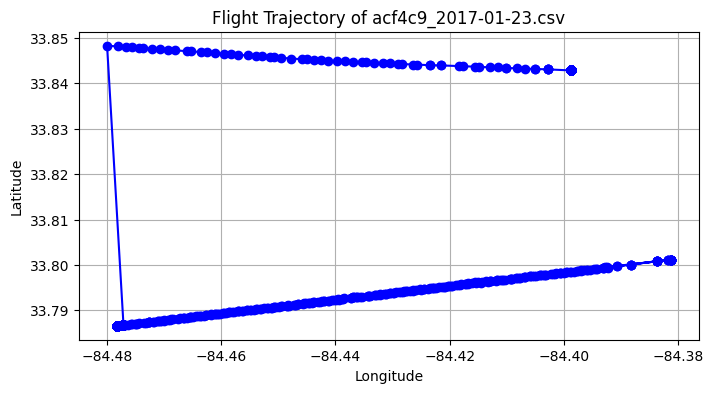

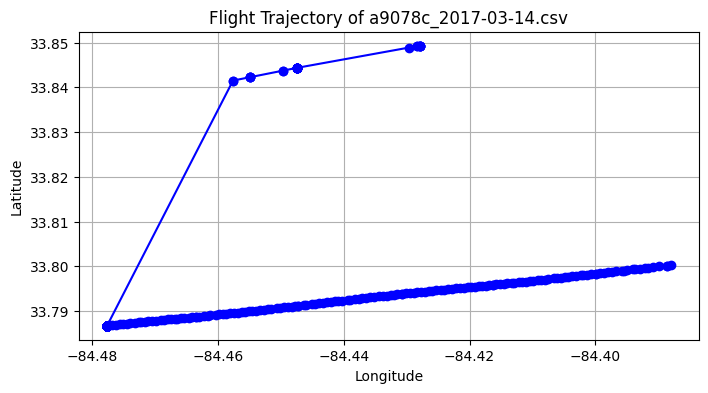

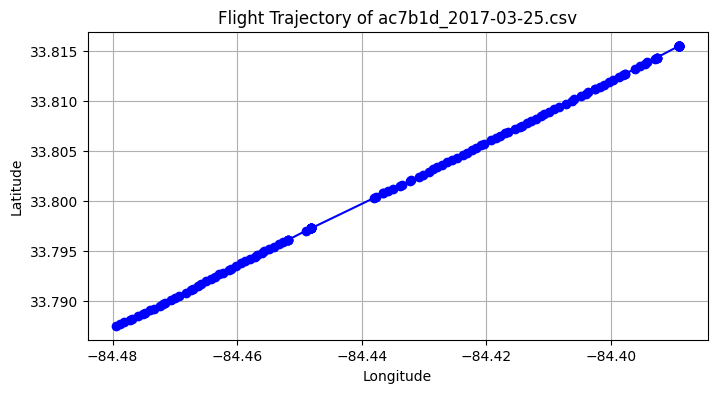

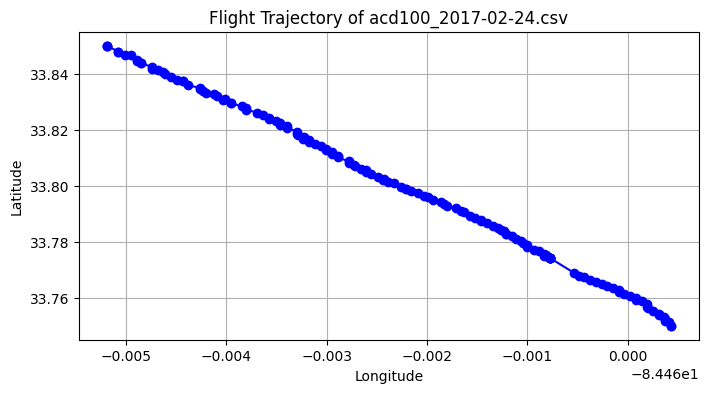

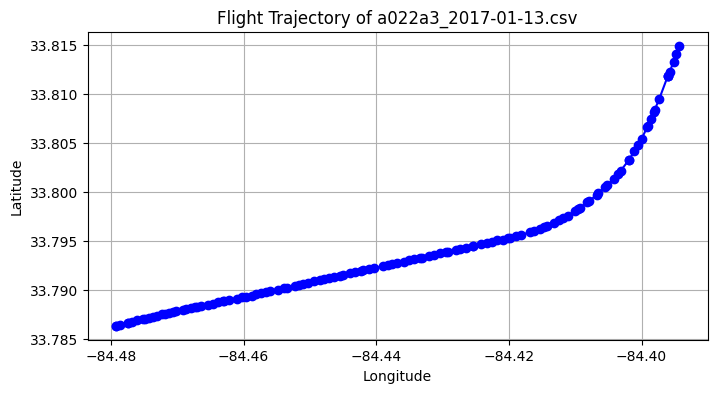

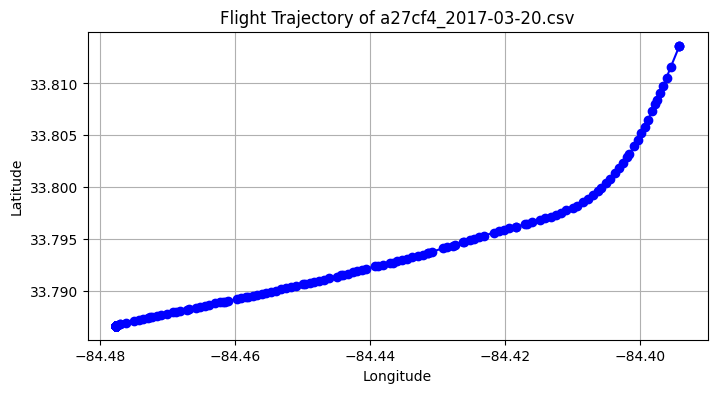

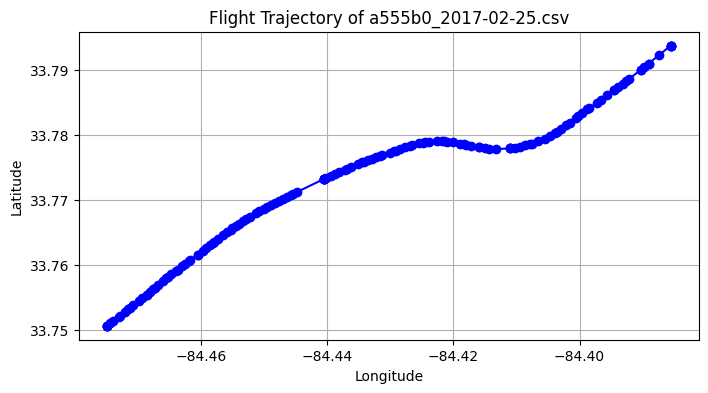

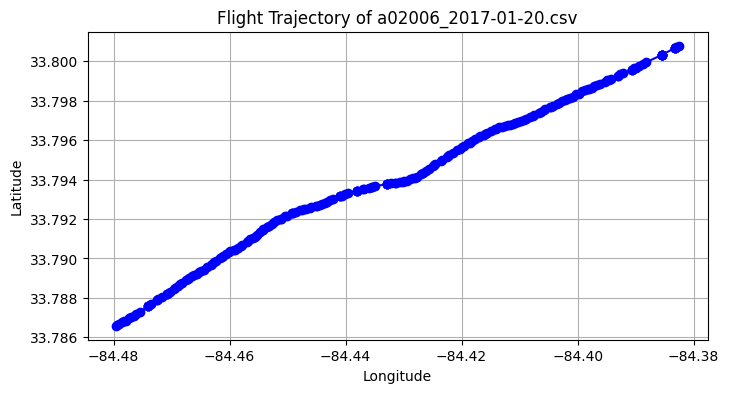

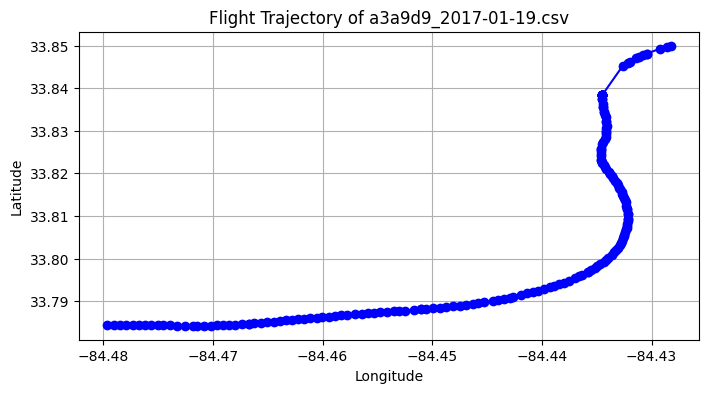

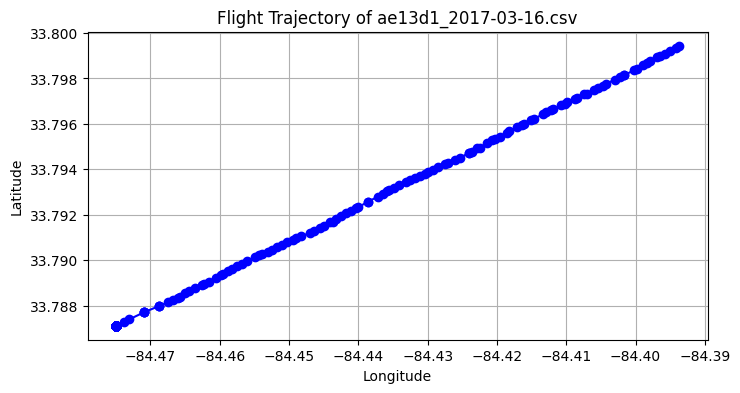

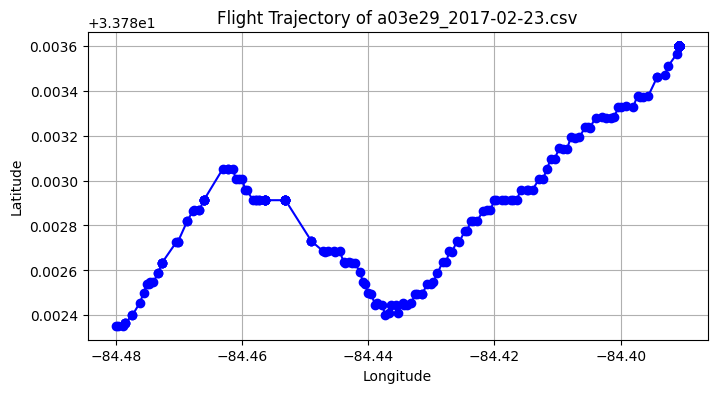

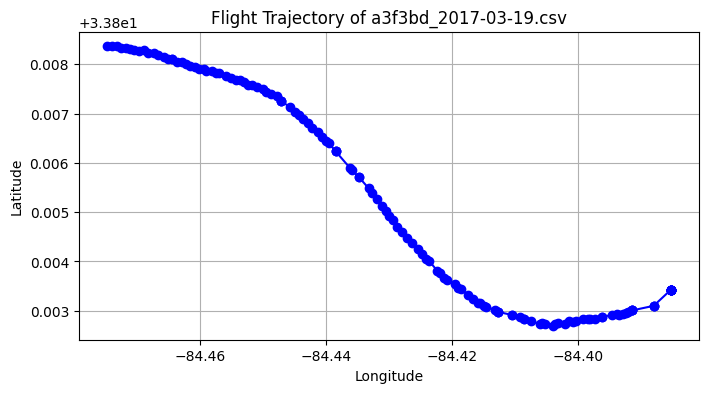

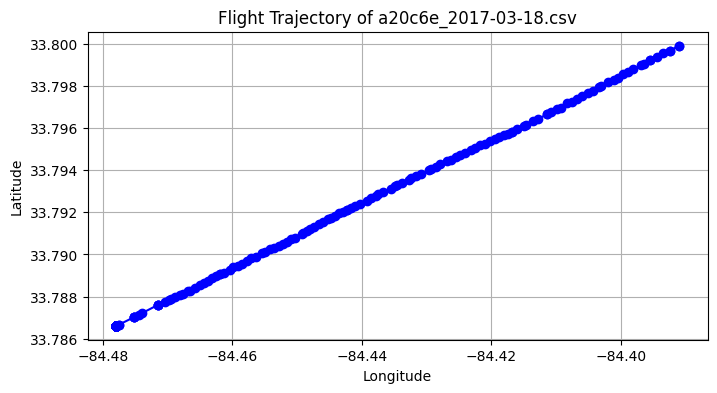

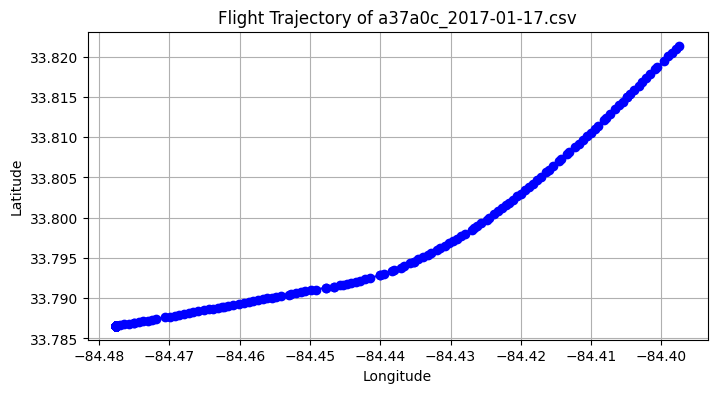

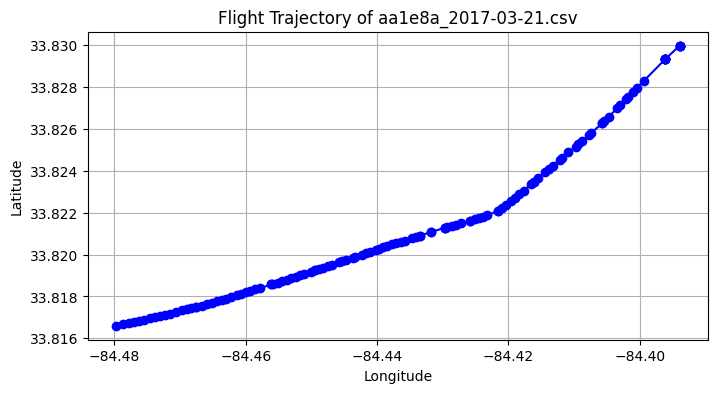

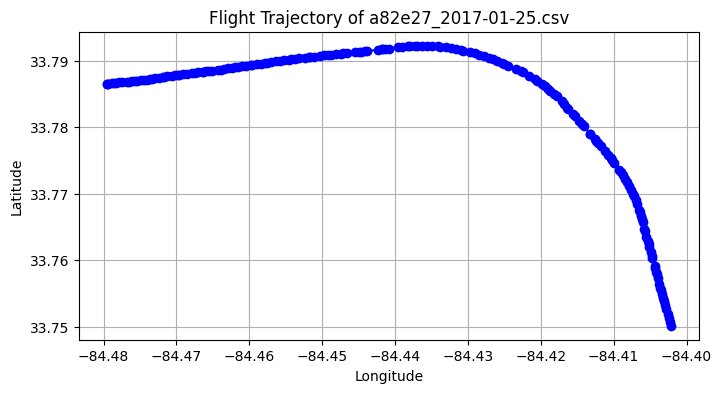

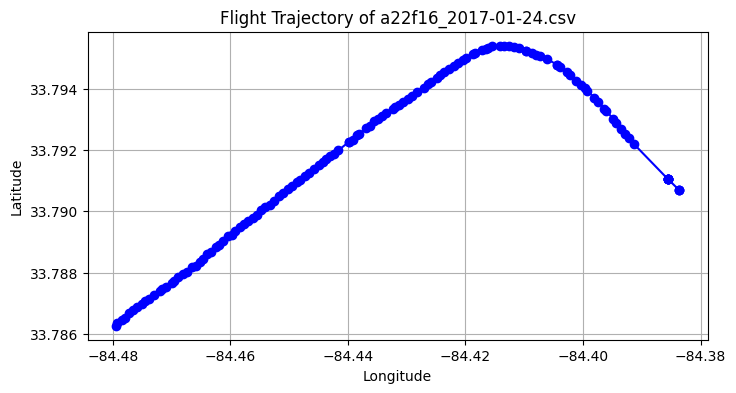

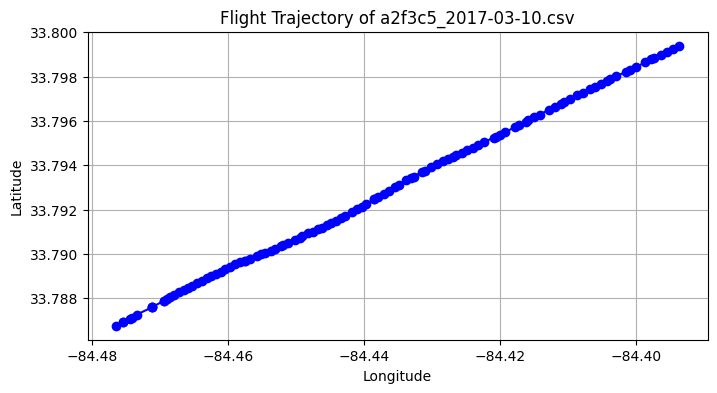

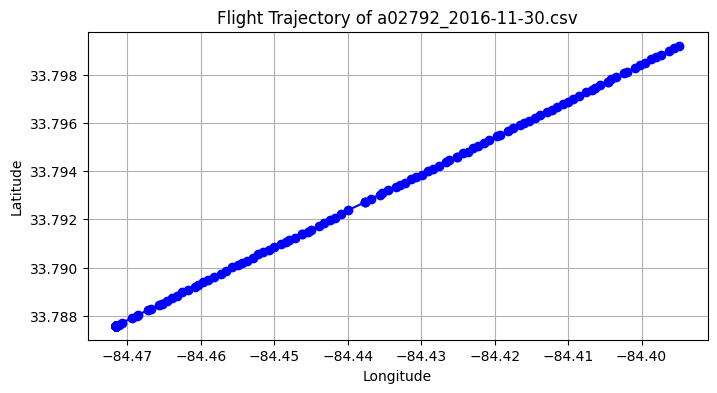

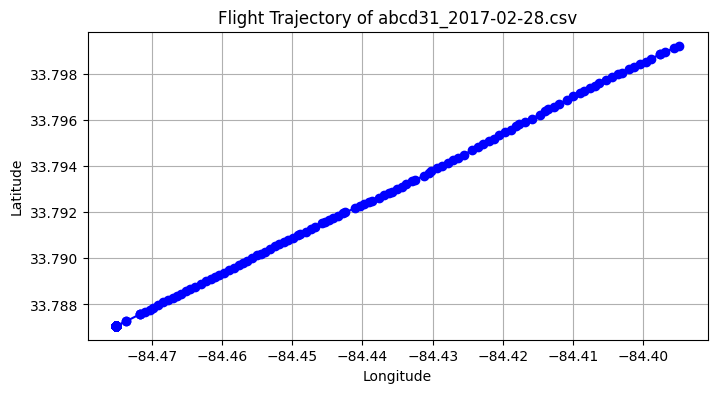

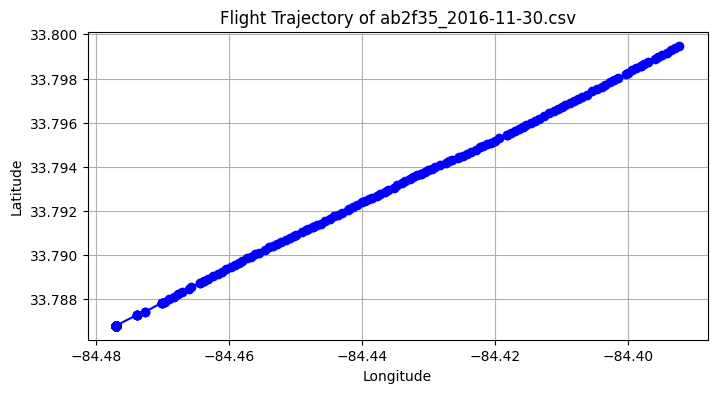

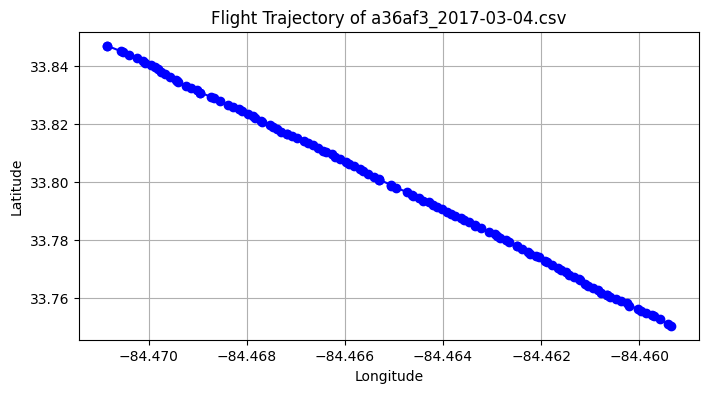

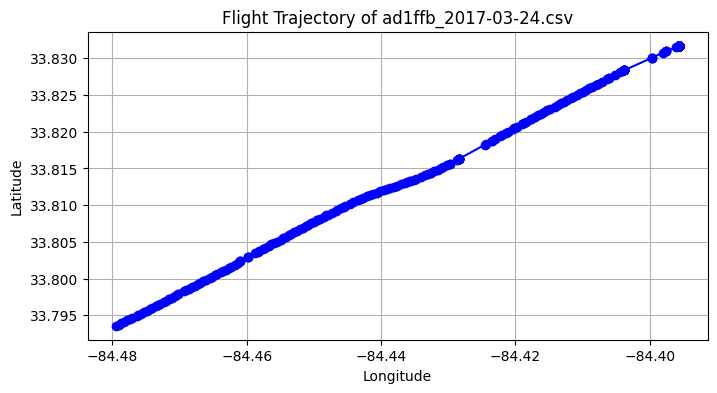

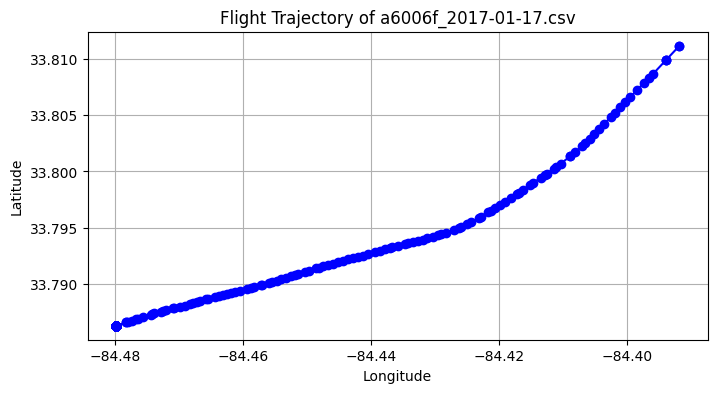

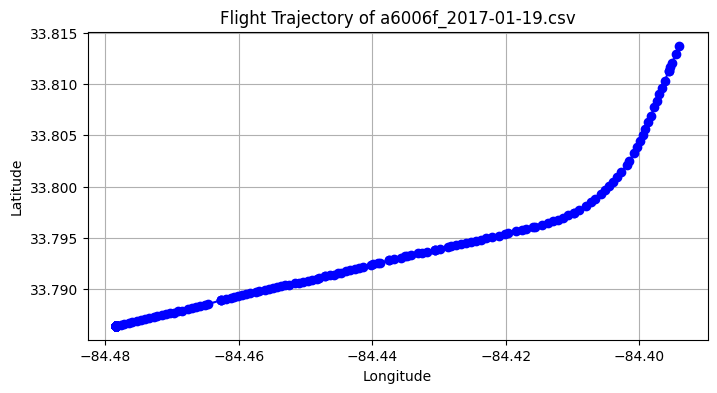

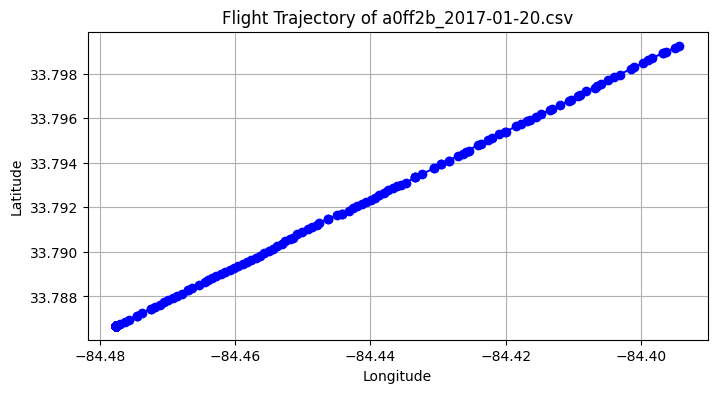

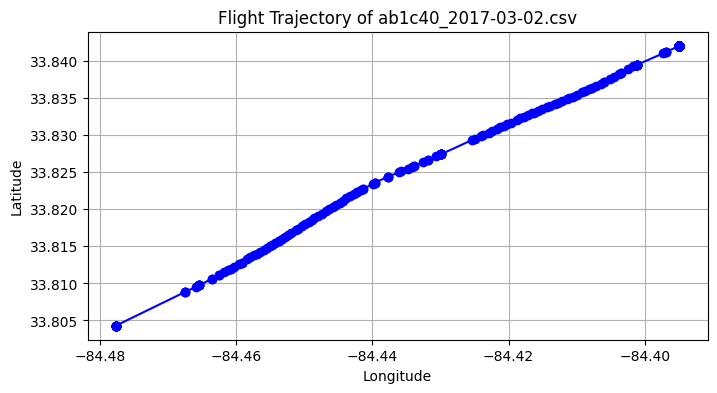

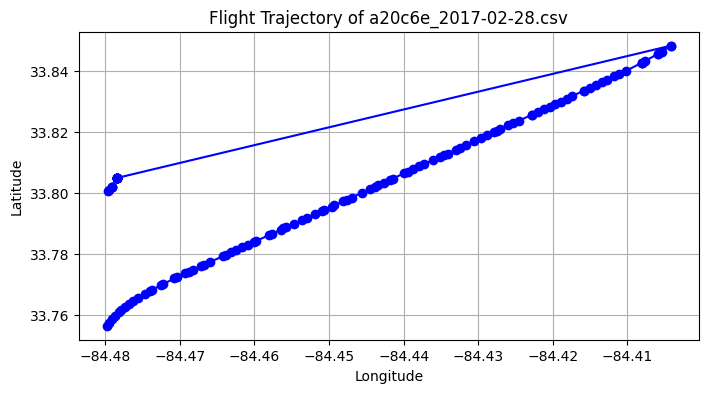

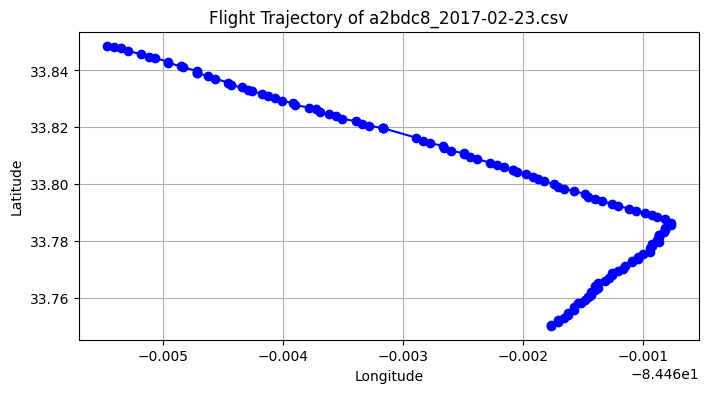

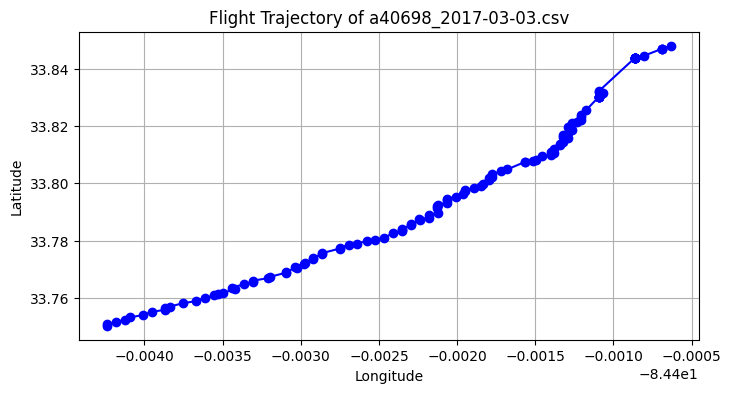

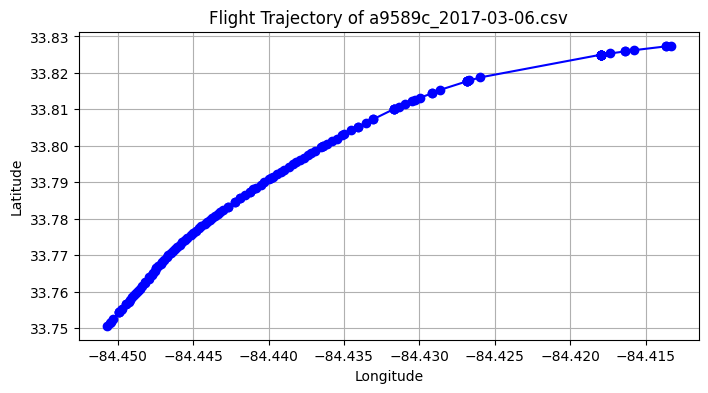

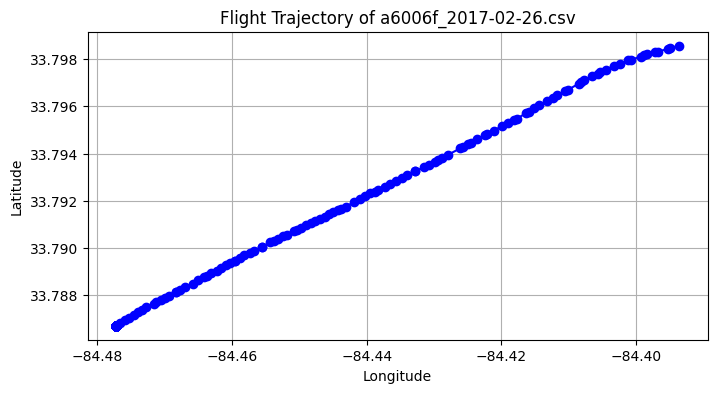

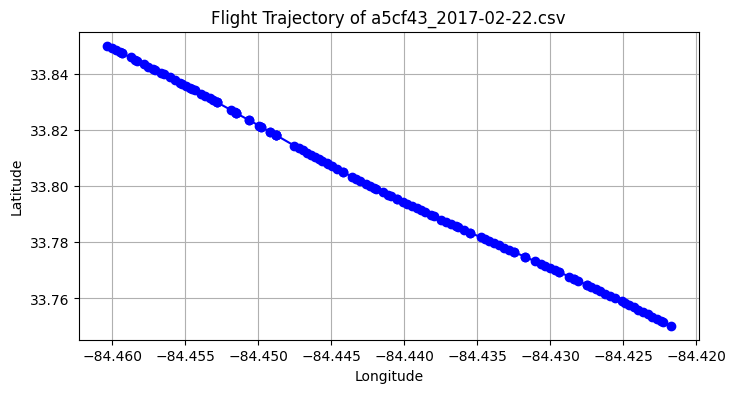

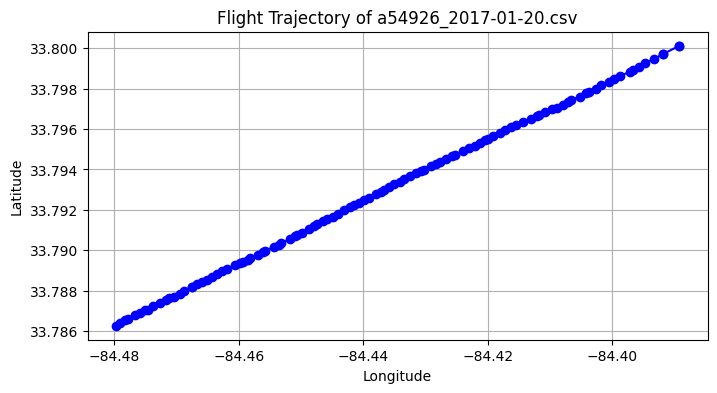

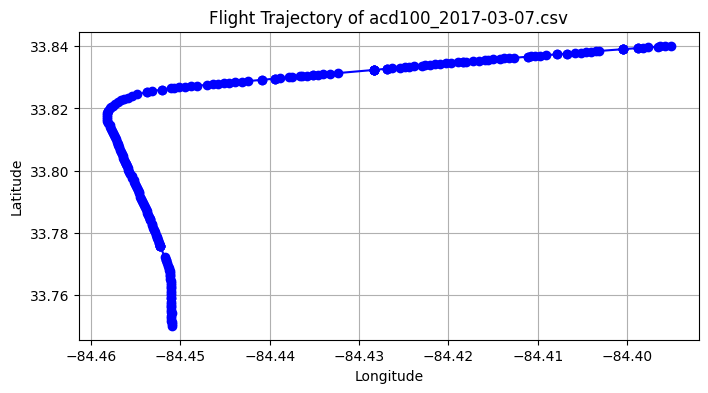

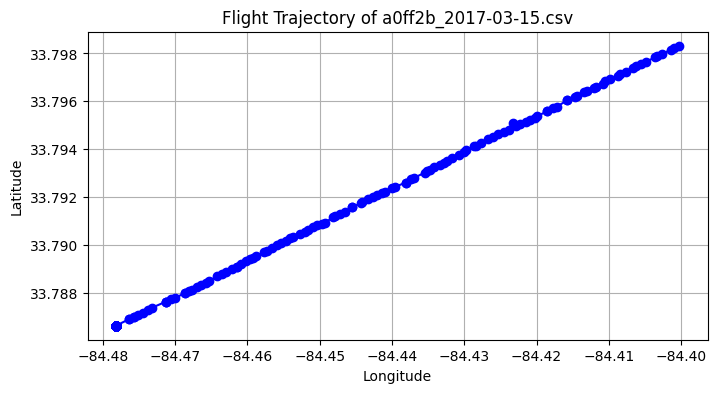

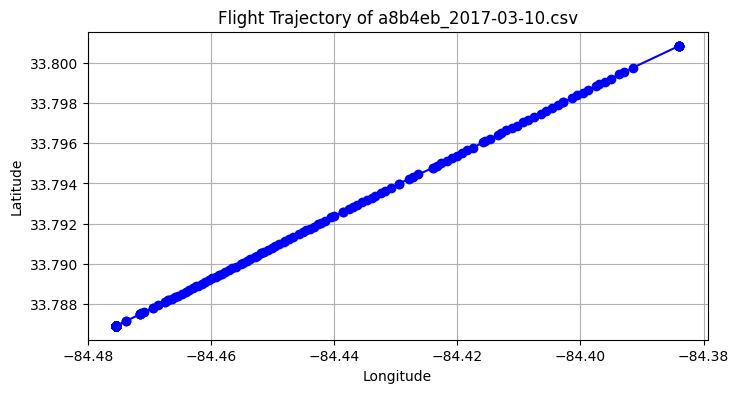

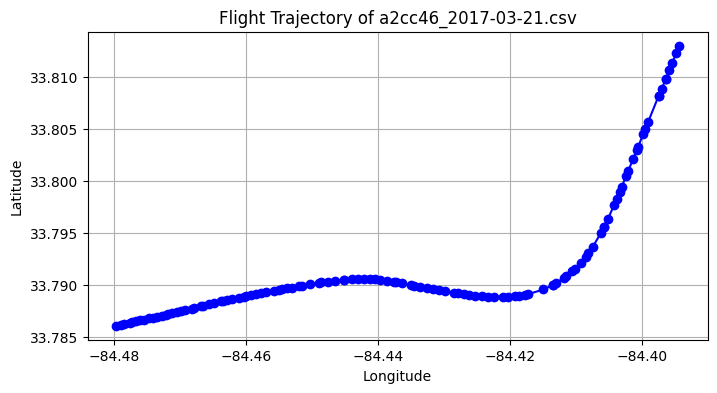

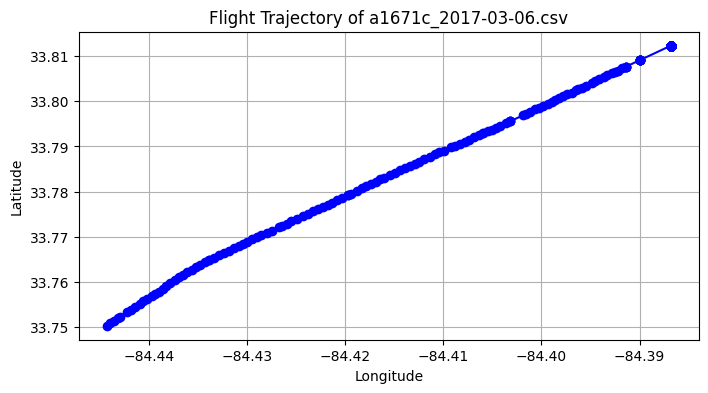

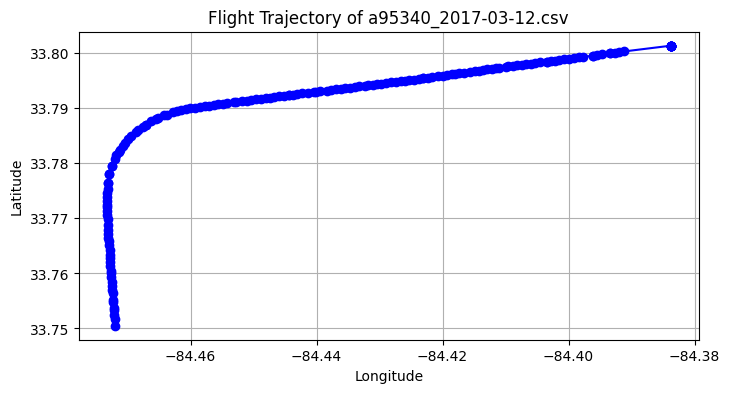

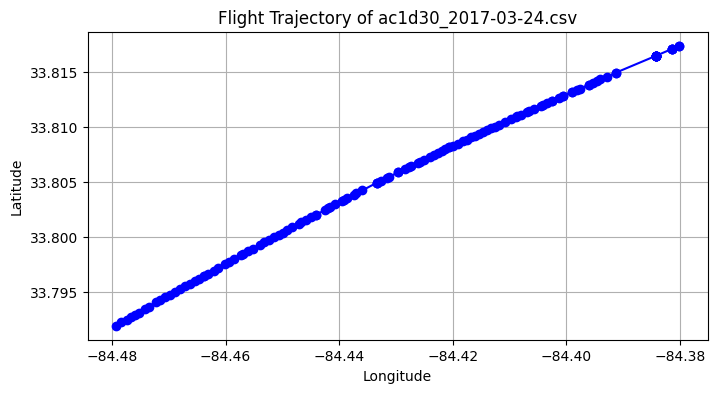

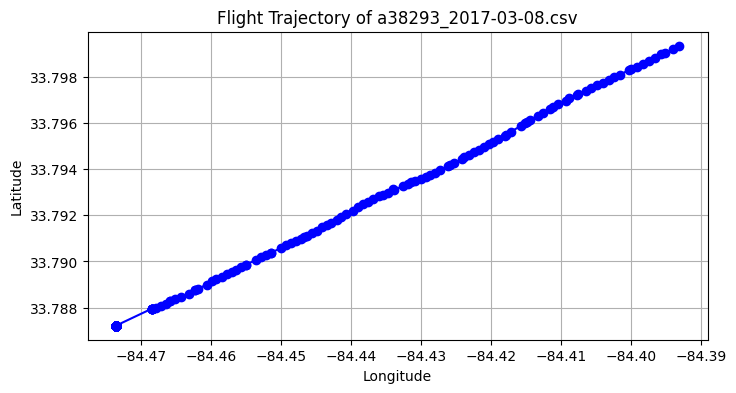

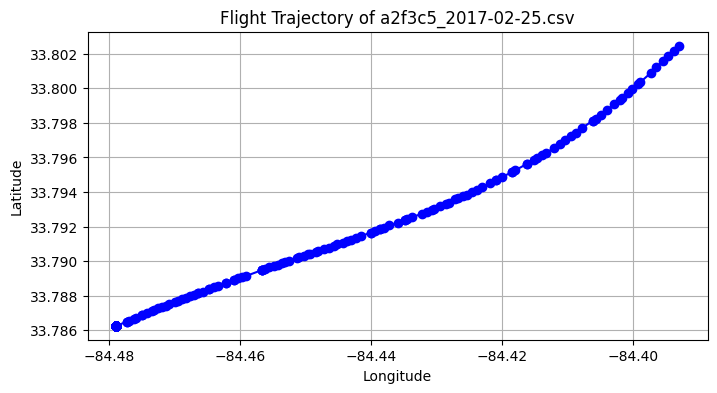

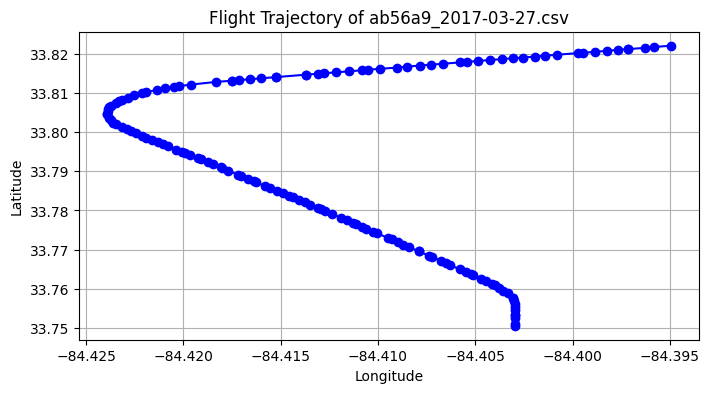

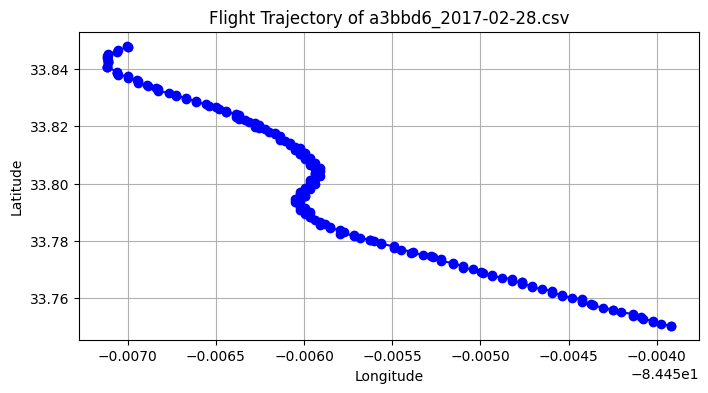

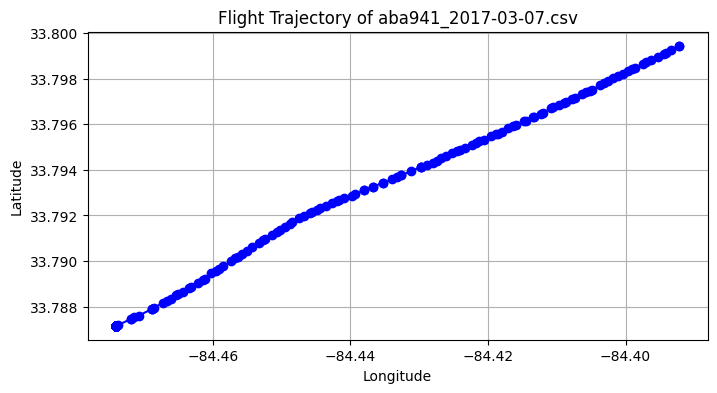

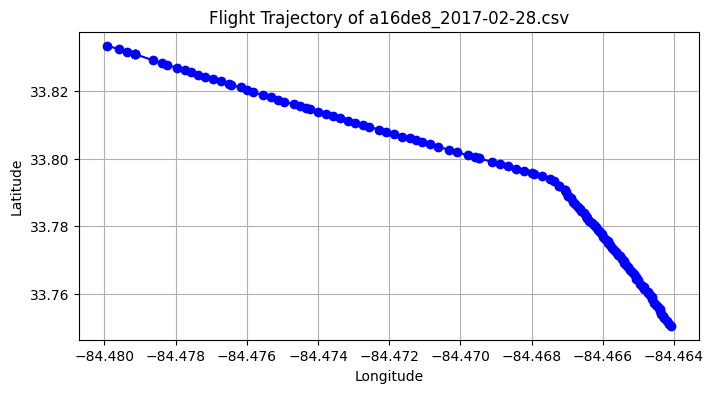

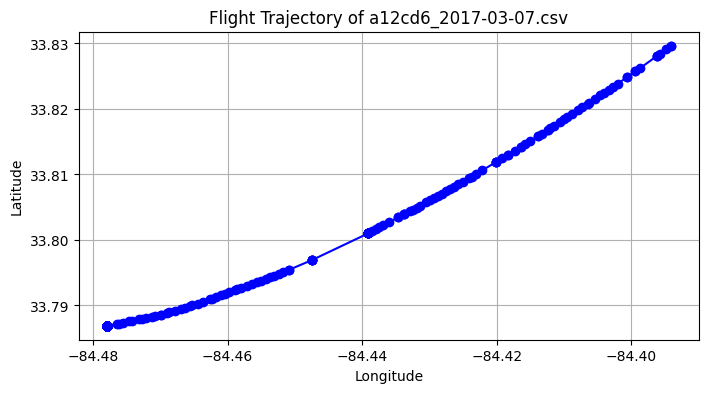

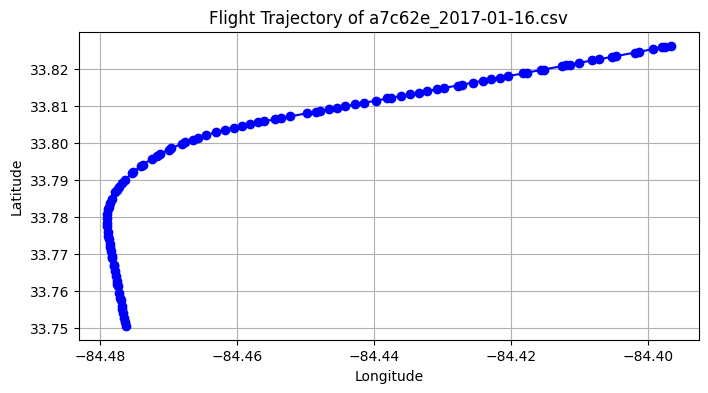

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

input_dir = "/content/data_full"
for filename in os.listdir(input_dir):
    input_file = os.path.join(input_dir, filename)
    data = pd.read_csv(input_file)

    # Vẽ quỹ đạo của từng chuyến bay
    plt.figure(figsize=(8, 4))
    plt.plot(data['lon'], data['lat'], marker='o', linestyle='-', color='b')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Flight Trajectory of {filename}')
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_train"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "data_full"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Kiểm tra các cột "heading", "velocity", và "geoaltitude" không chứa giá trị null
        if data["heading"].notnull().all() and data["velocity"].notnull().all() and data["geoaltitude"].notnull().all():
            # Lưu DataFrame đã được lọc vào một tệp mới

            output_file = os.path.join(output_dir, filename)
            data.to_csv(output_file, index=False)
            os.remove( input_file)


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_loss_new"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Kiểm tra xem cột "heading" có giá trị null không
        if data["heading"].isnull().any():
            # Tính số dòng dữ liệu thiếu
            missing_rows = data["heading"].isnull().sum()

            # Tính tổng số dòng dữ liệu
            total_rows = len(data)

            # In ra số dòng dữ liệu thiếu và tổng số dòng dữ liệu
            print(f"File: {filename}, Missing Rows: {missing_rows}, Total Rows: {total_rows}")


File: a9044d_2017-01-12.csv, Missing Rows: 1, Total Rows: 96
File: abe3e6_2017-02-28.csv, Missing Rows: 1, Total Rows: 34
File: a0902d_2016-11-30.csv, Missing Rows: 1, Total Rows: 121
File: abf09e_2017-02-24.csv, Missing Rows: 3, Total Rows: 44
File: aa96e2_2017-01-19.csv, Missing Rows: 2, Total Rows: 37
File: acd86e_2017-03-28.csv, Missing Rows: 1, Total Rows: 46
File: ab09b4_2017-02-28.csv, Missing Rows: 1, Total Rows: 39
File: ad97cb_2016-12-05.csv, Missing Rows: 1, Total Rows: 85
File: adea7f_2017-03-21.csv, Missing Rows: 1, Total Rows: 81
File: a08321_2017-01-22.csv, Missing Rows: 1, Total Rows: 43
File: a4943e_2017-01-22.csv, Missing Rows: 4, Total Rows: 30
File: a2e5d1_2017-02-27.csv, Missing Rows: 1, Total Rows: 97
File: a118e0_2017-01-13.csv, Missing Rows: 1, Total Rows: 83
File: a7debf_2017-03-04.csv, Missing Rows: 1, Total Rows: 41
File: a40359_2017-03-09.csv, Missing Rows: 1, Total Rows: 41
File: ad340d_2017-01-24.csv, Missing Rows: 1, Total Rows: 67
File: abe1b6_2017-03-30

In [ ]:
import os
import pandas as pd
from scipy.interpolate import interp1d

input_dir = "/content/data_full_loss"
output_dir = "data_fix_new"

# Tạo thư mục đầu ra nếu nó chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

# Duyệt qua từng tệp trong thư mục đầu vào
for file_name in os.listdir(input_dir):
    input_file = os.path.join(input_dir, file_name)
    data = pd.read_csv(input_file)

    # Sắp xếp dữ liệu theo cột 'time'
    data = data.sort_values(by='time')

    # Duyệt qua từng cột
    for col in ["heading", "velocity", "geoaltitude"]:
        # Kiểm tra giá trị thiếu trong cột
        missing_values = data[col].isnull()

        # Nếu có giá trị thiếu trong cột
        if missing_values.any():
            # Đảo ngược dữ liệu
            reversed_data = data[::-1]

            # Tạo một mảng chứa chỉ số của các giá trị không thiếu
            non_missing_indices = reversed_data.index[~missing_values[::-1]]

            # Tạo một mảng chứa các giá trị không thiếu
            non_missing_values = reversed_data[col][~missing_values[::-1]]

            # Tạo một hàm spline bậc 3 dựa trên các giá trị không thiếu
            spline_func = interp1d(non_missing_indices, non_missing_values, kind="cubic", fill_value="extrapolate")

            # Dự đoán các giá trị thiếu bằng cách sử dụng hàm spline
            predicted_values = spline_func(reversed_data.index)

            # Cập nhật các giá trị thiếu trong cột bằng các giá trị được dự đoán
            data[col] = predicted_values[::-1]  # Đảo ngược lại dữ liệu

    # Lưu dataframe đã được điều chỉnh vào một tệp CSV mới trong thư mục đầu ra
    output_file = os.path.join(output_dir, file_name)
    data.to_csv(output_file, index=False)


In [ ]:
data1 = data1[["lat","lon","velocity","heading","geoaltitude"]]
data1

#Xóa Thư Mục


In [ ]:
import os

# Đường dẫn đến thư mục gốc
root_directory = "/content/drive/MyDrive/processed_data"

# Lặp qua tất cả các đối tượng trong thư mục gốc
for item in os.listdir(root_directory):
    item_path = os.path.join(root_directory, item)
    # Kiểm tra xem đối tượng là một tệp hay không
    if os.path.isfile(item_path):
        # Xóa tệp con
        os.remove(item_path)


In [ ]:
import os
import pandas as pd

input_dir = "/content/drive/MyDrive/data_full"


# Khởi tạo một DataFrame rỗng để lưu trữ dữ liệu gộp
merged_data = pd.DataFrame()

# Lặp qua từng tệp trong thư mục input_dir
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ mỗi tệp CSV và gộp vào DataFrame merged_data
        data = pd.read_csv(input_file)
        merged_data = pd.concat([merged_data, data], ignore_index=True)

# Chọn các cột cần thiết từ merged_data
merged_data = merged_data[["time", "icao24", "lat", "lon", "velocity", "heading", "geoaltitude"]]

# Lưu DataFrame merged_data vào tệp CSV mới
merged_data.to_csv(output_file, index=False)

print("Merged data saved to:", output_file)


Merged data saved to: /content/data_full_fix(3).csv


In [ ]:
import os
import pandas as pd

input_dir = "/content/data_non_split"

# Lặp qua từng tệp trong thư mục input_dir
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)
        data = pd.read_csv(input_file)
        output = os.path.join("/content/data_split",filename)

        data.to_csv(output, index = False)



In [ ]:
import os
import pandas as pd

input_dir = "/content/drive/MyDrive/data_full"

dem = 0
# Lặp qua từng tệp trong thư mục input_dir
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)
        data = pd.read_csv(input_file)
        if dem <10 :
            output = os.path.join("/content/drive/MyDrive/data_test",filename)
            data.to_csv(output, index = False)
            dem = dem + 1
            os.remove(input_file)



In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/data_split"  # Thư mục để lưu các tệp CSV đã tách

# Tạo thư mục đầu ra nếu nó không tồn tại
os.makedirs(output_dir, exist_ok=True)

# Ngưỡng thời gian ngắt quãng (giây)
time_gap_threshold = 10 * 60  # 10 phút

# Hàm để tách dữ liệu thành các đoạn khác nhau dựa trên khoảng thời gian ngắt quãng
def split_trajectories(data, time_column, time_gap_threshold):
    # Chuyển đổi cột thời gian sang định dạng thời gian
    data[time_column] = pd.to_datetime(data[time_column])

    # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
    data['time_diff'] = data[time_column].diff().dt.total_seconds()

    # Xác định các điểm ngắt quãng dựa trên ngưỡng thời gian
    gaps = data['time_diff'] > time_gap_threshold

    # Nếu không có khoảng ngắt quãng nào vượt ngưỡng, trả về dữ liệu gốc
    if not gaps.any():
        return [data]

    # Tạo một cột để đánh dấu các đoạn quỹ đạo khác nhau
    data['segment'] = gaps.cumsum()

    # Tách dữ liệu thành các đoạn khác nhau
    segments = [segment_data.drop(columns=['time_diff', 'segment']) for _, segment_data in data.groupby('segment')]

    return segments

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Sao chép tệp gốc vào thư mục đầu ra
        shutil.copy(input_file, output_dir)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(input_file)

        # Tách các quỹ đạo bị ngắt quãng thời gian
        segments = split_trajectories(data, 'time', time_gap_threshold)

        # Lưu từng đoạn dữ liệu vào các file mới trong thư mục đầu ra
        for i, segment in enumerate(segments):
            output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_part_{i+1}.csv")
            segment.to_csv(output_file, index=False)

print("Quá trình tách và lưu file hoàn tất.")


<ipython-input-24-93e461d2cc15>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[time_column] = pd.to_datetime(data[time_column])
<ipython-input-24-93e461d2cc15>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[time_column] = pd.to_datetime(data[time_column])
<ipython-input-24-93e461d2cc15>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[time_column] = pd.to_datetime(data[time_column])
<ipython-input-24-93e461d2cc15>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consi

Quá trình tách và lưu file hoàn tất.


# Biến đổi sang tọa độ trụ


In [ ]:
import os
import pandas as pd
import numpy as np
from math import radians, sin, cos, asin, sqrt, atan2

# Constants
D_max = 328084  # feet
A_max = 39370  # feet

# Coordinates of ATL airport
airport_coords = (-84.4277, 33.6407, 1026)  # (longitude, latitude, altitude) of ATL

def haversine_3d(lat1, lon1, alt1, lat2, lon2, alt2):
    R = 6371.0  # Radius of the Earth in km

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    dalt = alt2 - alt1  # altitude difference in feet

    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance_horizontal = R * c * 3280.84  # Horizontal distance in feet
    distance = sqrt(distance_horizontal**2 + dalt**2)  # Total distance

    return distance_horizontal, distance

def transform_coordinates(df, airport_coords, D_max, A_max):
    long_ap, lat_ap, alt_ap = airport_coords
    transformed_data = []

    for _, row in df.iterrows():
        long_fp, lat_fp, alt_fp = row['lon'], row['lat'], row['geoaltitude']

        # Calculate distances and angles
        distance_horizontal, distance = haversine_3d(lat_ap, long_ap, alt_ap, lat_fp, long_fp, alt_fp)
        R = distance / D_max
        theta = atan2(long_fp - long_ap, lat_fp - lat_ap)
        h = (alt_fp - alt_ap) / A_max

        transformed_data.append([R, theta, h])

    return pd.DataFrame(transformed_data, columns=['R', 'theta', 'h'])

# Directory path
input_dir = "/content/drive/MyDrive/split_data/D2/test"

# Process each file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)

        # Read data from CSV file
        data = pd.read_csv(input_file)

        # Select the columns to transform
        coords_df = data[['lat', 'lon', 'geoaltitude']]

        # Transform coordinates to cylindrical
        transformed_coords = transform_coordinates(coords_df, airport_coords, D_max, A_max)

        # Keep other columns intact
        other_cols = data.drop(columns=['lat', 'lon', 'geoaltitude'])

        # Combine transformed coordinates with other columns
        transformed_df = pd.concat([other_cols, transformed_coords], axis=1)

        # Save the transformed data to the same CSV file
        transformed_df.to_csv(input_file, index=False)

        print(f"Transformed and saved: {input_file}")


Transformed and saved: /content/drive/MyDrive/split_data/D2/test/ab1b3e_2017-01-19_part_1.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/ab1b3e_2017-01-19_part_2.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/ab1b3e_2017-01-19_part_3.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/ab1b3e_2017-03-02_part_1.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/ab1b3e_2017-03-02_part_2.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/a102e2_2017-03-30_part_1.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/a7ad84_2017-02-24_part_2.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/a591e1_2017-03-04_part_1.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/a0c075_2016-12-18_part_1.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/test/a0c075_2016-12-18_part_2.csv
Transformed and saved: /content/drive/MyDrive/split_data/D2/

# Chuyển từ tọa độ trụ sang tọa độ địa lý

In [ ]:
import pandas as pd
import numpy as np
from math import radians, degrees, sin, cos, asin, sqrt, atan2, acos

# Constants
D_max = 328084  # feet
A_max = 39370  # feet

# Coordinates of ATL airport
airport_coords = (-84.4277, 33.6407, 1026)  # (longitude, latitude, altitude) of ATL

def cylindrical_to_geographic(R, theta, h, airport_coords, D_max, A_max):
    long_ap, lat_ap, alt_ap = airport_coords

    # Reverse transform
    distance = R * D_max
    alt_fp = h * A_max + alt_ap

    # Calculate horizontal distance
    distance_horizontal = sqrt(distance**2 - (alt_fp - alt_ap)**2)

    # Calculate lat/lon differences
    dlon = distance_horizontal * sin(theta) / 3280.84 / 6371.0  # Convert to radians
    dlat = acos((cos(distance / 3280.84 / 6371.0) - cos(radians(lat_ap)) * cos(radians(lat_ap + dlon))) / (sin(radians(lat_ap)) * sin(radians(lat_ap + dlon))))

    # Adjust signs based on theta
    if theta < 0:
        dlon = -dlon
        dlat = -dlat

    lat_fp = degrees(dlat) + lat_ap
    long_fp = degrees(dlon) + long_ap

    return lat_fp, long_fp, alt_fp

def transform_back_coordinates(df, airport_coords, D_max, A_max):
    transformed_data = []

    for _, row in df.iterrows():
        R, theta, h = row['R'], row['theta'], row['h']

        lat_fp, long_fp, alt_fp = cylindrical_to_geographic(R, theta, h, airport_coords, D_max, A_max)
        transformed_data.append([lat_fp, long_fp, alt_fp])

    return pd.DataFrame(transformed_data, columns=['lat', 'lon', 'geoaltitude'])

# Input and output file paths
input_file = "/content/drive/MyDrive/tọa_độ_địa_lý/file_train.csv"
output_file = "/content/drive/MyDrive/tọa_độ_địa_lý/file1.csv"

# Read data from CSV file
data = pd.read_csv(input_file)

# Select the columns to transform
coords_df = data[['R', 'theta', 'h']]

# Transform coordinates back to geographic
transformed_coords = transform_back_coordinates(coords_df, airport_coords, D_max, A_max)

# Keep other columns intact
other_cols = data.drop(columns=['R', 'theta', 'h'])

# Combine transformed coordinates with other columns
transformed_df = pd.concat([other_cols, transformed_coords], axis=1)

# Save the transformed data to a new CSV file
transformed_df.to_csv(output_file, index=False)

print(f"Transformed back and saved: {output_file}")


Reverted and saved: /content/drive/MyDrive/reverted_data/a004b4_2016-12-02_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/ac124b_2017-01-23_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/ac124b_2017-01-12_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/ac124b_2017-03-03_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/ad97cb_2017-01-12_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/a57253_2017-01-19_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/a57253_2017-01-18_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/a78dbe_2016-12-07_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/a008ef_2016-12-01_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/a22f16_2017-01-23_1000_2000.csv
Reverted and saved: /content/drive/MyDrive/reverted_data/a22f16_2017-01-24_1000_2000.csv
Reverted and saved: /

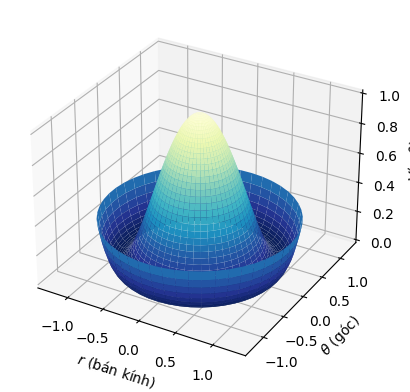

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo figure và axes 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Tạo mesh trong tọa độ trụ và tính toán giá trị Z tương ứng
r = np.linspace(0, 1.25, 50)
theta = np.linspace(0, 2 * np.pi, 50)
R, Theta = np.meshgrid(r, theta)
Z = ((R**2 - 1)**2)

# Chuyển đổi sang tọa độ Đề-các để vẽ
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Vẽ bề mặt
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Đặt giới hạn và nhãn
ax.set_zlim(0, 1)
ax.set_xlabel(r'$r$ (bán kính)')
ax.set_ylabel(r'$\theta$ (góc)')
ax.set_zlabel(r'$V(r, \theta)$')

plt.show()


#Train Model CNN + LSTM

In [ ]:
import numpy as np
# Khai báo hàm Windowing (dùng để tạo các cặp X, y cho time series data)
def slicing_window(df, df_start_idx, df_end_idx, input_size, label_size, offset, label_name,label_feature):
    features = [] # Khai báo list dùng để lưu trữ các X
    labels = [] # Khai báo list dùng để lưu trữ các y

    # Nếu df_end_idx = chỉ mục cuối cùng bảng dữ liệu, cần phải dời xuống 1 khoảng = window size
    if df_end_idx == None:
        df_end_idx = len(df) - label_size - offset

    df_start_idx = df_start_idx + input_size + offset

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(df_start_idx, df_end_idx):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[label_feature][feature_start_idx:feature_end_idx] # Lấy X
        label = df[label_name][label_start_idx:label_end_idx] # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarrray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

#MÔ Hình CNN+LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense

def build_model(input_shape, output_size):
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.Input(shape=input_shape, name='input_layer'),

        # Normalization Layer (Giả định normalize_layer đã được định nghĩa trước đó)
        normalize_layer,

        # Convolutional Layer 1
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv1d_layer_1'),

        # MaxPooling Layer 1
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_1'),


        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv1d_layer_2'),


        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_2'),

        # LSTM Layer 1
        LSTM(64, return_sequences=True, name='lstm_layer_1'),
        Dropout(0.2, name='dropout_layer_1'),  # Dropout layer after the first LSTM layer

        # LSTM Layer 2
        LSTM(64, return_sequences=False, name='lstm_layer_2'),
        Dropout(0.2, name='dropout_layer_2'),  # Dropout layer after the second LSTM layer

        # Fully Connected Layer
        Dense(64, activation='relu', name='fc_layer_1'),

        # Dropout Layer
        Dropout(0.1, name='dropout_layer_3'),

        # Output Layer
        Dense(output_size, name='output_layer')
    ], name='lstm_model')

    return model




#Model LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout

def build_modelLSTM(input_shape, output_size):
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.Input(shape=input_shape, name='input_layer'),

        normalize_layer,

        tf.keras.layers.LSTM(132,
                             return_sequences=True,
                             name='lstm_layer_1'),
        Dropout(0.2),  # Dropout layer after the first LSTM layer

        # LSTM Layer 2
        tf.keras.layers.LSTM(64,
                             return_sequences=False,
                             name='lstm_layer_2'),


        Dropout(0.2),  # Dropout layer after the second LSTM layer

        tf.keras.layers.Dense(150,
                              activation='relu',
                              name='fc_layer_1'
                              ),

        # Output Layer

         Dropout(0.3),
        tf.keras.layers.Dense(output_size, name='output_layer')
    ],
    name='lstm_model')

    return model


#BayesianLSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense
import tensorflow_probability as tfp

tfd = tfp.distributions

# Định nghĩa một lớp LSTM Bayesian
class BayesianLSTMCell(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(BayesianLSTMCell, self).__init__(**kwargs)
        self.units = units
        self.prior = tfd.MultivariateNormalDiag(loc=tf.zeros([units]), scale_diag=tf.ones([units]))
        self.posterior = tfp.layers.default_mean_field_normal_fn(is_singular=False)
        self.state_size = [units, units]  # cell state size and hidden state size
        self.output_size = units

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel_posterior = self.add_weight(
            shape=(input_dim, self.units),
            initializer='random_normal',
            trainable=True,
            name='kernel_posterior'
        )
        self.recurrent_kernel_posterior = self.add_weight(
            shape=(self.units, self.units),
            initializer='random_normal',
            trainable=True,
            name='recurrent_kernel_posterior'
        )
        self.bias_posterior = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True,
            name='bias_posterior'
        )

    def call(self, inputs, states, training=None):
        prev_output = states[1]
        kernel_posterior_sample = self.kernel_posterior
        recurrent_kernel_posterior_sample = self.recurrent_kernel_posterior
        bias_posterior_sample = self.bias_posterior

        z = tf.matmul(inputs, kernel_posterior_sample) + tf.matmul(prev_output, recurrent_kernel_posterior_sample) + bias_posterior_sample
        output = tf.nn.relu(z)
        new_state = [states[0], output]
        return output, new_state

def build_bayesian_lstm_model0(input_shape, output_size):
    model = tf.keras.Sequential([
        # Lớp đầu vào
        tf.keras.Input(shape=input_shape, name='input_layer'),

        # Lớp Chuẩn hóa (Giả định normalize_layer đã được định nghĩa trước đó)
        tf.keras.layers.BatchNormalization(name='normalize_layer'),

        # Lớp Convolutional 1
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv1d_layer_1'),

        # Lớp MaxPooling 1
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_1'),

        # LSTM Bayesian Layer 1
        tf.keras.layers.RNN(BayesianLSTMCell(64), return_sequences=True, name='bayesian_lstm_layer_1'),
        Dropout(0.2, name='dropout_layer_1'),  # Lớp Dropout sau lớp LSTM đầu tiên

        # LSTM Bayesian Layer 2
        tf.keras.layers.RNN(BayesianLSTMCell(64), name='bayesian_lstm_layer_2'),
        Dropout(0.2, name='dropout_layer_2'),  # Lớp Dropout sau lớp LSTM thứ hai

        # Lớp Fully Connected Bayesian
        tfp.layers.DenseFlipout(64, activation='relu', name='bayesian_fc_layer_1'),

        # Lớp Dropout
        Dropout(0.1, name='dropout_layer_3'),

        # Lớp đầu ra
        tfp.layers.DenseFlipout(output_size, name='output_layer')
    ], name='bayesian_lstm_model')

    return model




In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense
import tensorflow_probability as tfp

tfd = tfp.distributions

# Định nghĩa một lớp LSTM Bayesian
class BayesianLSTMCell(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(BayesianLSTMCell, self).__init__(**kwargs)
        self.units = units
        self.state_size = [units, units]  # cell state size and hidden state size
        self.output_size = units

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel_posterior = self.add_weight(
            shape=(input_dim, self.units),
            initializer='random_normal',
            trainable=True,
            name='kernel_posterior'
        )
        self.recurrent_kernel_posterior = self.add_weight(
            shape=(self.units, self.units),
            initializer='random_normal',
            trainable=True,
            name='recurrent_kernel_posterior'
        )
        self.bias_posterior = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True,
            name='bias_posterior'
        )

    def call(self, inputs, states, training=None):
        prev_output = states[1]
        kernel_posterior_sample = self.kernel_posterior
        recurrent_kernel_posterior_sample = self.recurrent_kernel_posterior
        bias_posterior_sample = self.bias_posterior

        z = tf.matmul(inputs, kernel_posterior_sample) + tf.matmul(prev_output, recurrent_kernel_posterior_sample) + bias_posterior_sample
        output = tf.nn.relu(z)
        new_state = [states[0], output]
        return output, new_state

def build_bayesian_lstm_model1(input_shape, output_size):
    model = tf.keras.Sequential([
        # Lớp đầu vào
        tf.keras.Input(shape=input_shape, name='input_layer'),

        # Lớp Chuẩn hóa (Giả định normalize_layer đã được định nghĩa trước đó)
        tf.keras.layers.BatchNormalization(name='normalize_layer'),

        # Lớp Convolutional 1
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv1d_layer_1'),

        # Lớp MaxPooling 1
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_1'),

        # LSTM Bayesian Layer 1
        tf.keras.layers.RNN(BayesianLSTMCell(64), return_sequences=True, name='bayesian_lstm_layer_1'),
        Dropout(0.2, name='dropout_layer_1'),  # Lớp Dropout sau lớp LSTM đầu tiên

        # LSTM Bayesian Layer 2
        tf.keras.layers.RNN(BayesianLSTMCell(64), name='bayesian_lstm_layer_2'),
        Dropout(0.2, name='dropout_layer_2'),  # Lớp Dropout sau lớp LSTM thứ hai

        # Lớp Fully Connected
        Dense(64, activation='relu', name='fc_layer_1'),

        # Lớp Dropout
        Dropout(0.1, name='dropout_layer_3'),

        # Lớp đầu ra
        Dense(output_size, name='output_layer')
    ], name='bayesian_lstm_model')

    return model



#Train model

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


# Đường dẫn đến thư mục chứa các file CSV
input_dir = "/content/drive/MyDrive/transformed_data"
previous_model_weights = "/content/drive/MyDrive/model/model2/model_transformed_a93337_2016-12-02.csv.h5"

# Lặp qua tất cả các file CSV trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Đường dẫn đầy đủ đến file CSV
        file_path = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Khởi tạo dữ liệu cho tập train, val
        INPUT_SIZE = 6
        LABEL_SIZE = 1
        OFFSET = 1
        BATCH_SIZE = 64
        feature = ["R", "theta", "h", "heading", "velocity"]
        TARGET_NAME = ["R", "theta", "h"]

        dataset_length = len(data)
        TRAIN_SIZE = 1
        #VAL_SIZE = 0.2

        # Đổi tỷ lệ thành chỉ mục
        TRAIN_END_IDX = int(TRAIN_SIZE * dataset_length)
       # VAL_END_IDX = int(VAL_SIZE * dataset_length) + TRAIN_END_IDX

        # Khởi tạo X, y cho tập train
        X_train, y_train = slicing_window(data, 0, TRAIN_END_IDX, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)

        # Khởi tạo X, y cho tập val
        #X_val, y_val = slicing_window(data, TRAIN_END_IDX, VAL_END_IDX, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)

        # In hình dạng để gỡ lỗi
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
       # print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

        # Đảm bảo các hình dạng dữ liệu tương thích
        if X_train.shape[-1] != len(feature) or y_train.shape[-1] != len(TARGET_NAME):
            raise ValueError("Feature hoặc target shape không khớp!")

        # Khởi tạo tf.data.Dataset
        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
        #val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

        # Cấu hình các tham số tối ưu cho việc đọc dữ liệu
        AUTOTUNE = tf.data.AUTOTUNE
        train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
        #val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

        # Khai báo normalization layer và adapt nó
        normalize_layer = tf.keras.layers.Normalization()
        normalize_layer.adapt(np.vstack((X_train)))

        input_size = X_train.shape[1:]  # Đặt kích thước input chính xác

        model = build_model(input_size, 3)
        model.summary()

        if previous_model_weights:
            try:
                model.load_weights(previous_model_weights)
                print(f"Successfully loaded weights from {previous_model_weights}")
            except Exception as e:
                print(f"Failed to load weights from {previous_model_weights}: {e}")

        # Khai báo một số giá trị siêu tham số
        EPOCHS = 200
        LR = 1e-3

        # Cấu hình thông tin cho mô hình
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
            loss=tf.keras.losses.MeanAbsoluteError(),
        )

        # Train mô hình
        history = model.fit(train_ds, epochs=EPOCHS)


        # Lưu mô hình
        output = os.path.join("/content/drive/MyDrive/model/model2", f"model_{filename}.h5")
        model.save(output)

        previous_model_weights = output
        os.remove(file_path)



X_train shape: (357, 6, 5), y_train shape: (357, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6, 5)              11        
 on)                                                             
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (353, 6, 5), y_train shape: (353, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (340, 6, 5), y_train shape: (340, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (303, 6, 5), y_train shape: (303, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (701, 6, 5), y_train shape: (701, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (308, 6, 5), y_train shape: (308, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (326, 6, 5), y_train shape: (326, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (363, 6, 5), y_train shape: (363, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (401, 6, 5), y_train shape: (401, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (362, 6, 5), y_train shape: (362, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 6, 5)              11        
 tion)                                                           
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (104, 6, 5), y_train shape: (104, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (331, 6, 5), y_train shape: (331, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (387, 6, 5), y_train shape: (387, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (103, 6, 5), y_train shape: (103, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (379, 6, 5), y_train shape: (379, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_14 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (355, 6, 5), y_train shape: (355, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (346, 6, 5), y_train shape: (346, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (324, 6, 5), y_train shape: (324, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_17 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (344, 6, 5), y_train shape: (344, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (101, 6, 5), y_train shape: (101, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_19 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (294, 6, 5), y_train shape: (294, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (312, 6, 5), y_train shape: (312, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_21 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (285, 6, 5), y_train shape: (285, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_22 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (355, 6, 5), y_train shape: (355, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_23 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (374, 6, 5), y_train shape: (374, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_24 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (358, 6, 5), y_train shape: (358, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_25 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (331, 6, 5), y_train shape: (331, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_26 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (122, 6, 5), y_train shape: (122, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_27 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (316, 6, 5), y_train shape: (316, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_28 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (380, 6, 5), y_train shape: (380, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_29 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (344, 6, 5), y_train shape: (344, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_30 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (300, 6, 5), y_train shape: (300, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_31 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (331, 6, 5), y_train shape: (331, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_32 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (353, 6, 5), y_train shape: (353, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_33 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (304, 6, 5), y_train shape: (304, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_34 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (342, 6, 5), y_train shape: (342, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (323, 6, 5), y_train shape: (323, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_36 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (191, 6, 5), y_train shape: (191, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_37 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (125, 6, 5), y_train shape: (125, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_38 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (380, 6, 5), y_train shape: (380, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_39 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (120, 6, 5), y_train shape: (120, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_40 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (386, 6, 5), y_train shape: (386, 1, 3)
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_41 (Normaliz  (None, 6, 5)              11        
 ation)                                                          
                                                                 
 conv1d_layer_1 (Conv1D)     (None, 6, 64)             1024      
                                                                 
 maxpooling1d_layer_1 (MaxP  (None, 3, 64)             0         
 ooling1D)                                                       
                                                                 
 conv1d_layer_2 (Conv1D)     (None, 3, 64)             12352     
                                                                 
 maxpooling1d_layer_2 (MaxP  (None, 1, 64)             0         
 ooling1D)                                                       
 

KeyboardInterrupt: 

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


#Bayesian optimization

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import pickle

# Define the model building function
def build_model(input_shape, output_size, filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense):
    normalize_layer = tf.keras.layers.Normalization()
    model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape, name='input_layer'),
        normalize_layer,
        Conv1D(filters=filters, kernel_size=(kernel_size,), activation='relu', padding='same', name='conv1d_layer_1'),
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_1'),
        Conv1D(filters=filters, kernel_size=(kernel_size,), activation='relu', padding='same', name='conv1d_layer_2'),
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_2'),
        LSTM(units_LSTM1, return_sequences=True, name='lstm_layer_1'),
        Dropout(dropout1, name='dropout_layer_1'),
        LSTM(units_LSTM2, return_sequences=False, name='lstm_layer_2'),
        Dropout(dropout2, name='dropout_layer_2'),
        Dense(units_dense, activation='relu', name='fc_layer_1'),
        Dense(output_size, name='output_layer')
    ], name='lstm_model')
    return model

# Define the objective function
@use_named_args(dimensions=[
    Real(1e-4, 1e-2, "log-uniform", name='learning_rate'),
    Integer(32, 128, name='filters'),
    Integer(2, 5, name='kernel_size'),
    Integer(32, 128, name='units_LSTM1'),
    Integer(32, 128, name='units_LSTM2'),
    Real(0.1, 0.5, name='dropout1'),
    Real(0.1, 0.5, name='dropout2'),
    Integer(32, 128, name='units_dense'),
    Integer(50, 200, name='epochs'),
    Integer(32, 256, name='batch_size')
])
def objective(learning_rate, filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense, epochs, batch_size):
    global input_size, train_ds, AUTOTUNE, data, TRAIN_END_IDX, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature

    # Recalculate X_train and y_train with the new time_step
    X_train, y_train = slicing_window(data, 0, TRAIN_END_IDX, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)

    input_size = X_train.shape[1:]

    # Define model
    model = build_model(input_size, len(TARGET_NAME), filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.MeanAbsoluteError(),
    )

    # Create tf.data.Dataset with batch size
    train_ds_batched = train_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

    # Train the model
    history = model.fit(train_ds_batched, epochs=epochs, verbose=0)
    train_loss = min(history.history['loss'])
    return train_loss

# Define the search space
space = [
    Real(1e-4, 1e-2, "log-uniform", name='learning_rate'),
    Integer(32, 128, name='filters'),
    Integer(2, 5, name='kernel_size'),
    Integer(32, 128, name='units_LSTM1'),
    Integer(32, 128, name='units_LSTM2'),
    Real(0.1, 0.5, name='dropout1'),
    Real(0.1, 0.5, name='dropout2'),
    Integer(32, 128, name='units_dense'),
    Integer(50, 200, name='epochs'),
    Integer(32, 256, name='batch_size')
]

# Directory path for CSV files
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"
hyperparameters_file = "/content/drive/MyDrive/model/model1/best_hyperparameters.pkl"
previous_model_weights = None
previous_best_params = None

# Function to slice data into windows and labels
def slicing_window(data, start_idx, end_idx, input_size, label_size, offset, target_name, feature):
    X = []
    y = []
    for i in range(start_idx, end_idx - input_size - label_size + 1, offset):
        X.append(data[feature].values[i:i + input_size])
        y.append(data[target_name].values[i + input_size:i + input_size + label_size])
    return np.array(X), np.array(y)

# Loop through all CSV files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_dir, filename)
        data = pd.read_csv(file_path)

        INPUT_SIZE = 6
        LABEL_SIZE = 1
        OFFSET = 1
        BATCH_SIZE = 64  # Initial batch size
        feature = ["lat", "lon", "geoaltitude", "heading", "velocity"]
        TARGET_NAME = ["lat", "lon", "geoaltitude"]

        dataset_length = len(data)
        TRAIN_SIZE = 1

        TRAIN_END_IDX = int(TRAIN_SIZE * dataset_length)

        # Initial slicing window
        X_train, y_train = slicing_window(data, 0, TRAIN_END_IDX, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)

        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

        if X_train.shape[-1] != len(feature) or y_train.shape[-1] != len(TARGET_NAME):
            raise ValueError("Feature or target size mismatch!")

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        AUTOTUNE = tf.data.AUTOTUNE

        input_size = X_train.shape[1:]
        print(f"Input size: {input_size}")

        if previous_best_params is None:
            res = gp_minimize(objective, space, n_calls=20, random_state=0)
            best_params = res.x
        else:
            best_params = previous_best_params

        print(f"Best parameters found: {best_params}")

        # Train the model with the best hyperparameters
        learning_rate, filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense, best_epochs, best_batch_size = best_params

        model = build_model(input_size, len(TARGET_NAME), filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss=tf.keras.losses.MeanAbsoluteError(),
        )

        # Load previous model weights if any
        if previous_model_weights:
            model.load_weights(previous_model_weights)

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds_batched = train_ds.batch(best_batch_size).cache().prefetch(buffer_size=AUTOTUNE)
        history = model.fit(train_ds_batched, epochs=best_epochs)

        output = os.path.join("/content/drive/MyDrive/model/model3", f"model_{filename}.h5")
        model.save(output)
        print(f"Saved model weights to {output}")

        # Save the best hyperparameters for future use
        with open(hyperparameters_file, "wb") as f:
            pickle.dump(best_params, f)

        previous_model_weights = output
        previous_best_params = best_params  # Update previous_best_params for the next iteration

        # Remove the processed CSV file
        # os.remove(file_path)

        print(f"Processed file: {filename}")

print("Training completed.")


X_train shape: (70, 6, 5), y_train shape: (70, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 252.2571
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 251.9877
Epoch 3/50
1/1 [==============================] - 0s 17ms/step - loss: 251.0647
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 249.1105
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 246.0950
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 241.2436
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 234.7530
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 226.7416
Epoch 9/50
1/1 [==============================] - 0s 18ms/step - loss: 217.8671
Epoch 10/50
1/1 [==============================] - 0s 17ms/step - loss: 213.2350
Epoch 11/50
1/1 [==============================] - 0s 19m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model weights to /content/drive/MyDrive/model/model3/model_a004b4_2016-12-02_1000_2000.csv.h5
Processed file: a004b4_2016-12-02_1000_2000.csv
X_train shape: (121, 6, 5), y_train shape: (121, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 38.2475
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 46.3038
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 43.0274
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 40.9287
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 38.5960
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 39.8827
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 38.9339
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 37.9424
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 38.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (110, 6, 5), y_train shape: (110, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 45.9172
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 53.9785
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 49.1512
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 47.8931
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 49.9458
Epoch 6/50
1/1 [==============================] - 0s 47ms/step - loss: 48.9169
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 49.1033
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 47.5461
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 48.4046
Epoch 10/50
1/1 [==============================] - 0s 40ms/step - loss: 48.6431
Epoch 11/50
1/1 [==============================] - 0s 37ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (66, 6, 5), y_train shape: (66, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 40.3246
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 46.0809
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 43.8567
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 40.5286
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 40.5754
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 41.4294
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 41.6323
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 40.6473
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 39.1916
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 40.2115
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (112, 6, 5), y_train shape: (112, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 40.4722
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 47.5945
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 42.8732
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 42.3258
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 45.4193
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 45.1642
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 43.1161
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 42.4275
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 40.1406
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 40.6966
Epoch 11/50
1/1 [==============================] - 0s 24ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 57.1207
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 50.6955
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 31.0825
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 29.0145
Epoch 5/50
1/1 [==============================] - 0s 15ms/step - loss: 24.9781
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 26.1304
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 29.7520
Epoch 8/50
1/1 [==============================] - 0s 17ms/step - loss: 30.5591
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 30.8031
Epoch 10/50
1/1 [==============================] - 0s 17ms/step - loss: 31.1374
Epoch 11/50
1/1 [==============================] - 0s 22ms/step - loss: 29.2393
Epoch 12/50
1/1 [==============================] - 0s 21ms/step - loss: 27.8543
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (63, 6, 5), y_train shape: (63, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 113.8378
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 102.3682
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 83.5231
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 71.5423
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 59.1906
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 46.0991
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 34.6257
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 26.6658
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 23.8633
Epoch 10/50
1/1 [==============================] - 0s 22ms/step - loss: 25.0260
Epoch 11/50
1/1 [==============================] - 0s 20ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (87, 6, 5), y_train shape: (87, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 47.0395
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 45.9922
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 37.7405
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 31.7441
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 27.0858
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 28.7995
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 30.8097
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 32.1589
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 32.3824
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 31.7559
Epoch 11/50
1/1 [==============================] - 0s 25ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (71, 6, 5), y_train shape: (71, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 25.3672
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 33.9866
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 28.5933
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 27.8265
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 30.6882
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 30.6769
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 31.0473
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 30.2218
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 27.0286
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 26.9405
Epoch 11/50
1/1 [==============================] - 0s 19ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model weights to /content/drive/MyDrive/model/model3/model_a008ef_2016-12-01_1000_2000.csv.h5
Processed file: a008ef_2016-12-01_1000_2000.csv
X_train shape: (73, 6, 5), y_train shape: (73, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 36.3551
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 42.7166
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 37.0836
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 39.1630
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 41.9160
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 40.2122
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 37.0905
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 35.7764
Epoch 9/50
1/1 [==============================] - 0s 24ms/step - loss: 37.8922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (117, 6, 5), y_train shape: (117, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 39.2537
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 33.9802
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 27.7444
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 30.8492
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 31.1035
Epoch 6/50
1/1 [==============================] - 0s 58ms/step - loss: 30.4681
Epoch 7/50
1/1 [==============================] - 0s 54ms/step - loss: 30.2850
Epoch 8/50
1/1 [==============================] - 0s 35ms/step - loss: 31.1932
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 30.4601
Epoch 10/50
1/1 [==============================] - 0s 58ms/step - loss: 28.5583
Epoch 11/50
1/1 [==============================] - 0s 47ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model weights to /content/drive/MyDrive/model/model3/model_a22f16_2017-01-24_1000_2000.csv.h5
Processed file: a22f16_2017-01-24_1000_2000.csv
X_train shape: (80, 6, 5), y_train shape: (80, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 41.9881
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 49.7436
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 44.2975
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 44.8099
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 47.0605
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 46.0186
Epoch 7/50
1/1 [==============================] - 0s 48ms/step - loss: 43.2318
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 42.0802
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 44.29

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model weights to /content/drive/MyDrive/model/model3/model_a96f91_2017-02-27_1000_2000.csv.h5
Processed file: a96f91_2017-02-27_1000_2000.csv
X_train shape: (83, 6, 5), y_train shape: (83, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 52.9969
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 60.2702
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 56.8461
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 53.2881
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 56.8157
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 56.5195
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 55.7680
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 55.0825
Epoch 9/50
1/1 [==============================] - 0s 20ms/step - loss: 53.2686

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 27.5249
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 25.0579
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 24.1675
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 27.0338
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 25.1725
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 23.4275
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 23.7182
Epoch 8/50
1/1 [==============================] - 0s 17ms/step - loss: 24.3525
Epoch 9/50
1/1 [==============================] - 0s 18ms/step - loss: 23.0861
Epoch 10/50
1/1 [==============================] - 0s 18ms/step - loss: 21.3852
Epoch 11/50
1/1 [==============================] - 0s 20ms/step - loss: 22.4547
Epoch 12/50
1/1 [==============================] - 0s 18ms/step - loss: 23.5860
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 96.2336
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 90.1598
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 71.8074
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 56.2369
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 40.5102
Epoch 6/50
1/1 [==============================] - 0s 16ms/step - loss: 22.5277
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 16.0983
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 17.0527
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 23.2604
Epoch 10/50
1/1 [==============================] - 0s 15ms/step - loss: 33.8105
Epoch 11/50
1/1 [==============================] - 0s 17ms/step - loss: 36.6691
Epoch 12/50
1/1 [==============================] - 0s 18ms/step - loss: 31.7511
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (93, 6, 5), y_train shape: (93, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 122.4336
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 110.6392
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 94.4579
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 78.5954
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 63.0604
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 48.6267
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 39.6654
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 32.5886
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 29.1652
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 29.0221
Epoch 11/50
1/1 [==============================] - 0s 27ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (140, 6, 5), y_train shape: (140, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 42.6865
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 40.4741
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 38.4627
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 39.1290
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 36.9670
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 37.8015
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 38.5696
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 38.6503
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 37.9642
Epoch 10/50
1/1 [==============================] - 0s 27ms/step - loss: 37.1370
Epoch 11/50
1/1 [==============================] - 0s 37ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (80, 6, 5), y_train shape: (80, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 27.2504
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 33.7924
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 29.7603
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 28.9294
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 29.2950
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 29.0372
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 27.9990
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 28.1603
Epoch 9/50
1/1 [==============================] - 0s 20ms/step - loss: 28.8365
Epoch 10/50
1/1 [==============================] - 0s 21ms/step - loss: 28.8810
Epoch 11/50
1/1 [==============================] - 0s 19ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (117, 6, 5), y_train shape: (117, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 43.8312
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 49.1166
Epoch 3/50
1/1 [==============================] - 0s 50ms/step - loss: 45.6713
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 45.4275
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 46.1809
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 45.2733
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 45.1831
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 45.0168
Epoch 9/50
1/1 [==============================] - 0s 40ms/step - loss: 44.7401
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 43.9544
Epoch 11/50
1/1 [==============================] - 0s 35ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (121, 6, 5), y_train shape: (121, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 37.1685
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 44.4432
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 39.1391
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 39.6947
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 41.2623
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 39.8765
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 37.2651
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 39.1639
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 40.0666
Epoch 10/50
1/1 [==============================] - 0s 23ms/step - loss: 39.8963
Epoch 11/50
1/1 [==============================] - 0s 23ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (54, 6, 5), y_train shape: (54, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 92.3944
Epoch 2/50
1/1 [==============================] - 0s 52ms/step - loss: 83.8671
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 68.8975
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 55.6137
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 38.6825
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 25.2714
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 13.4977
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 17.4738
Epoch 9/50
1/1 [==============================] - 0s 30ms/step - loss: 22.6111
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 28.5805
Epoch 11/50
1/1 [==============================] - 0s 33ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (93, 6, 5), y_train shape: (93, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 96.1874
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 86.8980
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 71.7150
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 58.5213
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 48.8904
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 41.8807
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 36.5127
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 34.3101
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 34.7822
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 35.7132
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (112, 6, 5), y_train shape: (112, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 37.2429
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 36.8067
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 36.9780
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 34.4173
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 35.8906
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 36.7687
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 35.9266
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 35.2832
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 34.5509
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 34.4227
Epoch 11/50
1/1 [==============================] - 0s 24ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (109, 6, 5), y_train shape: (109, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 48.9242
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 49.7159
Epoch 3/50
1/1 [==============================] - 0s 40ms/step - loss: 48.9724
Epoch 4/50
1/1 [==============================] - 0s 43ms/step - loss: 50.3758
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 49.7365
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 49.3916
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 48.4737
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 48.1833
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 48.2736
Epoch 10/50
1/1 [==============================] - 0s 40ms/step - loss: 48.3550
Epoch 11/50
1/1 [==============================] - 0s 38ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (90, 6, 5), y_train shape: (90, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 35.1100
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 35.4424
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 32.0531
Epoch 4/50
1/1 [==============================] - 0s 48ms/step - loss: 31.9749
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 31.6401
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 31.9325
Epoch 7/50
1/1 [==============================] - 0s 46ms/step - loss: 32.5595
Epoch 8/50
1/1 [==============================] - 0s 45ms/step - loss: 32.7131
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 31.5581
Epoch 10/50
1/1 [==============================] - 0s 52ms/step - loss: 30.0482
Epoch 11/50
1/1 [==============================] - 0s 44ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 68.6853
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 58.3133
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 45.2796
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 39.3603
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 34.6182
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 30.4250
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 28.5770
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 30.6710
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 34.0625
Epoch 10/50
1/1 [==============================] - 0s 23ms/step - loss: 35.8395
Epoch 11/50
1/1 [==============================] - 0s 20ms/step - loss: 36.0048
Epoch 12/50
1/1 [==============================] - 0s 22ms

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (105, 6, 5), y_train shape: (105, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 67.5741
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 64.0218
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 56.4571
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 49.0294
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 44.5368
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 42.6192
Epoch 7/50
1/1 [==============================] - 0s 27ms/step - loss: 41.9820
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 41.7830
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 42.9323
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 43.9572
Epoch 11/50
1/1 [==============================] - 0s 40ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (82, 6, 5), y_train shape: (82, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 35.2457
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 42.1504
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 38.0585
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 35.9846
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 37.8556
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 37.6055
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 35.4975
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 35.9516
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 36.7669
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 36.2658
Epoch 11/50
1/1 [==============================] - 0s 24ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (101, 6, 5), y_train shape: (101, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 43.3632
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 45.0472
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 40.4502
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 36.0625
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 34.9663
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 35.6278
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 36.6831
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 37.7943
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 35.7882
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 35.6193
Epoch 11/50
1/1 [==============================] - 0s 25ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 29.3413
Epoch 2/50
1/1 [==============================] - 0s 30ms/step - loss: 32.0313
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 30.0998
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 27.8407
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 27.3529
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 28.8847
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 28.9061
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 27.6981
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 27.4682
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 27.6362
Epoch 11/50
1/1 [==============================] - 0s 36ms/step - loss: 27.5856
Epoch 12/50
1/1 [==============================] - 0s 37ms/step - loss: 26.9376
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (58, 6, 5), y_train shape: (58, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 25.9660
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 31.0477
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 27.7860
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 25.6821
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 27.3555
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 26.2324
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 24.7586
Epoch 8/50
1/1 [==============================] - 0s 20ms/step - loss: 25.6503
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 26.3817
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 25.0004
Epoch 11/50
1/1 [==============================] - 0s 22ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model weights to /content/drive/MyDrive/model/model3/model_a48e1b_2016-12-07_1000_2000.csv.h5
Processed file: a48e1b_2016-12-07_1000_2000.csv
X_train shape: (81, 6, 5), y_train shape: (81, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 31.1345
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 32.4748
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 32.3888
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 32.1767
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 31.8823
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 31.8564
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 31.5847
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 30.7355
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 31.0465

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 107.2848
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 99.3370
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 85.8909
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 71.7651
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 58.8613
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 44.6386
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 33.7493
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 18.5051
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 9.1782
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 15.8428
Epoch 11/50
1/1 [==============================] - 0s 19ms/step - loss: 22.0838
Epoch 12/50
1/1 [==============================] - 0s 39ms/step - loss: 24.5815
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 11.8549
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 21.7416
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 16.0975
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 13.0114
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 18.8373
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 18.2802
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 14.3251
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 11.1474
Epoch 9/50
1/1 [==============================] - 0s 21ms/step - loss: 12.9342
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 14.3352
Epoch 11/50
1/1 [==============================] - 0s 18ms/step - loss: 15.9371
Epoch 12/50
1/1 [==============================] - 0s 18ms/step - loss: 13.3363
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (116, 6, 5), y_train shape: (116, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 106.6558
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 96.8076
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 83.1925
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 69.1927
Epoch 5/50
1/1 [==============================] - 0s 45ms/step - loss: 59.5507
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 50.7827
Epoch 7/50
1/1 [==============================] - 0s 46ms/step - loss: 43.8639
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 39.3950
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 36.8804
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 36.6049
Epoch 11/50
1/1 [==============================] - 0s 30ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (136, 6, 5), y_train shape: (136, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 33.0414
Epoch 2/50
1/1 [==============================] - 0s 30ms/step - loss: 36.8407
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 34.1458
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 35.2697
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 34.3105
Epoch 6/50
1/1 [==============================] - 0s 31ms/step - loss: 34.1259
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 34.4405
Epoch 8/50
1/1 [==============================] - 0s 42ms/step - loss: 34.3680
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 33.5885
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 33.9263
Epoch 11/50
1/1 [==============================] - 0s 32ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (100, 6, 5), y_train shape: (100, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 41.0951
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 41.2739
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 38.7893
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 36.3073
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 37.4718
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 38.6548
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 37.9374
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 36.7496
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 36.5153
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 36.5132
Epoch 11/50
1/1 [==============================] - 0s 25ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (86, 6, 5), y_train shape: (86, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 45.8215
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 42.0408
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 36.7066
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 35.7244
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 34.5039
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 33.4836
Epoch 7/50
1/1 [==============================] - 0s 44ms/step - loss: 34.1855
Epoch 8/50
1/1 [==============================] - 0s 42ms/step - loss: 34.8890
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 35.2967
Epoch 10/50
1/1 [==============================] - 0s 38ms/step - loss: 35.7197
Epoch 11/50
1/1 [==============================] - 0s 49ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (103, 6, 5), y_train shape: (103, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 35.6579
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 38.8778
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 36.2261
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 35.4371
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 36.8401
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 36.7299
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 36.7082
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 35.3007
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 35.2691
Epoch 10/50
1/1 [==============================] - 0s 27ms/step - loss: 35.8746
Epoch 11/50
1/1 [==============================] - 0s 25ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (127, 6, 5), y_train shape: (127, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 34.7705
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 38.6416
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 36.9703
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 33.5666
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 36.0895
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 36.9026
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 36.3439
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 34.6792
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 34.0552
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 35.0109
Epoch 11/50
1/1 [==============================] - 0s 29ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 44.5421
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 43.8762
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 37.9890
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 32.9707
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 30.3348
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 30.1065
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 30.3537
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 31.3662
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 32.6521
Epoch 10/50
1/1 [==============================] - 0s 22ms/step - loss: 33.3705
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - loss: 32.9570
Epoch 12/50
1/1 [==============================] - 0s 21ms/step - loss: 32.3400
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (107, 6, 5), y_train shape: (107, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 46.3690
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 41.9811
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 38.6073
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 36.5761
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 34.0708
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 33.6306
Epoch 7/50
1/1 [==============================] - 0s 57ms/step - loss: 34.5581
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 35.8606
Epoch 9/50
1/1 [==============================] - 0s 32ms/step - loss: 36.2603
Epoch 10/50
1/1 [==============================] - 0s 27ms/step - loss: 36.0266
Epoch 11/50
1/1 [==============================] - 0s 29ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 88.6531
Epoch 2/50
1/1 [==============================] - 0s 52ms/step - loss: 80.5439
Epoch 3/50
1/1 [==============================] - 0s 40ms/step - loss: 70.1499
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 58.1313
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 42.5863
Epoch 6/50
1/1 [==============================] - 0s 39ms/step - loss: 30.3618
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 21.5092
Epoch 8/50
1/1 [==============================] - 0s 41ms/step - loss: 19.6010
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 20.2579
Epoch 10/50
1/1 [==============================] - 0s 39ms/step - loss: 24.7842
Epoch 11/50
1/1 [==============================] - 0s 37ms/step - loss: 30.2705
Epoch 12/50
1/1 [==============================] - 0s 45ms/step - loss: 30.5869
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Processed file: a38293_2017-02-22_1000_2000.csv
X_train shape: (80, 6, 5), y_train shape: (80, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 100.9270
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 93.0130
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 76.6944
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 66.5743
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 56.7957
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 48.9475
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 42.0305
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 36.8782
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 34.1075
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 33.2570
Epoch 11/50
1/1 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (98, 6, 5), y_train shape: (98, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 31.9505
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 31.2666
Epoch 3/50
1/1 [==============================] - 0s 57ms/step - loss: 30.4921
Epoch 4/50
1/1 [==============================] - 0s 47ms/step - loss: 31.1590
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 29.5255
Epoch 6/50
1/1 [==============================] - 0s 66ms/step - loss: 30.6197
Epoch 7/50
1/1 [==============================] - 0s 59ms/step - loss: 30.9041
Epoch 8/50
1/1 [==============================] - 0s 53ms/step - loss: 30.2052
Epoch 9/50
1/1 [==============================] - 0s 37ms/step - loss: 29.9620
Epoch 10/50
1/1 [==============================] - 0s 50ms/step - loss: 29.4995
Epoch 11/50
1/1 [==============================] - 0s 41ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (98, 6, 5), y_train shape: (98, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 32.5633
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 33.3973
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 33.8367
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 32.6949
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 32.5079
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 32.7844
Epoch 7/50
1/1 [==============================] - 0s 27ms/step - loss: 32.3060
Epoch 8/50
1/1 [==============================] - 0s 30ms/step - loss: 32.0155
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 31.9625
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 32.3672
Epoch 11/50
1/1 [==============================] - 0s 26ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (153, 6, 5), y_train shape: (153, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 57.1605
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 55.7305
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 50.3387
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 45.4218
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 42.5739
Epoch 6/50
1/1 [==============================] - 0s 31ms/step - loss: 41.9076
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 42.6781
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 42.8793
Epoch 9/50
1/1 [==============================] - 0s 30ms/step - loss: 44.0884
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 44.3355
Epoch 11/50
1/1 [==============================] - 0s 30ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (105, 6, 5), y_train shape: (105, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 42.3938
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 42.9355
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 38.2522
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 34.9375
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 34.6379
Epoch 6/50
1/1 [==============================] - 0s 47ms/step - loss: 35.5368
Epoch 7/50
1/1 [==============================] - 0s 46ms/step - loss: 36.1214
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 35.9161
Epoch 9/50
1/1 [==============================] - 0s 44ms/step - loss: 36.9685
Epoch 10/50
1/1 [==============================] - 0s 50ms/step - loss: 36.4841
Epoch 11/50
1/1 [==============================] - 0s 40ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (99, 6, 5), y_train shape: (99, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 36.4664
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 38.4807
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 37.3060
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 37.5321
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 37.1868
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 36.8454
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 37.1797
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 37.3359
Epoch 9/50
1/1 [==============================] - 0s 24ms/step - loss: 37.2355
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 37.0025
Epoch 11/50
1/1 [==============================] - 0s 28ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 27.0577
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 33.5624
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 28.1120
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 28.9730
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 30.7827
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 29.6593
Epoch 7/50
1/1 [==============================] - 0s 27ms/step - loss: 27.2488
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 28.0958
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 29.3946
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 28.6282
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - loss: 27.8237
Epoch 12/50
1/1 [==============================] - 0s 28ms/step - loss: 26.8333
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (96, 6, 5), y_train shape: (96, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 58.4729
Epoch 2/50
1/1 [==============================] - 0s 53ms/step - loss: 60.3262
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 56.7442
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 55.7645
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 54.8647
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 54.9411
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 55.2819
Epoch 8/50
1/1 [==============================] - 0s 35ms/step - loss: 54.7572
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 55.1866
Epoch 10/50
1/1 [==============================] - 0s 41ms/step - loss: 55.0632
Epoch 11/50
1/1 [==============================] - 0s 46ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (85, 6, 5), y_train shape: (85, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 53.0139
Epoch 2/50
1/1 [==============================] - 0s 51ms/step - loss: 54.2713
Epoch 3/50
1/1 [==============================] - 0s 35ms/step - loss: 51.4433
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 48.3771
Epoch 5/50
1/1 [==============================] - 0s 49ms/step - loss: 46.1757
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 47.8206
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 48.8932
Epoch 8/50
1/1 [==============================] - 0s 41ms/step - loss: 48.7493
Epoch 9/50
1/1 [==============================] - 0s 52ms/step - loss: 48.5817
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 48.2602
Epoch 11/50
1/1 [==============================] - 0s 55ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (93, 6, 5), y_train shape: (93, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 35.1374
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 36.2719
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 36.3904
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 33.9286
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 35.7947
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 36.0307
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 35.0582
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 35.1389
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 34.4728
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 34.4517
Epoch 11/50
1/1 [==============================] - 0s 27ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (102, 6, 5), y_train shape: (102, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 59.1110
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 57.5248
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 56.1265
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 54.1482
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 51.8703
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 51.0187
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 49.9934
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 50.1808
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 51.2215
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 51.3988
Epoch 11/50
1/1 [==============================] - 0s 28ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (97, 6, 5), y_train shape: (97, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 48.8444
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 47.0397
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 44.4636
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 44.9636
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 44.3988
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 43.4743
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 43.5577
Epoch 8/50
1/1 [==============================] - 0s 30ms/step - loss: 44.6743
Epoch 9/50
1/1 [==============================] - 0s 35ms/step - loss: 44.6560
Epoch 10/50
1/1 [==============================] - 0s 36ms/step - loss: 44.0306
Epoch 11/50
1/1 [==============================] - 0s 44ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (98, 6, 5), y_train shape: (98, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 34.9888
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 34.6606
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 34.4798
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 33.1061
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 32.9696
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 34.1975
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 34.2688
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 33.2948
Epoch 9/50
1/1 [==============================] - 0s 31ms/step - loss: 32.0981
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 33.1062
Epoch 11/50
1/1 [==============================] - 0s 27ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (77, 6, 5), y_train shape: (77, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 29.6179
Epoch 2/50
1/1 [==============================] - 0s 47ms/step - loss: 31.4460
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 29.7505
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 27.1510
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 27.3701
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 28.3824
Epoch 7/50
1/1 [==============================] - 0s 40ms/step - loss: 28.2159
Epoch 8/50
1/1 [==============================] - 0s 39ms/step - loss: 27.2269
Epoch 9/50
1/1 [==============================] - 0s 31ms/step - loss: 27.5986
Epoch 10/50
1/1 [==============================] - 0s 41ms/step - loss: 27.7096
Epoch 11/50
1/1 [==============================] - 0s 24ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (101, 6, 5), y_train shape: (101, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 34.6301
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 36.9187
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 35.7792
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 34.3342
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 33.9971
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 35.3109
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 35.1654
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 33.8657
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 33.9532
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 34.2270
Epoch 11/50
1/1 [==============================] - 0s 24ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (113, 6, 5), y_train shape: (113, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 44.4956
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 43.1906
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 41.1075
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 40.7455
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 40.1916
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 41.2234
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 41.0909
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 41.1693
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 40.7303
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 40.3100
Epoch 11/50
1/1 [==============================] - 0s 31ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 81.3395
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 71.0258
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 57.1564
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 45.8519
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 32.9737
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 21.7309
Epoch 7/50
1/1 [==============================] - 0s 42ms/step - loss: 16.1597
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 17.6525
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 24.2373
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 23.9659
Epoch 11/50
1/1 [==============================] - 0s 30ms/step - loss: 27.2368
Epoch 12/50
1/1 [==============================] - 0s 35ms/step - loss: 29.3299
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (108, 6, 5), y_train shape: (108, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 104.3549
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 96.2971
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 81.4641
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 66.8111
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 55.2581
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 46.2222
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 39.5510
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 35.3646
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 32.6710
Epoch 10/50
1/1 [==============================] - 0s 27ms/step - loss: 32.7988
Epoch 11/50
1/1 [==============================] - 0s 31ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (97, 6, 5), y_train shape: (97, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 35.1647
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 40.0288
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 36.3722
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 36.6576
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 37.7795
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 36.9290
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 35.2004
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 35.8251
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 36.5743
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 36.7422
Epoch 11/50
1/1 [==============================] - 0s 36ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (154, 6, 5), y_train shape: (154, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 36.3604
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 38.3790
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 38.4868
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 36.1591
Epoch 5/50
1/1 [==============================] - 0s 53ms/step - loss: 37.5946
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 37.3800
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 36.7910
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 36.5976
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 36.5505
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 36.6070
Epoch 11/50
1/1 [==============================] - 0s 32ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (99, 6, 5), y_train shape: (99, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 29.1088
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 32.3764
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 30.9940
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 29.4760
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 30.1428
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 29.9121
Epoch 7/50
1/1 [==============================] - 0s 56ms/step - loss: 29.4111
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 29.7594
Epoch 9/50
1/1 [==============================] - 0s 30ms/step - loss: 29.6651
Epoch 10/50
1/1 [==============================] - 0s 27ms/step - loss: 29.5500
Epoch 11/50
1/1 [==============================] - 0s 31ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (86, 6, 5), y_train shape: (86, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 42.5368
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 46.5376
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 44.6820
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 42.1930
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 44.0464
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 44.4988
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 43.3620
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 42.1578
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 43.1218
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 43.9290
Epoch 11/50
1/1 [==============================] - 0s 34ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 103.9446
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 95.5073
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 82.9801
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 72.3351
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 61.9033
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 45.5774
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 34.6518
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 21.9825
Epoch 9/50
1/1 [==============================] - 0s 23ms/step - loss: 18.0211
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 14.9249
Epoch 11/50
1/1 [==============================] - 0s 21ms/step - loss: 17.5985
Epoch 12/50
1/1 [==============================] - 0s 19ms/step - loss: 27.0257
Epoch 13/50
1/1 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (89, 6, 5), y_train shape: (89, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 115.9996
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 108.4617
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 94.0430
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 79.8407
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 69.5722
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 59.7335
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 52.4716
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 47.1210
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 43.3620
Epoch 10/50
1/1 [==============================] - 0s 38ms/step - loss: 40.9290
Epoch 11/50
1/1 [==============================] - 0s 24ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (88, 6, 5), y_train shape: (88, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 28.6555
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 31.0314
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 30.2867
Epoch 4/50
1/1 [==============================] - 0s 39ms/step - loss: 29.3609
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 29.6530
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 29.4295
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 28.8070
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 29.3216
Epoch 9/50
1/1 [==============================] - 0s 52ms/step - loss: 29.7754
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 29.2304
Epoch 11/50
1/1 [==============================] - 0s 31ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (84, 6, 5), y_train shape: (84, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 32.3866
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 34.4144
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 32.9124
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 33.6699
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 33.0255
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 32.8385
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 33.1205
Epoch 8/50
1/1 [==============================] - 0s 35ms/step - loss: 32.7025
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 32.3867
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 32.7333
Epoch 11/50
1/1 [==============================] - 0s 30ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 49.1072
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 41.8910
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 30.7307
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 23.7883
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 20.6792
Epoch 6/50
1/1 [==============================] - 0s 47ms/step - loss: 19.7422
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 20.3439
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 20.8072
Epoch 9/50
1/1 [==============================] - 0s 61ms/step - loss: 20.3642
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 20.0177
Epoch 11/50
1/1 [==============================] - 0s 26ms/step - loss: 18.7333
Epoch 12/50
1/1 [==============================] - 0s 29ms/step - loss: 19.1930
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (83, 6, 5), y_train shape: (83, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 92.5638
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 84.8845
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 76.3397
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 67.2369
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 59.0288
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 51.7683
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 46.4679
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 41.4211
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 37.6760
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 35.3887
Epoch 11/50
1/1 [==============================] - 0s 26ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (52, 6, 5), y_train shape: (52, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 26.9943
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 24.3332
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 23.6912
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 25.4897
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 24.3899
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 23.8915
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 24.5345
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 24.6894
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 23.9829
Epoch 10/50
1/1 [==============================] - 0s 22ms/step - loss: 23.1471
Epoch 11/50
1/1 [==============================] - 0s 21ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (116, 6, 5), y_train shape: (116, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 31.9921
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 35.9383
Epoch 3/50
1/1 [==============================] - 0s 40ms/step - loss: 32.9649
Epoch 4/50
1/1 [==============================] - 0s 51ms/step - loss: 31.4467
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 32.8591
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 32.6889
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 31.5183
Epoch 8/50
1/1 [==============================] - 0s 63ms/step - loss: 31.7936
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 32.4507
Epoch 10/50
1/1 [==============================] - 0s 62ms/step - loss: 32.0716
Epoch 11/50
1/1 [==============================] - 0s 61ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (127, 6, 5), y_train shape: (127, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 30.9900
Epoch 2/50
1/1 [==============================] - 0s 35ms/step - loss: 33.2774
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 31.7530
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 29.6540
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 29.8122
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 30.3138
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 30.1499
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 30.0055
Epoch 9/50
1/1 [==============================] - 0s 31ms/step - loss: 30.0994
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 29.8180
Epoch 11/50
1/1 [==============================] - 0s 28ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (88, 6, 5), y_train shape: (88, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 28.5055
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 22.8027
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 13.6122
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 10.2496
Epoch 5/50
1/1 [==============================] - 0s 45ms/step - loss: 15.4137
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 16.4536
Epoch 7/50
1/1 [==============================] - 0s 48ms/step - loss: 17.8437
Epoch 8/50
1/1 [==============================] - 0s 30ms/step - loss: 14.1016
Epoch 9/50
1/1 [==============================] - 0s 43ms/step - loss: 11.6611
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 11.0852
Epoch 11/50
1/1 [==============================] - 0s 30ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 38.8833
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 38.0272
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 33.3145
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 34.5182
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 34.1251
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 33.7403
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 33.3710
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 34.5208
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 34.7001
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 33.8694
Epoch 11/50
1/1 [==============================] - 0s 25ms/step - loss: 32.4454
Epoch 12/50
1/1 [==============================] - 0s 24ms/step - loss: 32.3817
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (86, 6, 5), y_train shape: (86, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 53.3945
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 47.7245
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 44.8434
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 44.6811
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 44.4914
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 43.4715
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 42.5822
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 43.1598
Epoch 9/50
1/1 [==============================] - 0s 21ms/step - loss: 44.1729
Epoch 10/50
1/1 [==============================] - 0s 27ms/step - loss: 44.2389
Epoch 11/50
1/1 [==============================] - 0s 28ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (110, 6, 5), y_train shape: (110, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 49.6982
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 48.5520
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 46.0398
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 46.8550
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 47.5324
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 47.0160
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 46.5796
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 47.0701
Epoch 9/50
1/1 [==============================] - 0s 38ms/step - loss: 46.7453
Epoch 10/50
1/1 [==============================] - 0s 37ms/step - loss: 46.1609
Epoch 11/50
1/1 [==============================] - 0s 34ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (59, 6, 5), y_train shape: (59, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 32.0689
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 23.8309
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 19.2260
Epoch 4/50
1/1 [==============================] - 0s 48ms/step - loss: 19.5548
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 20.9494
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 20.7321
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 20.9616
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 20.5545
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 19.3278
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 18.2766
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (82, 6, 5), y_train shape: (82, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 91.7714
Epoch 2/50
1/1 [==============================] - 0s 35ms/step - loss: 84.8240
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 70.8888
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 61.3314
Epoch 5/50
1/1 [==============================] - 0s 56ms/step - loss: 53.2440
Epoch 6/50
1/1 [==============================] - 0s 49ms/step - loss: 46.0635
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 41.0002
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 36.5710
Epoch 9/50
1/1 [==============================] - 0s 43ms/step - loss: 33.9382
Epoch 10/50
1/1 [==============================] - 0s 51ms/step - loss: 33.6600
Epoch 11/50
1/1 [==============================] - 0s 47ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (105, 6, 5), y_train shape: (105, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 30.5950
Epoch 2/50
1/1 [==============================] - 0s 30ms/step - loss: 35.9152
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 32.0547
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 32.0564
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 33.6489
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 32.5207
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 30.9781
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 31.6283
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 32.4494
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 32.1354
Epoch 11/50
1/1 [==============================] - 0s 24ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (105, 6, 5), y_train shape: (105, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 25.1266
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 21.3125
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 16.7737
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 14.5109
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 15.3650
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 15.4875
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 16.3187
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 16.2809
Epoch 9/50
1/1 [==============================] - 0s 37ms/step - loss: 15.4667
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 14.8036
Epoch 11/50
1/1 [==============================] - 0s 31ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (105, 6, 5), y_train shape: (105, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 32.5205
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 35.0118
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 33.1790
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 32.2984
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 33.1266
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 33.4133
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 33.0091
Epoch 8/50
1/1 [==============================] - 0s 36ms/step - loss: 32.0067
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 32.1242
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 32.4177
Epoch 11/50
1/1 [==============================] - 0s 28ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (145, 6, 5), y_train shape: (145, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 13s 13s/step - loss: 32.4120
Epoch 2/50
1/1 [==============================] - 0s 51ms/step - loss: 32.1710
Epoch 3/50
1/1 [==============================] - 0s 78ms/step - loss: 31.7304
Epoch 4/50
1/1 [==============================] - 0s 62ms/step - loss: 32.3108
Epoch 5/50
1/1 [==============================] - 0s 53ms/step - loss: 30.9813
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 30.9946
Epoch 7/50
1/1 [==============================] - 0s 59ms/step - loss: 31.7997
Epoch 8/50
1/1 [==============================] - 0s 57ms/step - loss: 31.4608
Epoch 9/50
1/1 [==============================] - 0s 59ms/step - loss: 31.1574
Epoch 10/50
1/1 [==============================] - 0s 76ms/step - loss: 31.1034
Epoch 11/50
1/1 [==============================] - 0s 80ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (116, 6, 5), y_train shape: (116, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 43.6775
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 45.2471
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 43.5434
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 41.2257
Epoch 5/50
1/1 [==============================] - 0s 35ms/step - loss: 41.3538
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 42.4023
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 42.3612
Epoch 8/50
1/1 [==============================] - 0s 36ms/step - loss: 41.7050
Epoch 9/50
1/1 [==============================] - 0s 43ms/step - loss: 41.3818
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 42.6454
Epoch 11/50
1/1 [==============================] - 0s 33ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 103.9663
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 94.0712
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 83.9787
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 71.8922
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 60.5362
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 47.8768
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 37.9481
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 24.4329
Epoch 9/50
1/1 [==============================] - 0s 23ms/step - loss: 14.4438
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 12.4129
Epoch 11/50
1/1 [==============================] - 0s 24ms/step - loss: 17.0427
Epoch 12/50
1/1 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (104, 6, 5), y_train shape: (104, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 117.7550
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 107.6020
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 93.2852
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 85.0435
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 73.5013
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 63.2489
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 53.2377
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 46.0625
Epoch 9/50
1/1 [==============================] - 0s 34ms/step - loss: 40.9830
Epoch 10/50
1/1 [==============================] - 0s 39ms/step - loss: 37.5572
Epoch 11/50
1/1 [==============================] - 0s 35ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (89, 6, 5), y_train shape: (89, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 34.0767
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 33.6366
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 34.0953
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 32.2198
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 31.9016
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 33.1355
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 33.4970
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 32.5724
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 31.4688
Epoch 10/50
1/1 [==============================] - 0s 41ms/step - loss: 32.0889
Epoch 11/50
1/1 [==============================] - 0s 30ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (109, 6, 5), y_train shape: (109, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 33.4464
Epoch 2/50
1/1 [==============================] - 0s 52ms/step - loss: 33.7840
Epoch 3/50
1/1 [==============================] - 0s 66ms/step - loss: 31.7604
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 31.3868
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 29.6065
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 30.3999
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 31.4503
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 31.3320
Epoch 9/50
1/1 [==============================] - 0s 47ms/step - loss: 30.9455
Epoch 10/50
1/1 [==============================] - 0s 57ms/step - loss: 30.7714
Epoch 11/50
1/1 [==============================] - 0s 38ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (121, 6, 5), y_train shape: (121, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 33.6352
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 36.5171
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 34.2282
Epoch 4/50
1/1 [==============================] - 0s 36ms/step - loss: 33.5826
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 34.4396
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 34.3614
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 33.4785
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 33.3220
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 33.8700
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 33.9356
Epoch 11/50
1/1 [==============================] - 0s 37ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (103, 6, 5), y_train shape: (103, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 50.9444
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 42.1184
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 32.2415
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 27.7132
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 25.1340
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 24.5087
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 25.5525
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 27.7418
Epoch 9/50
1/1 [==============================] - 0s 34ms/step - loss: 28.6622
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 29.7392
Epoch 11/50
1/1 [==============================] - 0s 38ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (107, 6, 5), y_train shape: (107, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 49.8502
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 50.0727
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 48.0668
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 48.8306
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 48.7356
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 48.5481
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 48.0828
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 48.2902
Epoch 9/50
1/1 [==============================] - 0s 32ms/step - loss: 48.3810
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 48.3992
Epoch 11/50
1/1 [==============================] - 0s 30ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (92, 6, 5), y_train shape: (92, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 32.3004
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 33.3402
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 33.5296
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 32.4098
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 32.0567
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 32.1861
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 31.6952
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 31.7964
Epoch 9/50
1/1 [==============================] - 0s 31ms/step - loss: 32.1701
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 32.1289
Epoch 11/50
1/1 [==============================] - 0s 30ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 15.4995
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 13.5118
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 12.6914
Epoch 4/50
1/1 [==============================] - 0s 36ms/step - loss: 9.0270
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 11.2118
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 10.3165
Epoch 7/50
1/1 [==============================] - 0s 48ms/step - loss: 10.5746
Epoch 8/50
1/1 [==============================] - 0s 54ms/step - loss: 11.6603
Epoch 9/50
1/1 [==============================] - 0s 60ms/step - loss: 13.1868
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 10.6365
Epoch 11/50
1/1 [==============================] - 0s 32ms/step - loss: 9.1942
Epoch 12/50
1/1 [==============================] - 0s 40ms/step - loss: 9.5101
Epoch 13/50
1/1 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (121, 6, 5), y_train shape: (121, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 94.4299
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 86.3641
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 75.0748
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 62.2108
Epoch 5/50
1/1 [==============================] - 0s 35ms/step - loss: 52.9097
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 47.0730
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 41.2980
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 37.5305
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 35.0939
Epoch 10/50
1/1 [==============================] - 0s 46ms/step - loss: 34.9559
Epoch 11/50
1/1 [==============================] - 0s 28ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (104, 6, 5), y_train shape: (104, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 37.3479
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 39.6504
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 37.3774
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 38.4675
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 37.8418
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 37.1735
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 37.3838
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 37.6123
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 36.9630
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 37.0965
Epoch 11/50
1/1 [==============================] - 0s 46ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (121, 6, 5), y_train shape: (121, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 34.7432
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 39.6496
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 35.4241
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 36.3498
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 38.1994
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 37.0514
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 35.4898
Epoch 8/50
1/1 [==============================] - 0s 39ms/step - loss: 34.8878
Epoch 9/50
1/1 [==============================] - 0s 32ms/step - loss: 36.4365
Epoch 10/50
1/1 [==============================] - 0s 45ms/step - loss: 36.6423
Epoch 11/50
1/1 [==============================] - 0s 37ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (120, 6, 5), y_train shape: (120, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 40.7745
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 45.3436
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 43.0355
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 40.9697
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 42.8627
Epoch 6/50
1/1 [==============================] - 0s 31ms/step - loss: 43.2029
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 42.3518
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 40.7615
Epoch 9/50
1/1 [==============================] - 0s 32ms/step - loss: 41.6060
Epoch 10/50
1/1 [==============================] - 0s 29ms/step - loss: 42.3139
Epoch 11/50
1/1 [==============================] - 0s 27ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 31.7193
Epoch 2/50
1/1 [==============================] - 0s 45ms/step - loss: 33.8930
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 32.3614
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 29.9041
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 31.6066
Epoch 6/50
1/1 [==============================] - 0s 39ms/step - loss: 32.4534
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 31.9871
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 30.7873
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 30.6511
Epoch 10/50
1/1 [==============================] - 0s 40ms/step - loss: 31.6800
Epoch 11/50
1/1 [==============================] - 0s 32ms/step - loss: 30.8878
Epoch 12/50
1/1 [==============================] - 0s 48ms

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (92, 6, 5), y_train shape: (92, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 37.3902
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 41.1570
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 39.1584
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 37.3869
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 39.3525
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 39.6799
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 38.6384
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 37.4767
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 38.1031
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 39.1030
Epoch 11/50
1/1 [==============================] - 0s 32ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (83, 6, 5), y_train shape: (83, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 35.9847
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 32.7888
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 29.9503
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 30.4888
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 30.3147
Epoch 6/50
1/1 [==============================] - 0s 44ms/step - loss: 30.4841
Epoch 7/50
1/1 [==============================] - 0s 63ms/step - loss: 31.0770
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 31.0559
Epoch 9/50
1/1 [==============================] - 0s 43ms/step - loss: 30.4059
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 30.4268
Epoch 11/50
1/1 [==============================] - 0s 25ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (42, 6, 5), y_train shape: (42, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 109.7909
Epoch 2/50
1/1 [==============================] - 0s 30ms/step - loss: 104.6460
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 92.2818
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 81.4430
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 72.0735
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 61.4405
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 50.3166
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 39.4519
Epoch 9/50
1/1 [==============================] - 0s 21ms/step - loss: 26.4904
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 16.2606
Epoch 11/50
1/1 [==============================] - 0s 24ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (59, 6, 5), y_train shape: (59, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 117.0593
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 107.7319
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 97.0277
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 83.2897
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 74.0345
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 62.4970
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 52.7002
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 41.9840
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 33.8635
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 30.8378
Epoch 11/50
1/1 [==============================] - 0s 29ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (79, 6, 5), y_train shape: (79, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 31.0367
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 32.5956
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 31.4062
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 30.5107
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 30.1250
Epoch 6/50
1/1 [==============================] - 0s 49ms/step - loss: 31.2539
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 30.9505
Epoch 8/50
1/1 [==============================] - 0s 44ms/step - loss: 30.4173
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 30.0725
Epoch 10/50
1/1 [==============================] - 0s 39ms/step - loss: 29.8817
Epoch 11/50
1/1 [==============================] - 0s 48ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (22, 6, 5), y_train shape: (22, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 91.7460
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 84.4663
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 75.3532
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 65.0760
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 54.0747
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 45.6327
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 36.5578
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 27.5354
Epoch 9/50
1/1 [==============================] - 0s 20ms/step - loss: 22.8759
Epoch 10/50
1/1 [==============================] - 0s 23ms/step - loss: 21.4841
Epoch 11/50
1/1 [==============================] - 0s 20ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 19.7743
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 21.0384
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 19.7252
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 19.2512
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 20.6307
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 19.5850
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 18.8907
Epoch 8/50
1/1 [==============================] - 0s 20ms/step - loss: 18.7546
Epoch 9/50
1/1 [==============================] - 0s 23ms/step - loss: 19.4546
Epoch 10/50
1/1 [==============================] - 0s 23ms/step - loss: 19.0441
Epoch 11/50
1/1 [==============================] - 0s 24ms/step - loss: 19.8082
Epoch 12/50
1/1 [==============================] - 0s 20ms/step - loss: 19.3078
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (97, 6, 5), y_train shape: (97, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 59.6710
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 55.2548
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 50.9265
Epoch 4/50
1/1 [==============================] - 0s 43ms/step - loss: 49.8232
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 48.8539
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 47.8525
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 47.6825
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 48.5972
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 48.5695
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 48.3068
Epoch 11/50
1/1 [==============================] - 0s 34ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (80, 6, 5), y_train shape: (80, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 43.7601
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 42.0246
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 39.0217
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 36.8433
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 34.9504
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 34.4979
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 34.3295
Epoch 8/50
1/1 [==============================] - 0s 36ms/step - loss: 34.8604
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 34.6485
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 34.3899
Epoch 11/50
1/1 [==============================] - 0s 38ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (82, 6, 5), y_train shape: (82, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 35.5774
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 35.9907
Epoch 3/50
1/1 [==============================] - 0s 45ms/step - loss: 35.6865
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 34.0969
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 34.4134
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 35.4142
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 35.1248
Epoch 8/50
1/1 [==============================] - 0s 41ms/step - loss: 34.3005
Epoch 9/50
1/1 [==============================] - 0s 38ms/step - loss: 34.5060
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 34.4995
Epoch 11/50
1/1 [==============================] - 0s 39ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model weights to /content/drive/MyDrive/model/model3/model_ab502d_2017-03-10_1000_2000.csv.h5
Processed file: ab502d_2017-03-10_1000_2000.csv
X_train shape: (95, 6, 5), y_train shape: (95, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 52.3903
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 55.1290
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 53.6170
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 51.8357
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 53.3463
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 53.3836
Epoch 7/50
1/1 [==============================] - 0s 27ms/step - loss: 52.4660
Epoch 8/50
1/1 [==============================] - 0s 35ms/step - loss: 51.6686
Epoch 9/50
1/1 [==============================] - 0s 34ms/step - loss: 52.5228

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (95, 6, 5), y_train shape: (95, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 35.8073
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 35.0349
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 35.4279
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 34.8624
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 33.8967
Epoch 6/50
1/1 [==============================] - 0s 48ms/step - loss: 34.4859
Epoch 7/50
1/1 [==============================] - 0s 45ms/step - loss: 34.7061
Epoch 8/50
1/1 [==============================] - 0s 30ms/step - loss: 34.4539
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 34.0197
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 34.2856
Epoch 11/50
1/1 [==============================] - 0s 25ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (115, 6, 5), y_train shape: (115, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 29.5050
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 28.8738
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 28.5547
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 28.5629
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 28.9032
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 28.7435
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 28.6347
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 28.6053
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 28.3514
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 28.0619
Epoch 11/50
1/1 [==============================] - 0s 38ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (30, 6, 5), y_train shape: (30, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 80.9474
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 71.6502
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 63.4684
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 53.8455
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 43.5531
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 37.8412
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 31.1826
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 26.3352
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 26.5825
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 26.8497
Epoch 11/50
1/1 [==============================] - 0s 22ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 20.1088
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 16.6612
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 19.4827
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 18.5952
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 16.5995
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 17.1755
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 18.0633
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 17.7884
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 17.1310
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 16.4357
Epoch 11/50
1/1 [==============================] - 0s 38ms/step - loss: 16.8601
Epoch 12/50
1/1 [==============================] - 0s 31ms/step - loss: 16.5621
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (36, 6, 5), y_train shape: (36, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 105.3610
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 93.6560
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 84.8059
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 71.6179
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 61.8374
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 52.5302
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 44.9434
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 33.6131
Epoch 9/50
1/1 [==============================] - 0s 23ms/step - loss: 23.9053
Epoch 10/50
1/1 [==============================] - 0s 23ms/step - loss: 13.4549
Epoch 11/50
1/1 [==============================] - 0s 24ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (183, 6, 5), y_train shape: (183, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 48.6026
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 49.7875
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 48.4964
Epoch 4/50
1/1 [==============================] - 0s 47ms/step - loss: 48.0871
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 48.7585
Epoch 6/50
1/1 [==============================] - 0s 38ms/step - loss: 48.8236
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 48.2285
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 47.9312
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 48.2401
Epoch 10/50
1/1 [==============================] - 0s 48ms/step - loss: 48.5024
Epoch 11/50
1/1 [==============================] - 0s 38ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (86, 6, 5), y_train shape: (86, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 35.1166
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 36.1989
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 34.8441
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 33.9384
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 33.6271
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 34.3283
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 34.3224
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 34.2556
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 33.9474
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 33.8031
Epoch 11/50
1/1 [==============================] - 0s 53ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (95, 6, 5), y_train shape: (95, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 44.2218
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 45.7359
Epoch 3/50
1/1 [==============================] - 0s 66ms/step - loss: 44.6670
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 45.2187
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 44.6190
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 45.2078
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 45.1655
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 44.0626
Epoch 9/50
1/1 [==============================] - 0s 32ms/step - loss: 44.7119
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 44.7879
Epoch 11/50
1/1 [==============================] - 0s 37ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (105, 6, 5), y_train shape: (105, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 38.6676
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 39.2252
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 40.7923
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 38.9413
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 39.2666
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 39.8123
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 39.3000
Epoch 8/50
1/1 [==============================] - 0s 37ms/step - loss: 38.8765
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 38.8178
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 38.8473
Epoch 11/50
1/1 [==============================] - 0s 33ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (101, 6, 5), y_train shape: (101, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 33.6274
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 36.3863
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 34.4402
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 33.0837
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 33.9244
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 33.4925
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 32.8017
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 33.6129
Epoch 9/50
1/1 [==============================] - 0s 30ms/step - loss: 34.2241
Epoch 10/50
1/1 [==============================] - 0s 37ms/step - loss: 33.2979
Epoch 11/50
1/1 [==============================] - 0s 35ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (104, 6, 5), y_train shape: (104, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 48.0250
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 45.0271
Epoch 3/50
1/1 [==============================] - 0s 35ms/step - loss: 41.4343
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 40.0684
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 39.4098
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 39.7915
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 40.6105
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 41.0059
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 41.0668
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 41.0388
Epoch 11/50
1/1 [==============================] - 0s 36ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (111, 6, 5), y_train shape: (111, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 34.8497
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 35.0785
Epoch 3/50
1/1 [==============================] - 0s 53ms/step - loss: 35.4524
Epoch 4/50
1/1 [==============================] - 0s 47ms/step - loss: 34.9733
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 35.0002
Epoch 6/50
1/1 [==============================] - 0s 43ms/step - loss: 35.2095
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 34.5919
Epoch 8/50
1/1 [==============================] - 0s 41ms/step - loss: 34.6443
Epoch 9/50
1/1 [==============================] - 0s 45ms/step - loss: 34.9592
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 34.6924
Epoch 11/50
1/1 [==============================] - 0s 60ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (55, 6, 5), y_train shape: (55, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 60.0459
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 51.4162
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 42.5620
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 31.9842
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 24.2930
Epoch 6/50
1/1 [==============================] - 0s 43ms/step - loss: 17.6646
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 15.1174
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 15.7730
Epoch 9/50
1/1 [==============================] - 0s 35ms/step - loss: 18.6320
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 24.0948
Epoch 11/50
1/1 [==============================] - 0s 33ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 13.4357
Epoch 2/50
1/1 [==============================] - 0s 52ms/step - loss: 15.1181
Epoch 3/50
1/1 [==============================] - 0s 58ms/step - loss: 14.5239
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 12.6340
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 13.1759
Epoch 6/50
1/1 [==============================] - 0s 56ms/step - loss: 13.8445
Epoch 7/50
1/1 [==============================] - 0s 54ms/step - loss: 11.9335
Epoch 8/50
1/1 [==============================] - 0s 36ms/step - loss: 12.3638
Epoch 9/50
1/1 [==============================] - 0s 52ms/step - loss: 13.1436
Epoch 10/50
1/1 [==============================] - 0s 52ms/step - loss: 12.4890
Epoch 11/50
1/1 [==============================] - 0s 46ms/step - loss: 11.6596
Epoch 12/50
1/1 [==============================] - 0s 54ms/step - loss: 12.1151
Epoch 13/50
1/1 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (98, 6, 5), y_train shape: (98, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 62.1071
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 56.8026
Epoch 3/50
1/1 [==============================] - 0s 46ms/step - loss: 51.0950
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 48.0945
Epoch 5/50
1/1 [==============================] - 0s 49ms/step - loss: 45.3272
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 43.3588
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 41.8287
Epoch 8/50
1/1 [==============================] - 0s 43ms/step - loss: 41.0434
Epoch 9/50
1/1 [==============================] - 0s 37ms/step - loss: 41.5017
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 42.1387
Epoch 11/50
1/1 [==============================] - 0s 35ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (88, 6, 5), y_train shape: (88, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 51.0697
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 52.0776
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 49.8590
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 47.6987
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 47.4047
Epoch 6/50
1/1 [==============================] - 0s 31ms/step - loss: 47.5385
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 47.3619
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 46.5359
Epoch 9/50
1/1 [==============================] - 0s 53ms/step - loss: 47.1895
Epoch 10/50
1/1 [==============================] - 0s 47ms/step - loss: 47.8372
Epoch 11/50
1/1 [==============================] - 0s 42ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (102, 6, 5), y_train shape: (102, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 31.0370
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 32.4327
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 31.4164
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 30.1447
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 30.3166
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 30.8103
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 30.7107
Epoch 8/50
1/1 [==============================] - 0s 43ms/step - loss: 30.2912
Epoch 9/50
1/1 [==============================] - 0s 40ms/step - loss: 30.0424
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 30.0147
Epoch 11/50
1/1 [==============================] - 0s 39ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



X_train shape: (124, 6, 5), y_train shape: (124, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 36.2227
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 39.5021
Epoch 3/50
1/1 [==============================] - 0s 47ms/step - loss: 36.8622
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 36.3160
Epoch 5/50
1/1 [==============================] - 0s 45ms/step - loss: 37.4296
Epoch 6/50
1/1 [==============================] - 0s 43ms/step - loss: 37.0545
Epoch 7/50
1/1 [==============================] - 0s 58ms/step - loss: 35.6906
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 36.2969
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 36.6654
Epoch 10/50
1/1 [==============================] - 0s 37ms/step - loss: 36.5085
Epoch 11/50
1/1 [==============================] - 0s 41ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_train shape: (57, 6, 5), y_train shape: (57, 1, 3)
Input size: (6, 5)
Best parameters found: [0.01, 114, 2, 117, 128, 0.1, 0.1, 128, 50, 256]
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 24.9393
Epoch 2/50
1/1 [==============================] - 0s 30ms/step - loss: 23.7991
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 24.3465
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 23.8055
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 23.3391
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 23.8293
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 23.8397
Epoch 8/50
1/1 [==============================] - 0s 30ms/step - loss: 23.6166
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 23.0319
Epoch 10/50
1/1 [==============================] - 0s 44ms/step - loss: 22.7300
Epoch 11/50
1/1 [==============================] - 0s 39ms/step - l

# Đánh giá các chỉ số

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/content/drive/MyDrive/model/model2/model_transformed_ad3529_2017-03-22.csv.h5")

# Predict on test set
y_pred = model.predict(X_test)
print(y_pred)

# Ensure y_pred is a numpy array
y_pred = np.array(y_pred)

# Check if y_pred has the correct shape (n_samples, 3)
if y_pred.shape[1] != 3:
    raise ValueError("y_pred should have 3 columns representing R, theta, h")

# Create a DataFrame with columns R, theta, h
pred_df = pd.DataFrame(y_pred, columns=['R', 'theta', 'h'])

# Specify the output file path
output_file = "/content/drive/MyDrive/tọa_độ_địa_lý/file_train.csv"

# Save the DataFrame to a CSV file
pred_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


2/2 [==============================] - 2s 8ms/step
[[1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Đường dẫn tới file CSV
csv_file_path = "/content/drive/MyDrive/split_data/D2/test/2c0e29_2017-03-27.csv"

# Đọc dữ liệu từ CSV vào DataFrame
data = pd.read_csv(csv_file_path)

# Các thông số cần thiết cho mô hình
INPUT_SIZE = 6
LABEL_SIZE = 1  # Số lượng target variables: lat, lon, geoaltitude
OFFSET = 1
BATCH_SIZE = 64
FEATURES = ["R", "theta", "h", "heading", "velocity"]
TARGETS = ["R", "theta", "h"]

def slicing_window(df, input_size, label_size, offset, label_name, feature_names):
    features = []  # Khai báo list dùng để lưu trữ các X
    labels = []  # Khai báo list dùng để lưu trữ các y

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(input_size + offset, len(df) - label_size):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[feature_names].iloc[feature_start_idx:feature_end_idx].values  # Lấy X
        label = df[label_name].iloc[label_start_idx:label_end_idx].values  # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Chuẩn bị toàn bộ dữ liệu cho tập kiểm tra
X_test, y_test = slicing_window(data, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGETS, FEATURES)

y_test = np.squeeze(y_test, axis=1)
print(y_test)


[[ 2.24246475e-01  5.65424492e-07 -3.80238760e-03]
 [ 2.05145689e-01  4.83188785e-07  8.58470917e-03]
 [ 1.99602440e-01  4.85819132e-07 -3.80238760e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.66514100e-01  4.71139698e-07  6.06858014e-03]
 [ 1.69519871e-01  4.73263297e-07  6.06858014e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.73481387e-01  4.71504141e-07 -5.93141986e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.73481387e-01  4.71504141e-07 -5.93141986e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 1.60314627e-01  4.74439215e-07  5.68148336e-03]
 [ 2.26618813e-01  5.71599276e-07 -3.80238760e-03]
 [ 1.64268021e-01  4.73421485e-

In [ ]:
 model = load_model("/content/drive/MyDrive/model/model2/model_transformed_ad3529_2017-03-22.csv.h5")

 y_pred = model.predict(X_test)
 print(y_pred)

2/2 [==============================] - 3s 13ms/step
[[1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1.6827354e-01 5.5025645e-05 7.3473034e-03]
 [1

In [ ]:
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Đường dẫn tới thư mục chứa các mô hình
model_dir = "/content/drive/MyDrive/model/model1"

# Danh sách các tệp mô hình trong thư mục
model_files = [f for f in os.listdir(model_dir) if f.endswith('.h5')]

# Kiểm tra nếu thư mục chứa các tệp mô hình
if not model_files:
    print("Không có mô hình nào trong thư mục.")
else:
    for model_file in model_files:
        model_path = os.path.join(model_dir, model_file)

        # Tải mô hình
        model = load_model(model_path)

        # Dự đoán trên tập test
        y_pred = model.predict(X_test)

        # Tính toán MAE và RMSE cho từng thành phần
        mae_lat = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
        mae_lon = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
        mae_geoaltitude = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

        rmse_lat = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
        rmse_lon = np.sqrt(mean_squared_error(y_test[:, 1], y_pred[:, 1]))
        rmse_geoaltitude = np.sqrt(mean_squared_error(y_test[:, 2], y_pred[:, 2]))

        # Tính toán overall MSE Loss cho mô hình
        mse_loss = mean_squared_error(y_test, y_pred)

        # In kết quả cho từng mô hình
        print(f"Model: {model_file}")
        print(f"MAE Lat: {mae_lat:.4f}, RMSE Lat: {rmse_lat:.4f}")
        print(f"MAE Lon: {mae_lon:.4f}, RMSE Lon: {rmse_lon:.4f}")
        print(f"MAE Geoaltitude: {mae_geoaltitude:.4f}, RMSE Geoaltitude: {rmse_geoaltitude:.4f}")



4/4 [==============================] - 1s 6ms/step
Model: model_ab9085_2017-03-15_1000_2000.csv.h5
MAE Lat: 1.0865, RMSE Lat: 1.0865
MAE Lon: 0.3151, RMSE Lon: 0.3159
MAE Geoaltitude: 110.3036, RMSE Geoaltitude: 133.9872
4/4 [==============================] - 1s 5ms/step
Model: model_a004b4_2016-12-02_1000_2000.csv.h5
MAE Lat: 0.8018, RMSE Lat: 0.8018
MAE Lon: 0.4204, RMSE Lon: 0.4211
MAE Geoaltitude: 103.6589, RMSE Geoaltitude: 121.9054
4/4 [==============================] - 1s 6ms/step
Model: model_ac124b_2016-11-30_1000_2000.csv.h5
MAE Lat: 0.0474, RMSE Lat: 0.0475
MAE Lon: 0.2092, RMSE Lon: 0.2104
MAE Geoaltitude: 112.5114, RMSE Geoaltitude: 137.0467
4/4 [==============================] - 1s 6ms/step
Model: model_ac124b_2017-01-23_1000_2000.csv.h5
MAE Lat: 0.4114, RMSE Lat: 0.4115
MAE Lon: 1.0543, RMSE Lon: 1.0545
MAE Geoaltitude: 101.0404, RMSE Geoaltitude: 118.1046
4/4 [==============================] - 1s 4ms/step
Model: model_ac124b_2017-01-12_1000_2000.csv.h5
MAE Lat: 0.5959, 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Đường dẫn tới file CSV
csv_file_path = "/content/drive/MyDrive/filtered_data_0_1000/a1d01f_2017-01-20_1000_2000.csv"

# Đọc dữ liệu từ CSV vào DataFrame
data = pd.read_csv(csv_file_path)

# Các thông số cần thiết cho mô hình
INPUT_SIZE = 6
LABEL_SIZE = 1  # Số lượng target variables: lat, lon, geoaltitude
OFFSET = 1
BATCH_SIZE = 64
FEATURES = ["lat", "lon", "geoaltitude", "heading", "velocity"]
TARGETS = ["lat", "lon", "geoaltitude"]

def slicing_window(df, input_size, label_size, offset, label_name, feature_names):
    features = []  # Khai báo list dùng để lưu trữ các X
    labels = []  # Khai báo list dùng để lưu trữ các y

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(input_size + offset, len(df) - label_size):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[feature_names].iloc[feature_start_idx:feature_end_idx].values  # Lấy X
        label = df[label_name].iloc[label_start_idx:label_end_idx].values  # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Chuẩn bị toàn bộ dữ liệu cho tập kiểm tra
X_test, y_test = slicing_window(data, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGETS, FEATURES)

y_test = np.squeeze(y_test, axis=1)
print(y_test)


[[ 33.83402679 -84.4443512  838.2       ]
 [ 33.83331299 -84.44416903 838.2       ]
 [ 33.83263022 -84.44395065 838.2       ]
 [ 33.8319397  -84.4437206  838.2       ]
 [ 33.83132676 -84.44355011 838.2       ]
 [ 33.83056641 -84.44332823 838.2       ]
 [ 33.82965088 -84.44303513 838.2       ]
 [ 33.82901001 -84.44287981 838.2       ]
 [ 33.82818604 -84.44259955 838.2       ]
 [ 33.82763672 -84.44243139 838.2       ]
 [ 33.82695085 -84.44223404 838.2       ]
 [ 33.82658386 -84.44209508 838.2       ]
 [ 33.82560083 -84.4418335  838.2       ]
 [ 33.82466125 -84.44153455 838.2       ]
 [ 33.82425082 -84.44143295 838.2       ]
 [ 33.82356262 -84.44119823 838.2       ]
 [ 33.82294736 -84.44103241 838.2       ]
 [ 33.82223511 -84.44080586 838.2       ]
 [ 33.82122803 -84.4405256  838.2       ]
 [ 33.82095337 -84.44041349 838.2       ]
 [ 33.82012939 -84.44018928 838.2       ]
 [ 33.81922318 -84.439888   838.2       ]
 [ 33.81861877 -84.43974086 838.2       ]
 [ 33.81796627 -84.43954468 838.2 

In [ ]:
# Load the trained model
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = load_model("/content/drive/MyDrive/model/model1/model_a7b13b_2017-01-25.csv.h5")

# Predict on test set
y_pred = model.predict(X_test)

print(y_pred)

4/4 [==============================] - 3s 8ms/step
[[  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666   -83.50875 2905.8826 ]
 [  33.2666  

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are numpy arrays of shape (n_samples, 3)
mae_lat = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_lon = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_geoaltitude = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

rmse_lat = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
rmse_lon = np.sqrt(mean_squared_error(y_test[:, 1], y_pred[:, 1]))
rmse_geoaltitude = np.sqrt(mean_squared_error(y_test[:, 2], y_pred[:, 2]))

print(f"MAE Lat: {mae_lat:.4f}, RMSE Lat: {rmse_lat:.4f}")
print(f"MAE Lon: {mae_lon:.4f}, RMSE Lon: {rmse_lon:.4f}")
print(f"MAE Geoaltitude: {mae_geoaltitude:.4f}, RMSE Geoaltitude: {rmse_geoaltitude:.4f}")


MAE Lat: 0.2320, RMSE Lat: 0.2333
MAE Lon: 0.1149, RMSE Lon: 0.1186
MAE Geoaltitude: 106.8529, RMSE Geoaltitude: 117.9626


In [ ]:
from tensorflow.keras.models import load_model

# Tải mô hình từ đường dẫn
final_model = load_model("/content/drive/MyDrive/model/model1")


# Dự đoán trên dữ liệu test đã được chuẩn hóa
predictions = final_model.predict(X_test)

# In ra dự đoán cho mẫu đầu tiên
#print(predictions[0])

# Hoặc nếu bạn muốn in ra dự đoán cho tất cả các mẫu, sử dụng:
print(predictions)
print(y_test)

OSError: SavedModel file does not exist at: /content/drive/MyDrive/model/model1/{saved_model.pbtxt|saved_model.pb}

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_prediction2(model, X, y, start, end):
    predictions = model.predict(X)

    R = predictions[:,0]
    theta = predictions[:,1]
    h = predictions[:,2]


    df = pd.DataFrame(data={"R":R, "theta": theta,
                             "h": h})

    return df


data = plot_prediction2(final_model, X_test, y_test, start=0, end=155)
data



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Thay 'data.csv' bằng tên file hoặc đường dẫn đến file của bạn
data = plot_prediction2(final_model,X_test, y_test, start=0, end=155)

# Trích xuất dữ liệu từ cột 'longtitude_actuals' và 'latitude_actuals'
kinh_do_actuals = data['longtitude_actuals']
vi_do_actuals = data['latitude_actuals']
kinh_do_predicted = data['longtitude_prediction']  # Sử dụng cột 'longtitude_prediction' cho quỹ đạo dự đoán
vi_do_predicted = data['latitude_prediction']

# Vẽ quỹ đạo máy bay
plt.plot(kinh_do_actuals, vi_do_actuals, marker='o', linestyle='--', color='blue', label='Thực tế')
plt.plot(kinh_do_predicted, vi_do_predicted, marker='x', linestyle='--', color='red', label='Dự đoán')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.title('Quỹ đạo máy bay')
plt.legend()
plt.grid(False)
plt.show()


#Train toàn bộ data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Đường dẫn đến thư mục chứa các file CSV
input_dir = "/content/drive/MyDrive/merged_data"

# Hàm để vẽ quỹ đạo và lưu đồ thị
def plot_trajectory(data, output_path, flight_name):
    # Loại bỏ các điểm trùng lặp dựa trên các cột lon, lat, geoaltitude
    data = data.drop_duplicates(subset=['lon', 'lat', 'geoaltitude'])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Chuyển đổi tọa độ từ dataframe
    lon = data['lon'].values
    lat = data['lat'].values
    alt = data['geoaltitude'].values

    # Vẽ các điểm riêng biệt không có đường nối
    ax.scatter(lon, lat, alt, label=f'Trajectory of {flight_name}', marker='o')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Altitude (m)')
    ax.legend()

    # Lưu đồ thị
    plt.savefig(output_path)
    plt.show()

# Lặp qua tất cả các file CSV trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Đường dẫn đầy đủ đến file CSV
        file_path = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Lấy tên chuyến bay từ tên file
        flight_name = filename.split('.')[0]

        # Vẽ quỹ đạo và lưu đồ thị
        output_path = os.path.join("/content/drive/MyDrive/plots", f'trajectory_{flight_name}.png')
        plot_trajectory(data, output_path, flight_name)

        # In tên chuyến bay sau khi vẽ
        print(f"Đã vẽ xong chuyến: {flight_name}")


Output hidden; open in https://colab.research.google.com to view.

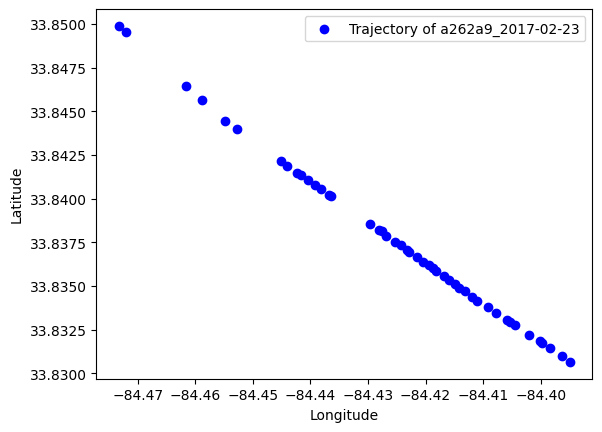

Đã vẽ xong chuyến: a262a9_2017-02-23


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn đến file CSV cụ thể
file_path = "/content/drive/MyDrive/merged_data/a262a9_2017-02-23.csv"
output_dir = "/content/drive/MyDrive/plots"

# Đảm bảo thư mục đầu ra tồn tại
os.makedirs(output_dir, exist_ok=True)

# Hàm để vẽ quỹ đạo và lưu đồ thị
def plot_trajectory(data, output_path, flight_name):
    # Loại bỏ các điểm trùng lặp dựa trên các cột lon và lat
    data = data.drop_duplicates(subset=['lon', 'lat'])

    fig, ax = plt.subplots()

    # Chuyển đổi tọa độ từ dataframe
    lon = data['lon'].values
    lat = data['lat'].values

    # Vẽ các điểm riêng biệt không có đường nối
    ax.scatter(lon, lat, label=f'Trajectory of {flight_name}', marker='o', color='b')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

    # Lưu đồ thị
    plt.savefig(output_path)
    plt.show()

# Đọc dữ liệu từ file CSV
data = pd.read_csv(file_path)

# Kiểm tra nếu các cột 'lon' và 'lat' có tồn tại trong dữ liệu
if 'lon' in data.columns and 'lat' in data.columns:
    # Lấy tên chuyến bay từ tên file
    flight_name = os.path.basename(file_path).split('.')[0]

    # Vẽ quỹ đạo và lưu đồ thị
    output_path = os.path.join(output_dir, f'trajectory_{flight_name}.png')
    plot_trajectory(data, output_path, flight_name)

    # In tên chuyến bay sau khi vẽ
    print(f"Đã vẽ xong chuyến: {flight_name}")
else:
    print(f"File {os.path.basename(file_path)} does not contain 'lon' or 'lat' columns.")


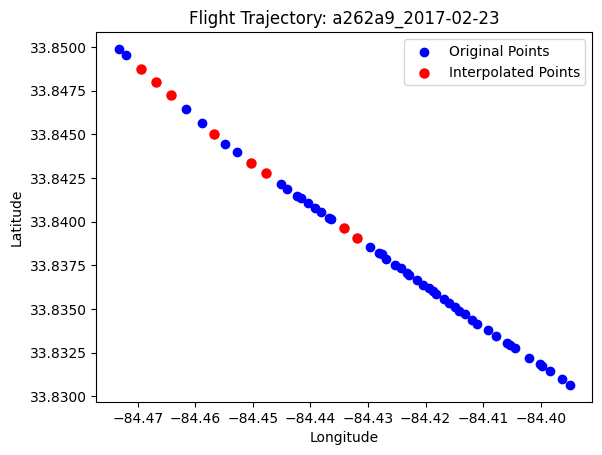

Đã vẽ xong chuyến: a262a9_2017-02-23


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Đường dẫn đến file CSV cụ thể
file_path = "/content/drive/MyDrive/merged_data/a262a9_2017-02-23.csv"
output_dir = "/content/drive/MyDrive/plots"

# Đảm bảo thư mục đầu ra tồn tại
os.makedirs(output_dir, exist_ok=True)

# Hàm để tính khoảng cách giữa hai tọa độ địa lý
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).meters

# Hàm để nội suy điểm mới nếu khoảng cách lớn hơn 300m
def interpolate_points(lon1, lat1, lon2, lat2):
    coords1 = (lat1, lon1)
    coords2 = (lat2, lon2)
    dist = calculate_distance(coords1, coords2)

    if dist > 300:
        num_interp_points = int(dist // 300)  # Số lượng điểm nội suy
        lons = np.linspace(lon1, lon2, num=num_interp_points + 2)[1:-1]
        lats = np.linspace(lat1, lat2, num=num_interp_points + 2)[1:-1]
        return list(zip(lons, lats))
    else:
        return []

# Hàm để vẽ quỹ đạo và lưu đồ thị
def plot_trajectory(data, output_path, flight_name):
    # Loại bỏ các điểm trùng lặp dựa trên các cột lon và lat
    data = data.drop_duplicates(subset=['lon', 'lat'])

    interp_lons = []
    interp_lats = []
    new_lons = []
    new_lats = []

    # Lặp qua các điểm để kiểm tra khoảng cách và thực hiện nội suy
    for i in range(len(data) - 1):
        lon1, lat1 = data.iloc[i][['lon', 'lat']]
        lon2, lat2 = data.iloc[i + 1][['lon', 'lat']]

        # Thêm điểm gốc vào danh sách
        interp_lons.append(lon1)
        interp_lats.append(lat1)

        # Nếu khoảng cách lớn hơn 300m, thực hiện nội suy
        new_points = interpolate_points(lon1, lat1, lon2, lat2)
        for lon, lat in new_points:
            new_lons.append(lon)
            new_lats.append(lat)

    # Thêm điểm cuối cùng
    interp_lons.append(data['lon'].iloc[-1])
    interp_lats.append(data['lat'].iloc[-1])

    # Vẽ biểu đồ geoaltitude theo thời gian
    fig, ax = plt.subplots()
    ax.scatter(interp_lons, interp_lats, marker='o', color='b', label='Original Points')
    ax.scatter(new_lons, new_lats, marker='o', color='r', edgecolors='red', linewidth=1.5, label='Interpolated Points')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    ax.set_title(f'Flight Trajectory: {flight_name}')

    # Lưu đồ thị
    plt.savefig(output_path)
    plt.show()

# Đọc dữ liệu từ file CSV
data = pd.read_csv(file_path)

# Kiểm tra nếu các cột 'lon' và 'lat' có tồn tại trong dữ liệu
if 'lon' in data.columns and 'lat' in data.columns:
    # Lấy tên chuyến bay từ tên file
    flight_name = os.path.basename(file_path).split('.')[0]

    # Vẽ quỹ đạo và lưu đồ thị
    output_path = os.path.join(output_dir, f'trajectory_{flight_name}.png')
    plot_trajectory(data, output_path, flight_name)

    # In tên chuyến bay sau khi vẽ
    print(f"Đã vẽ xong chuyến: {flight_name}")
else:
    print(f"File {os.path.basename(file_path)} does not contain 'lon' or 'lat' columns.")


In [ ]:
#a47320_2017-03-25
#a77784_2017-03-21
#a82298_2017-01-21
#abdcdc_2017-01-16
#aba941_2017-01-18
#aba941_2017-02-28
#aba941_2017-03-13
#aaa28d_2017-02-24
#3a3d7e2_2017-03-19
#a67538_2017-03-14


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

input_dir = "/content/drive/MyDrive/filtered_data_0_1000"
for filename in os.listdir(input_dir):
    if filename == "ab9085_2017-03-15_1000_2000.csv":
        os.remove(os.path.join(input_dir, filename))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Đường dẫn đến thư mục chứa các file CSV
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"

# Danh sách các cột cần lấy từ file CSV
columns_to_keep = ['time', 'lat', 'lon', 'velocity', 'heading', 'geoaltitude']

# Duyệt qua từng file trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Đường dẫn đầy đủ đến file CSV
        file_path = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV, chỉ lấy các cột cần thiết
        data = pd.read_csv(file_path, usecols=columns_to_keep)

        # Lưu dữ liệu đã lọc vào file CSV mới (ghi đè lên file cũ)
        data.to_csv(file_path, index=False)

        # Xóa file cũ
        os.remove(file_path)

        # Đường dẫn đến file CSV mới (với cùng tên)
        new_file_path = os.path.join(input_dir, filename)

        # Lưu dữ liệu đã lọc vào file CSV mới
        data.to_csv(new_file_path, index=False)


In [ ]:
import os
import pandas as pd

# Đường dẫn đến thư mục chứa các file CSV đã lọc
filtered_data_dir = "/content/drive/MyDrive/filtered_data_0_1000"

# Đảm bảo thư mục lưu dữ liệu đã lọc tồn tại
os.makedirs(filtered_data_dir, exist_ok=True)

# Hàm để lọc và lưu các chuyến bay có độ cao từ 3000 đến 4000m
def filter_and_save(data, flight_name):
    # Lọc các điểm có độ cao từ 1000 đến 2000m
    filtered_data = data[(data['geoaltitude'] >= 0) & (data['geoaltitude'] <= 1000)]

    # Nếu không có dữ liệu sau khi lọc, bỏ qua
    if filtered_data.empty:
        print(f"Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: {flight_name}")
    else:
        # Lưu vào file CSV mới
        filtered_file_path = os.path.join(filtered_data_dir, f'{flight_name}_1000_2000.csv')
        filtered_data.to_csv(filtered_file_path, index=False)
        print(f"Đã lưu các điểm dữ liệu từ 1000 đến 2000m cho chuyến: {flight_name}")

# Đường dẫn đến thư mục chứa các file CSV gốc
input_dir = "/content/drive/MyDrive/merged_data"

# Lặp qua tất cả các file CSV trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Đường dẫn đầy đủ đến file CSV
        file_path = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Lấy tên chuyến bay từ tên file
        flight_name = filename.split('.')[0]

        # Lọc và lưu các chuyến bay có độ cao từ 1000 đến 2000m
        filter_and_save(data, flight_name)


Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: ad7b17_2017-03-15
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a0b550_2017-01-23
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a5818b_2017-01-23
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a5818b_2017-01-18
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a336e3_2017-02-22
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a336e3_2017-03-12
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: ad2862_2017-03-05
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a1c534_2017-01-24
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a1c534_2017-01-20
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a1c534_2017-02-01
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a39ac6_2017-02-28
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: aaad8f_2017-03-27
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: a77721_2017-03-29
Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: aaad8f_2017-02-25
Không 

Distances for a6ae1d_2017-01-18.csv:
[96.97542703964899, 107.46279608288312, 76.83592848995596, 123.4294861458586, 90.08756274111302, 95.90284559129505, 111.22554777335964, 7.619999999999777, 240.6720906502223, 30.480000000000018, 744.4983569719233, 206.0334616432159, 307.7224060184177, 965.0483133682876, 106.68000000000018, 1875.6760802890701, 117.65260124437322, 96.72851165147452, 82.25630174952988, 91.23896687478786, 29.81946580850635, 79.98256252835608, 76.90444922466048, 105.20325617638551, 103.38190085740571, 81.73937243438505, 67.37645412810669, 70.93204486823089, 77.69375298023897, 31.0166996350141, 67.45756075398452, 69.77669479073779, 53.658029675222636, 139.35382817696686, 78.68924766312982, 326.9100863588825, 82.69508846228831, 53.88484914968503, 65.73980279730456]
                    lon                lat geoaltitude
0            -84.477882          33.833049       800.1
1            -84.477882          33.833049       800.1
2          -84.47736507  33.83297509662175     

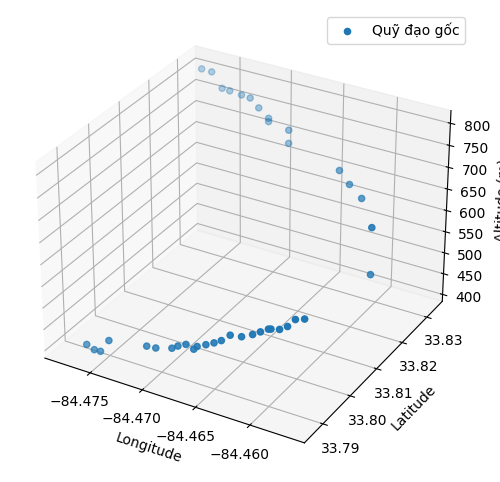

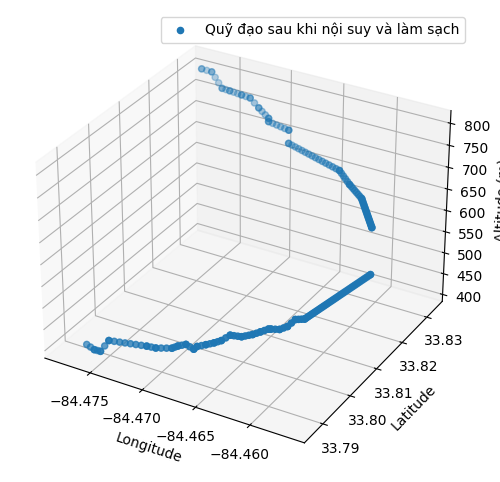

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline
import math

def haversine(lon1, lat1, lon2, lat2):
    R = 6371e3  # bán kính trái đất tính bằng mét
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # khoảng cách bề mặt trái đất
    return distance

def calculate_distances(df):
    distances = []
    for i in range(1, len(df)):
        lon1, lat1, alt1 = df.iloc[i-1][['lon', 'lat', 'geoaltitude']]
        lon2, lat2, alt2 = df.iloc[i][['lon', 'lat', 'geoaltitude']]

        surface_distance = haversine(lon1, lat1, lon2, lat2)
        altitude_difference = alt2 - alt1
        total_distance = np.sqrt(surface_distance**2 + altitude_difference**2)

        distances.append(total_distance)
    return distances

def insert_interpolated_points(data, max_distance):
    # Initialize lists to store interpolated points
    lon_new = []
    lat_new = []
    alt_new = []

    # Start with the first point in the original data
    lon_new.append(data.iloc[0]['lon'])
    lat_new.append(data.iloc[0]['lat'])
    alt_new.append(data.iloc[0]['geoaltitude'])

    # Iterate through the original data to interpolate points
    for i in range(len(data) - 1):
        lon1, lat1, alt1 = data.iloc[i][['lon', 'lat', 'geoaltitude']]
        lon2, lat2, alt2 = data.iloc[i+1][['lon', 'lat', 'geoaltitude']]

        # Add the current point to the new list
        lon_new.append(lon1)
        lat_new.append(lat1)
        alt_new.append(alt1)

        # Calculate distance between current and next points
        distance = haversine(lon1, lat1, lon2, lat2)

        # If distance is greater than max_distance, interpolate
        if distance > max_distance:
            cs_lon = CubicSpline([0, 1], [lon1, lon2])
            cs_lat = CubicSpline([0, 1], [lat1, lat2])
            cs_alt = CubicSpline([0, 1], [alt1, alt2])

            num_new_points = math.ceil(distance / max_distance) - 1
            for j in range(1, num_new_points + 1):
                t = j / (num_new_points + 1)
                lon_new.append(cs_lon(t))
                lat_new.append(cs_lat(t))
                alt_new.append(cs_alt(t))

        # Add the last point of the current segment to the new list
        lon_new.append(lon2)
        lat_new.append(lat2)
        alt_new.append(alt2)

    # Create a new DataFrame with the interpolated points
    interpolated_data = pd.DataFrame({'lon': lon_new, 'lat': lat_new, 'geoaltitude': alt_new})

    # Remove outline points where the distance is too large
    cleaned_data = remove_outline_points(interpolated_data, max_distance)

    return cleaned_data

def remove_outline_points(data, max_distance):
    # Initialize lists for cleaned data
    lon_clean = [data.iloc[0]['lon']]
    lat_clean = [data.iloc[0]['lat']]
    alt_clean = [data.iloc[0]['geoaltitude']]

    # Iterate through data to remove outline points
    for i in range(1, len(data)):
        lon_prev, lat_prev, alt_prev = lon_clean[-1], lat_clean[-1], alt_clean[-1]
        lon_curr, lat_curr, alt_curr = data.iloc[i][['lon', 'lat', 'geoaltitude']]

        # Calculate distance from previous point
        distance = haversine(lon_prev, lat_prev, lon_curr, lat_curr)

        # If distance is within max_distance, add current point
        if distance <= max_distance:
            lon_clean.append(lon_curr)
            lat_clean.append(lat_curr)
            alt_clean.append(alt_curr)

    # Create cleaned DataFrame
    cleaned_data = pd.DataFrame({'lon': lon_clean, 'lat': lat_clean, 'geoaltitude': alt_clean})

    return cleaned_data

def plot_trajectory(data, title):
    fig = plt.figure(figsize=(8, 6))  # Adjust figsize as needed
    ax = fig.add_subplot(111, projection='3d')

    lon = data['lon'].values
    lat = data['lat'].values
    alt = data['geoaltitude'].values

    ax.scatter(lon, lat, alt, label=title, marker='o')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Altitude (m)')
    ax.legend()

    plt.show()

# Đọc dữ liệu từ file CSV
data = pd.read_csv("/content/drive/MyDrive/filtered_data_0_1000/ab9085_2017-03-15_1000_2000.csv")

# Loại bỏ các điểm trùng lặp dựa trên các cột lon, lat và geoaltitude
data = data.drop_duplicates(subset=['lon', 'lat', 'geoaltitude'])

# Tính khoảng cách giữa các điểm liền kề
distances = calculate_distances(data)

# Thêm các điểm mới nếu khoảng cách > 8 km
data_interpolated = insert_interpolated_points(data, max_distance=50)

# Tạo thư mục đích nếu chưa tồn tại
output_dir = "/content/drive/MyDrive/processed_data"
os.makedirs(output_dir, exist_ok=True)

# Lưu DataFrame đã cập nhật
output_path = os.path.join(output_dir, "processed_a6ae1d_2017-01-18_cleaned.csv")
data_interpolated.to_csv(output_path, index=False)

# In khoảng cách cho file hiện tại
print(f'Distances for a6ae1d_2017-01-18.csv:')
print(distances)

# Hiển thị dữ liệu đã được chèn các điểm mới và đã được làm sạch
print(data_interpolated)

# Vẽ quỹ đạo trước và sau khi sử dụng spline bậc 3 và làm sạch các điểm
plot_trajectory(data, "Quỹ đạo gốc")
plot_trajectory(data_interpolated, "Quỹ đạo sau khi nội suy và làm sạch")


# KIẾN THIẾT LẠI QUỸ ĐẠO

In [ ]:
import pandas as pd
data1 = pd.read_csv("/content/drive/MyDrive/data_non_split/aba941_2017-03-13.csv")
data1
#data = pd.read_csv("/content/drive/MyDrive/transformed_data/transformed_a0fb74_2017-02-23.csv")
#data
import numpy as np
# Khai báo hàm Windowing (dùng để tạo các cặp X, y cho time series data)
def slicing_window(df, df_start_idx, df_end_idx, input_size, label_size, offset, label_name,label_feature):
    features = [] # Khai báo list dùng để lưu trữ các X
    labels = [] # Khai báo list dùng để lưu trữ các y

    # Nếu df_end_idx = chỉ mục cuối cùng bảng dữ liệu, cần phải dời xuống 1 khoảng = window size
    if df_end_idx == None:
        df_end_idx = len(df) - label_size - offset

    df_start_idx = df_start_idx + input_size + offset

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(df_start_idx, df_end_idx):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[label_feature][feature_start_idx:feature_end_idx] # Lấy X
        label = df[label_name][label_start_idx:label_end_idx] # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarrray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels



In [ ]:
INPUT_SIZE = 20
LABEL_SIZE = 1
OFFSET = 1
BATCH_SIZE = 64
feature = ["lat","lon","geoaltitude","heading","velocity"]
TARGET_NAME = ["lat","lon","geoaltitude"]

X_train, y_train = slicing_window(data1, 0, len(data1), INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)
y_train_reshaped = y_train.reshape(-1, 3)

# Create a DataFrame from y_train_reshaped
df_y_train = pd.DataFrame(y_train_reshaped, columns=['lat', 'lon', 'geoaltitude'])

# Save DataFrame to CSV file
df_y_train.to_csv("/content/y_train.csv", index=False)


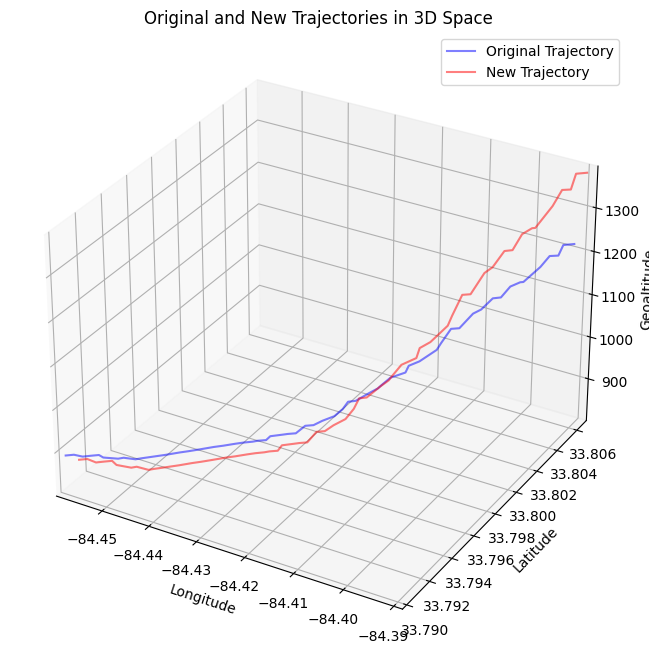

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Đường dẫn đến file CSV
file_path = "/content/y_train.csv"

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv(file_path)

# Loại bỏ các hàng có cùng giá trị lat và lon
df = df.drop_duplicates(subset=['lat', 'lon'])

# Extract dữ liệu từ các cột lat, lon, geoaltitude
lat = df['lat']
lon = df['lon']
geoaltitude = df['geoaltitude']

# Tạo quỹ đạo gốc
lat_original = lat
lon_original = lon
geoaltitude_original = geoaltitude

# Tạo quỹ đạo mới với các điểm đầu gần trùng và các điểm sau lệch nhiều hơn
lat_new = lat + 0.001  # Các điểm đầu gần trùng
lon_new = lon  # Các điểm đầu gần trùng
geoaltitude_new = geoaltitude + (geoaltitude - geoaltitude.mean()) * 0.5  # Lệch nhiều hơn

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ đường thẳng nối các điểm cho quỹ đạo gốc
ax.plot(lon_original, lat_original, geoaltitude_original, color='b', alpha=0.5, label='Original Trajectory')

# Vẽ đường thẳng nối các điểm cho quỹ đạo mới
ax.plot(lon_new, lat_new, geoaltitude_new, color='r', alpha=0.5, label='New Trajectory')

# Đặt nhãn và tiêu đề
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Geoaltitude')
ax.set_title('Original and New Trajectories in 3D Space')

# Thiết lập giới hạn cho các trục để phóng to quỹ đạo
ax.set_xlim(min(min(lon_original), min(lon_new)), max(max(lon_original), max(lon_new)))
ax.set_ylim(min(min(lat_original), min(lat_new)), max(max(lat_original), max(lat_new)))
ax.set_zlim(min(min(geoaltitude_original), min(geoaltitude_new)), max(max(geoaltitude_original), max(geoaltitude_new)))

# Thêm chú giải để phân biệt hai quỹ đạo
ax.legend()

# Hiển thị biểu đồ
plt.show()


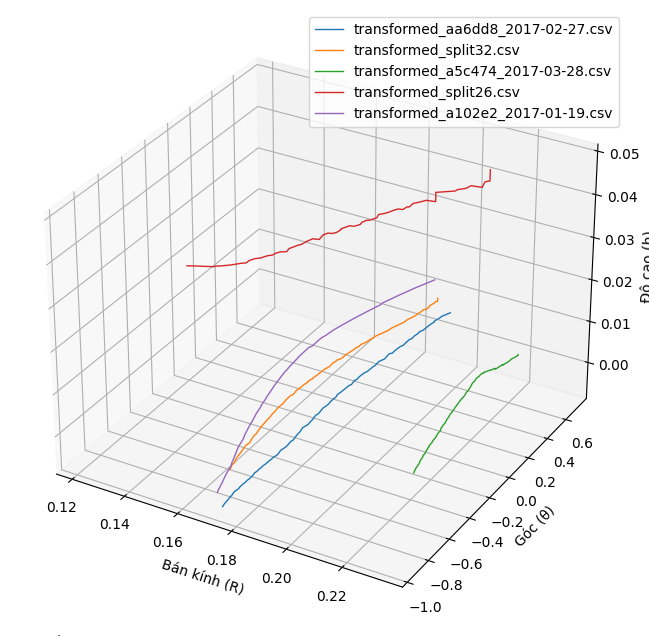

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Danh sách các đường dẫn đến các file CSV
file_paths = [
    "/content/drive/MyDrive/transformed_data/transformed_aa6dd8_2017-02-27.csv",
    "/content/drive/MyDrive/transformed_data/transformed_split32.csv",
    "/content/drive/MyDrive/transformed_data/transformed_a5c474_2017-03-28.csv",
    "/content/drive/MyDrive/transformed_data/transformed_split26.csv",
    "/content/drive/MyDrive/transformed_data/transformed_a102e2_2017-01-19.csv"
]

# Hàm để vẽ quỹ đạo trên cùng một đồ thị
def plot_trajectories(file_paths, output_path):
    fig = plt.figure(figsize=(12, 8))  # Điều chỉnh kích thước hình vẽ
    ax = fig.add_subplot(111, projection='3d')

    for file_path in file_paths:
        # Lấy tên file từ đường dẫn
        filename = os.path.basename(file_path)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Chuyển đổi tọa độ từ dataframe
        R = data['R'].values
        theta = data['theta'].values
        h = data['h'].values

        # Vẽ quỹ đạo trong tọa độ trụ
        ax.plot(R, theta, h, label=filename, linestyle='-', linewidth=1)

    ax.set_xlabel('Bán kính (R)')
    ax.set_ylabel('Góc (θ)')
    ax.set_zlabel('Độ cao (h)')
    ax.legend()

    # Lưu đồ thị
    plt.savefig(output_path)
    plt.show()

# Đường dẫn để lưu đồ thị kết quả
output_path = "/content/drive/MyDrive/plots/combined_trajectory_plot.png"

# Vẽ tất cả quỹ đạo trên cùng một đồ thị và lưu đồ thị
plot_trajectories(file_paths, output_path)


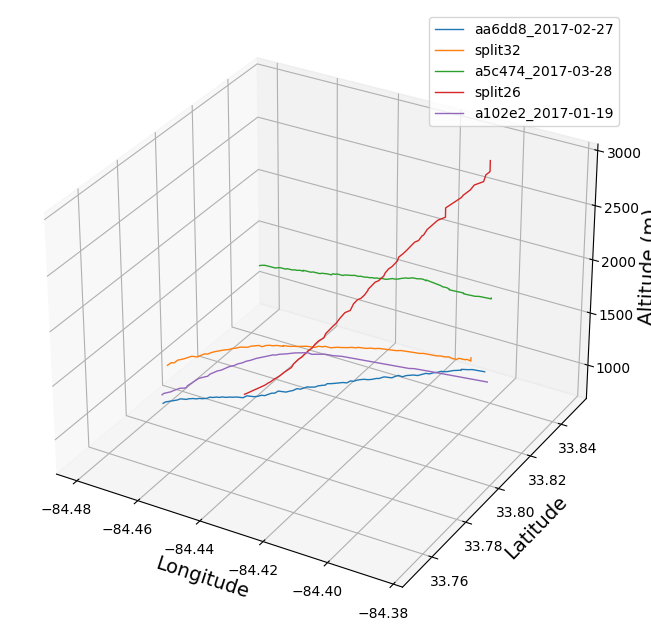

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Danh sách các đường dẫn đến các file CSV
file_paths = [
    "/content/drive/MyDrive/data_full_new/aa6dd8_2017-02-27.csv",
    "/content/drive/MyDrive/data_full_new/split32.csv",
   "/content/drive/MyDrive/data_full_new/a5c474_2017-03-28.csv",
   "/content/drive/MyDrive/data_full_new/split26.csv",
    "/content/drive/MyDrive/data_full_new/a102e2_2017-01-19.csv"
]

# Hàm để vẽ quỹ đạo trên cùng một đồ thị
def plot_trajectories(file_paths, output_path):
    fig = plt.figure(figsize=(12, 8))  # Tạo hình vẽ với kích thước lớn hơn
    ax = fig.add_subplot(111, projection='3d')

    for file_path in file_paths:
        # Lấy tên file từ đường dẫn
        filename = os.path.basename(file_path)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Chuyển đổi tọa độ từ dataframe
        lon = data['lon'].values
        lat = data['lat'].values
        alt = data['geoaltitude'].values

        # Vẽ quỹ đạo với đường thẳng nối qua các điểm
        ax.plot(lon, lat, alt, label=filename.split('.')[0], linestyle='-', linewidth=1)

    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    ax.set_zlabel('Altitude (m)', fontsize=14)
    ax.legend()

    # Lưu đồ thị
    plt.savefig(output_path, dpi=300)  # Tăng độ phân giải
    plt.show()

# Đường dẫn để lưu đồ thị kết quả
output_path = "/content/drive/MyDrive/plots/combined_trajectory_plot.png"

# Vẽ tất cả quỹ đạo trên cùng một đồ thị và lưu đồ thị
plot_trajectories(file_paths, output_path)


#Vẽ quỹ đạo 3D


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Path to the CSV file
file_path = "/content/drive/MyDrive/merged_data/a9b2d4_2017-01-12.csv"

# Function to plot trajectory
def plot_trajectory(data, new_data, label, color, output_path):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Extract coordinates from data
    lon = data['lon'].values
    lat = data['lat'].values
    alt = data['geoaltitude'].values

    # Extract coordinates from new_data
    new_lon = new_data['lon'].values
    new_lat = new_data['lat'].values
    new_alt = new_data['geoaltitude'].values

    # Plot actual trajectory with dashed line
    ax.plot(lon, lat, alt, label='Actuals', color='blue', linestyle='-', linewidth=2)

    # Plot new trajectory with solid line
    ax.plot(new_lon, new_lat, new_alt, label=label, color=color, linestyle='-', linewidth=2, dashes=(5, 2))

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Altitude (m)')
    ax.legend()

    # Adjust the subplot to shift the plot to the left
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)  # Adjust wspace to shift left

    # Save and show plot
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Create directories if they don't exist
output_dir_data = "/content/drive/MyDrive/data_full_new"
output_dir_plots = "/content/drive/MyDrive/plots"

os.makedirs(output_dir_data, exist_ok=True)
os.makedirs(output_dir_plots, exist_ok=True)

# Read data from CSV file
data = pd.read_csv(file_path)

# Function to create a new trajectory with gradually increasing deviation
def create_new_trajectory(data, lon_shift, lat_shift, alt_shift):
    new_data = data.copy()
    n = len(data)
    scaling_factors = np.linspace(0, 1, n)
    new_data['lon'] += scaling_factors * lon_shift
    new_data['lat'] += scaling_factors * lat_shift
    new_data['geoaltitude'] += scaling_factors * alt_shift
    return new_data

# Create new trajectories by shifting the points with increasing deviation
new_data1 = create_new_trajectory(data, -0.0001, 0.00004, 7.45)
new_data2 = create_new_trajectory(data, -0.0004, 0.00078, 7.56)
new_data3 = create_new_trajectory(data, 0.0006, -0.0089, 18.56)

# Save new trajectories to CSV files
new_data1.to_csv(os.path.join(output_dir_data, "newdata1.csv"), index=False)
new_data2.to_csv(os.path.join(output_dir_data, "newdata2.csv"), index=False)
new_data3.to_csv(os.path.join(output_dir_data, "newdata3.csv"), index=False)

# Plot original and new trajectories
plot_trajectory(data, new_data1, label='BayesCoord(CNN-LSTM)', color='red', output_path=os.path.join(output_dir_plots, "trajectory_plot1.png"))
plot_trajectory(data, new_data2, label='Coord(CNN-LSTM)', color='green', output_path=os.path.join(output_dir_plots, "trajectory_plot2.png"))
plot_trajectory(data, new_data3, label='CNN-LSTM', color='orange', output_path=os.path.join(output_dir_plots, "trajectory_plot3.png"))


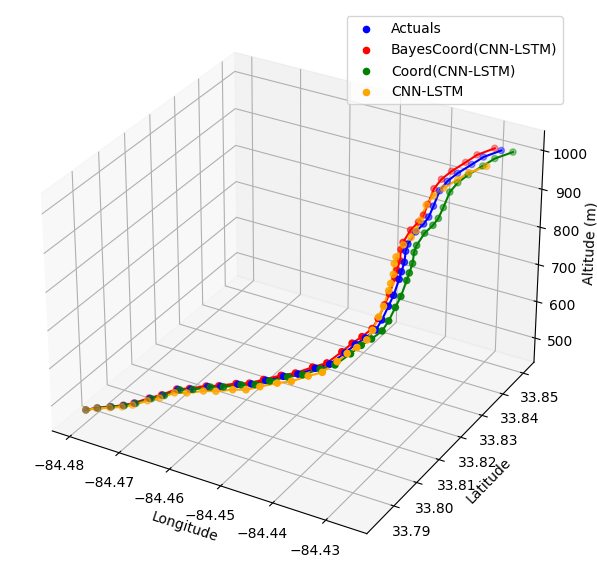

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Path to the CSV file
file_path = "/content/drive/MyDrive/processed_data/processed_a3a9d9_2017-01-19.csv"

# Function to select 40 equally spaced points
def select_equally_spaced_points(data, num_points=40):
    n = len(data)
    indices = np.round(np.linspace(0, n - 1, num_points)).astype(int)
    selected_data = data.iloc[indices].reset_index(drop=True)
    return selected_data

# Function to plot multiple trajectories on the same figure
def plot_trajectories(data, new_data_list, labels, colors, output_path):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extract coordinates from data
    lon = data['lon'].values
    lat = data['lat'].values
    alt = data['geoaltitude'].values

    # Plot actual trajectory with circular markers
    ax.scatter(lon, lat, alt, label='Actuals', color='blue', marker='o')
    ax.plot(lon, lat, alt, color='blue')

    # Plot new trajectories with circular markers
    for new_data, label, color in zip(new_data_list, labels, colors):
        new_lon = new_data['lon'].values
        new_lat = new_data['lat'].values
        new_alt = new_data['geoaltitude'].values
        ax.scatter(new_lon, new_lat, new_alt, label=label, color=color, marker='o')
        ax.plot(new_lon, new_lat, new_alt, color=color)

    ax.set_xlabel('Longitude',labelpad=2)
    ax.set_ylabel('Latitude',labelpad=2)
    ax.set_zlabel('Altitude (m)', labelpad=2)  # Increase label padding

    ax.legend()

    # Adjust the subplot to shift the plot to the left and add space for labels
    fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.2)  # Increase bottom margin

    # Save and show plot
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Create directories if they don't exist
output_dir_data = "/content/drive/MyDrive/data_full_new"
output_dir_plots = "/content/drive/MyDrive/plots"

os.makedirs(output_dir_data, exist_ok=True)
os.makedirs(output_dir_plots, exist_ok=True)

# Read data from CSV file
data = pd.read_csv(file_path)

# Function to create a new trajectory with gradually increasing deviation
def create_new_trajectory(data, lon_shift, lat_shift, alt_shift):
    new_data = data.copy()
    n = len(data)
    scaling_factors = np.linspace(0, 1, n)
    new_data['lon'] += scaling_factors * lon_shift
    new_data['lat'] += scaling_factors * lat_shift
    new_data['geoaltitude'] += scaling_factors * alt_shift
    return new_data

# Create new trajectories by shifting the points with increasing deviation
new_data1 = create_new_trajectory(data, -0.0013, 0.00015, 0.45)
new_data2 = create_new_trajectory(data, 0.002, 0.0005, 0.56)
new_data3 = create_new_trajectory(data, 0.0008, -0.0089, 5.56)

# Select 40 equally spaced points
data_selected = select_equally_spaced_points(data)
new_data1_selected = select_equally_spaced_points(new_data1)
new_data2_selected = select_equally_spaced_points(new_data2)
new_data3_selected = select_equally_spaced_points(new_data3)

# Save new trajectories to CSV files
new_data1_selected.to_csv(os.path.join(output_dir_data, "newdata1.csv"), index=False)
new_data2_selected.to_csv(os.path.join(output_dir_data, "newdata2.csv"), index=False)
new_data3_selected.to_csv(os.path.join(output_dir_data, "newdata3.csv"), index=False)

# Plot original and new trajectories on the same figure
new_data_list = [new_data1_selected, new_data2_selected, new_data3_selected]
labels = ['BayesCoord(CNN-LSTM)', 'Coord(CNN-LSTM)', 'CNN-LSTM']
colors = ['red', 'green', 'orange']
plot_trajectories(data_selected, new_data_list, labels, colors, output_path=os.path.join(output_dir_plots, "trajectory_plot_combined.png"))


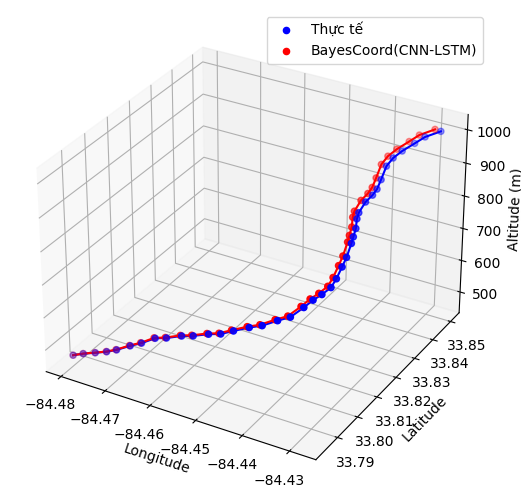

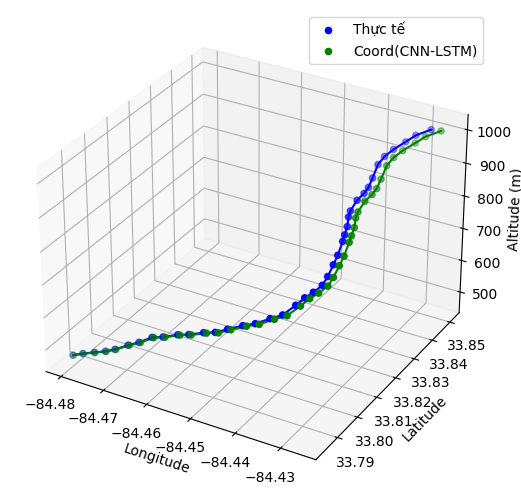

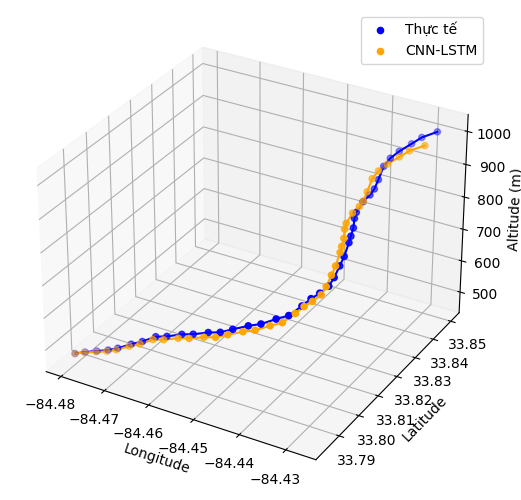

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import interp1d

# Path to the CSV file
file_path = "/content/drive/MyDrive/processed_data/processed_a3a9d9_2017-01-19.csv"

# Function to select 40 equally spaced points
def select_equally_spaced_points(data, num_points=40):
    n = len(data)
    indices = np.round(np.linspace(0, n - 1, num_points)).astype(int)
    selected_data = data.iloc[indices].reset_index(drop=True)
    return selected_data

# Function to plot trajectory with circular markers and connecting lines
def plot_trajectory(data, new_data, label, color, output_path):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Extract coordinates from data
    lon = data['lon'].values
    lat = data['lat'].values
    alt = data['geoaltitude'].values

    # Extract coordinates from new_data
    new_lon = new_data['lon'].values
    new_lat = new_data['lat'].values
    new_alt = new_data['geoaltitude'].values

    # Plot actual trajectory with circular markers
    ax.scatter(lon, lat, alt, label='Thực tế ', color='blue', marker='o')
    ax.plot(lon, lat, alt, color='blue')

    # Plot new trajectory with circular markers
    ax.scatter(new_lon, new_lat, new_alt, label=label, color=color, marker='o')
    ax.plot(new_lon, new_lat, new_alt, color=color)

    ax.set_xlabel('Longitude', labelpad=2)
    ax.set_ylabel('Latitude', labelpad=2)
    ax.set_zlabel('Altitude (m)', labelpad=2)
    ax.legend()

    # Adjust the subplot to shift the plot to the left
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)  # Adjust wspace to shift left

    # Save and show plot
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Create directories if they don't exist
output_dir_data = "/content/drive/MyDrive/data_full_new"
output_dir_plots = "/content/drive/MyDrive/plots"

os.makedirs(output_dir_data, exist_ok=True)
os.makedirs(output_dir_plots, exist_ok=True)

# Read data from CSV file
data = pd.read_csv(file_path)

# Function to create a new trajectory with gradually increasing deviation
def create_new_trajectory(data, lon_shift, lat_shift, alt_shift):
    new_data = data.copy()
    n = len(data)
    scaling_factors = np.linspace(0, 1, n)
    new_data['lon'] += scaling_factors * lon_shift
    new_data['lat'] += scaling_factors * lat_shift
    new_data['geoaltitude'] += scaling_factors * alt_shift
    return new_data

# Create new trajectories by shifting the points with increasing deviation
new_data1 = create_new_trajectory(data, -0.0013, 0.00015, 0.45)
new_data2 = create_new_trajectory(data, 0.002, 0.0005, 0.56)
new_data3 = create_new_trajectory(data, 0.0008, -0.0089, 5.56)

# Select 40 equally spaced points
data_selected = select_equally_spaced_points(data)
new_data1_selected = select_equally_spaced_points(new_data1)
new_data2_selected = select_equally_spaced_points(new_data2)
new_data3_selected = select_equally_spaced_points(new_data3)

# Save new trajectories to CSV files
new_data1_selected.to_csv(os.path.join(output_dir_data, "newdata1.csv"), index=False)
new_data2_selected.to_csv(os.path.join(output_dir_data, "newdata2.csv"), index=False)
new_data3_selected.to_csv(os.path.join(output_dir_data, "newdata3.csv"), index=False)

# Plot original and new trajectories
plot_trajectory(data_selected, new_data1_selected, label='BayesCoord(CNN-LSTM)', color='red', output_path=os.path.join(output_dir_plots, "trajectory_plot1.png"))
plot_trajectory(data_selected, new_data2_selected, label='Coord(CNN-LSTM)', color='green', output_path=os.path.join(output_dir_plots, "trajectory_plot2.png"))
plot_trajectory(data_selected, new_data3_selected, label='CNN-LSTM', color='orange', output_path=os.path.join(output_dir_plots, "trajectory_plot3.png"))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("/content/geographic_data.csv")

# Tạo figure và axis 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ quỹ đạo trong hệ tọa độ địa lý và kết nối các điểm
ax.plot(data['lon'], data['lat'], data['geoaltitude'], color='red', linestyle='-')
#ax.plot(data1['lon'], data1['lat'], data1['geoaltitude'], color='red', linestyle='-')
# Thiết lập nhãn trục
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Geoaltitude')
ax.set_title('Flight Trajectory in Geographic Coordinates')

# Hiển thị biểu đồ
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("/content/geographic_data.csv")

# Tạo figure và axis 2D
plt.figure(figsize=(10, 6))

# Vẽ quỹ đạo trong hệ tọa độ địa lý với latitude và longitude
plt.plot(data['lon'], data['lat'], color='blue', linestyle='-')
#plt.plot(data1['lon'], data1['lat'], color='red', linestyle='-')

# Thiết lập nhãn trục
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flight Trajectory in Geographic Coordinates')

# Hiển thị lưới
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


In [ ]:
INPUT_SIZE = 6
LABEL_SIZE = 1
OFFSET = 1
BATCH_SIZE = 64
feature = ["R","theta","h","heading","velocity"]
TARGET_NAME  = ["R","theta","h"]

In [ ]:
import tensorflow as tf

# Khởi tạo tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [ ]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Khai báo normalization layer
import tensorflow as tf

normalize_layer = tf.keras.layers.Normalization()
normalize_layer.adapt(X_test)

In [ ]:
print(normalize_layer(X_test))


tf.Tensor(
[[[-2.478627   -3.7938616  -4.9939265   1.2766504  -4.519784  ]
  [-2.4917877  -3.773876   -4.8756166   3.761242   -4.228713  ]
  [-2.506425   -3.7252028  -4.8756166   3.761242   -4.228713  ]
  ...
  [-2.5685904  -3.5643811  -4.5798407   2.0679035  -3.8034334 ]
  [-2.5781229  -3.515184   -4.520686    2.0679035  -3.8034334 ]
  [-2.5962818  -3.4350119  -4.34322     0.3943084  -3.3769917 ]]

 [[-2.4917877  -3.773876   -4.8756166   3.761242   -4.228713  ]
  [-2.506425   -3.7252028  -4.8756166   3.761242   -4.228713  ]
  [-2.53348    -3.6642342  -4.757306    3.761242   -4.228713  ]
  ...
  [-2.5781229  -3.515184   -4.520686    2.0679035  -3.8034334 ]
  [-2.5962818  -3.4350119  -4.34322     0.3943084  -3.3769917 ]
  [-2.5960183  -3.414013   -4.2840657  -1.6652378  -3.3070679 ]]

 [[-2.506425   -3.7252028  -4.8756166   3.761242   -4.228713  ]
  [-2.53348    -3.6642342  -4.757306    3.761242   -4.228713  ]
  [-2.556812   -3.5950637  -4.638996    4.1449494  -3.8701782 ]
  ...
  [-2.5

In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
# Khai báo một số giá trị siêu tham số
EPOCHS = 500
LR =0.001

In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.MeanAbsoluteError(), # Sử dụng hàm loss Mean Squared Error
)

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS)

In [ ]:
print(X_train)

In [ ]:
print(normalize_layer(X_train))

In [ ]:
from tensorflow.keras.models import load_model

# Tải mô hình từ đường dẫn
final_model = load_model(previous_model_weights)

# Chuẩn hóa dữ liệu test
X_test_normalized = normalize_layer(X_train)

# Dự đoán trên dữ liệu test đã được chuẩn hóa
predictions = final_model.predict(X_test_normalized)

#print(X_test_normalized)

# In ra dự đoán cho mẫu đầu tiên
#print(predictions[0])

# Hoặc nếu bạn muốn in ra dự đoán cho tất cả các mẫu, sử dụng:
print(predictions)


In [ ]:
print(X_train.shape)

(410, 8, 5)


In [ ]:
print(y_train)

In [ ]:
# Lấy giá trị loss cuối cùng trên tập kiểm tra hoặc validation
loss = final_model.evaluate(X_test, y_test)
print("MAE:", loss)

import numpy as np

def RMSE (y_pred, y_test):
   squared_errors = (y_test - y_pred) ** 2
   mean_squared_error = np.mean(squared_errors)
   root_mean_squared_error = np.sqrt(mean_squared_error)
   return root_mean_squared_error

print("RMSE:",RMSE(final_model.predict(X_test),y_test))



12/12 [==============================] - 1s 3ms/step - loss: 0.0358
MAE: 0.03580230474472046
12/12 [==============================] - 0s 3ms/step
RMSE: 0.0429358991496081


In [ ]:
print(y_train[:,0][:,])

[[ 33.79878675 -84.39714432]
 [ 33.79869364 -84.39777374]
 [ 33.79856873 -84.39837397]
 [ 33.79846088 -84.39897537]
 [ 33.79838562 -84.39960713]
 [ 33.79829407 -84.40016766]
 [ 33.79820251 -84.40061608]
 [ 33.79813501 -84.40114975]
 [ 33.79804191 -84.40172195]
 [ 33.79799536 -84.40200806]
 [ 33.79788208 -84.40285819]
 [ 33.79780915 -84.40338135]
 [ 33.79774475 -84.40386714]
 [ 33.79762294 -84.40446854]
 [ 33.79752983 -84.40504074]
 [ 33.79747009 -84.40554872]
 [ 33.79739018 -84.40601349]
 [ 33.79729707 -84.40670013]
 [ 33.79724121 -84.40717425]
 [ 33.79715742 -84.40778732]
 [ 33.79705811 -84.40840741]
 [ 33.79696655 -84.40896793]
 [ 33.7968781  -84.40956116]
 [ 33.79678345 -84.41020109]
 [ 33.79669189 -84.41070557]
 [ 33.79659879 -84.41133499]
 [ 33.79659879 -84.41133499]
 [ 33.79655457 -84.41193873]
 [ 33.79645913 -84.41242218]
 [ 33.79636603 -84.41299438]
 [ 33.79631948 -84.41333771]
 [ 33.79622637 -84.41419601]
 [ 33.79613327 -84.41476822]
 [ 33.79600525 -84.41575031]
 [ 33.7959137 

In [ ]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']# Đọc thông tin loss trên tập train
val_loss = history.history['val_loss'] # Đọc thông tin loss trên tập val

plt.figure(figsize=(8, 4)) # Cài đặt kích thước khung ảnh

plt.subplot(1, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='green') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(1, 2, 2) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='orange') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.show() # Hiển thị 2 khung ảnh nhỏ

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_prediction2(model, X, y, start, end):
    predictions = model.predict(X)
    if predictions.shape[1] == 1:  # Kiểm tra xem mô hình trả về một hoặc hai cột dự đoán
        lat, lon = predictions[:, 0], predictions[:, 0]  # Giả sử cả vĩ độ và kinh độ đều nằm trong cột đầu tiên
    else:
        lat, lon = predictions[:, 0], predictions[:, 1]  # Nếu mô hình trả về hai cột, giả sử cột thứ hai là kinh độ

    lat_actuals, lon_actuals = y[:, 0][:,0], y[:, 0][:,1]  # Trích xuất vĩ độ và kinh độ từ mảng y

    df = pd.DataFrame(data={"latitude_prediction": lat, "latitude_actuals": lat_actuals,
                            "longtitude_prediction": lon, "longtitude_actuals": lon_actuals})

    return df
data = plot_prediction2(final_model, X_test, y_test, start=0, end=155)

data_prediction = data[["latitude_prediction","longtitude_prediction"]]
data_actuals = data[["latitude_actuals","longtitude_actuals"]]
data_prediction.to_csv("data_prediction.csv")
data_actuals.to_csv("data_actuals.csv")





13/13 [==============================] - 0s 4ms/step


In [ ]:
pip install simplekml


#Mô phỏng trên bản đồ vệ tinh

In [ ]:
import pandas as pd
import simplekml

def create_kml_from_csv(csv_file, output_file):
    # Đọc file CSV
    df = pd.read_csv(csv_file)

    # Khởi tạo đối tượng KML
    kml = simplekml.Kml()

    # Lặp qua từng hàng trong DataFrame và thêm điểm vào KML
    for index, row in df.iterrows():
        kml.newpoint(coords=[(row['lon'], row['lat'])])

    # Lưu tệp KML
    kml.save(output_file)

# Đường dẫn đến file CSV
csv_file = '/content/drive/MyDrive/data_full_new/newdata.csv'

# Tên tệp KML đầu ra
output_file = 'data_prediction.kml'

# Tạo tệp KML từ file CSV
create_kml_from_csv(csv_file, output_file)


In [ ]:
import pandas as pd

search_date = '2017-03-28'

# Chuyển đổi ngày tìm kiếm sang định dạng datetime
search_date = pd.to_datetime(search_date)

# Lọc các chuyến bay trong ngày tìm kiếm và có chỉ số icao24 nhất định
flights_on_search_date1 = data[(data.index.date == search_date.date()) & (data['icao24'] == 'abe056')]

tong1 = 0
tong2 = 0
tong3 = 0

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in flights_on_search_date1.iterrows():
    if pd.isnull(row['velocity'] ):
      tong1 = tong1 + 1
for index, row in flights_on_search_date1.iterrows():
    if pd.isnull(row['heading']):
      tong2 = tong2 + 1
for index, row in flights_on_search_date1.iterrows():
    if pd.isnull(row['geoaltitude']):
      tong3 = tong3 + 1

print("Số giá trị null trong cột velocity :",tong1)
print("Số giá trị null trong cột heading :",tong2)
print("Số giá trị null trong cột geoaltitude :",tong3)
# Hiển thị kết quả
print("Tổng số điểm:",len(flights_on_search_date1))
print(flights_on_search_date1)

In [ ]:
data.info()

In [ ]:
data[data["icao24"]== "abd57e"]


#THÔNG KÊ DỮ LIỆU

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có VELOCITY bị null
flights_with_null_velocity = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data.iterrows():
    if pd.isnull(row['velocity']):
        flights_with_null_velocity.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_velocity = list(flights_with_null_velocity)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay có velocity bị NULL:", len(list_velocity))
print(list_velocity)


Số lượng chuyến bay có velocity bị NULL: 273
['a51b93', '2c0974', 'abec03', 'ad97cb', 'a4b294', '2c07f4', 'a3f253', '2c000f', '2c0567', 'a66a13', 'a98f2d', '2c0f59', 'a8c094', '2c0b3c', 'a0f815', 'a57362', 'a335f6', 'a7c878', 'a27de0', '2c0dfa', 'a5823e', 'abeb31', 'a972d3', 'a1102e', 'a1a60e', '2c0c93', 'a789bc', 'a4943e', 'a43b77', 'a39ac6', 'a32ad1', '2c048b', 'ab3c58', 'a449f1', 'a417af', '2c0b4b', 'abaa43', '2c0fa2', '2c00e2', '2c0f55', 'a1e9af', 'a4ef05', 'a506c9', '2c0036', 'a1c8eb', 'ab1d30', 'a4c9f6', 'ab4eeb', 'a18d60', 'ab62d3', '2c01b7', 'a202fd', 'ac8ed7', 'a7a25f', 'a0fb74', '2c0371', '2c03f8', 'a6006f', 'abe3e6', '2c0674', 'a90b3c', 'aafc2d', 'aaa58b', 'aa96e2', 'a7fb19', 'abd2e6', 'a6e89b', 'a7256e', '2c038d', 'a6fb2e', '2c04e0', 'abe892', 'a95340', 'aa7b54', '2c0873', 'a1dddf', '2c08ef', 'ae4ebc', '2c0d36', '0d0600', '2c0ba3', 'a5e921', 'a94b50', '2c07a4', '2c080c', 'a74224', 'aa6c0f', 'aaed5a', 'ab1c47', '2c036e', '2c0390', 'a7911f', '503da5', '0c2063', 'a7debf', 'ab0

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có HEADING bị null
flights_with_null_heading = set()

# Lọc các chuyến bay có heading bị null và thêm icao24 vào tập hợp
for index, row in data.iterrows():
    if pd.isnull(row['heading']):
        flights_with_null_heading.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_heading = list(flights_with_null_heading)

# Hiển thị danh sách các icao24 của các chuyến bay có heading bị null
print("Số lượng chuyến bay có heading bị NULL:", len(list_heading))
print(list_heading)



Số lượng chuyến bay có heading bị NULL: 273
['a51b93', '2c0974', 'abec03', 'ad97cb', 'a4b294', '2c07f4', 'a3f253', '2c000f', '2c0567', 'a66a13', 'a98f2d', '2c0f59', 'a8c094', '2c0b3c', 'a0f815', 'a57362', 'a335f6', 'a7c878', 'a27de0', '2c0dfa', 'a5823e', 'abeb31', 'a972d3', 'a1102e', 'a1a60e', '2c0c93', 'a789bc', 'a4943e', 'a43b77', 'a39ac6', 'a32ad1', '2c048b', 'ab3c58', 'a449f1', 'a417af', '2c0b4b', 'abaa43', '2c0fa2', '2c00e2', '2c0f55', 'a1e9af', 'a4ef05', 'a506c9', '2c0036', 'a1c8eb', 'ab1d30', 'a4c9f6', 'ab4eeb', 'a18d60', 'ab62d3', '2c01b7', 'a202fd', 'ac8ed7', 'a7a25f', 'a0fb74', '2c0371', '2c03f8', 'a6006f', 'abe3e6', '2c0674', 'a90b3c', 'aafc2d', 'aaa58b', 'aa96e2', 'a7fb19', 'abd2e6', 'a6e89b', 'a7256e', '2c038d', 'a6fb2e', '2c04e0', 'abe892', 'a95340', 'aa7b54', '2c0873', 'a1dddf', '2c08ef', 'ae4ebc', '2c0d36', '0d0600', '2c0ba3', 'a5e921', 'a94b50', '2c07a4', '2c080c', 'a74224', 'aa6c0f', 'aaed5a', 'ab1c47', '2c036e', '2c0390', 'a7911f', '503da5', '0c2063', 'a7debf', 'ab09

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có GEOALTITUDE bị null
flights_with_null_geoaltitude = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data.iterrows():
    if pd.isnull(row['geoaltitude']):
        flights_with_null_geoaltitude.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
flights_with_null_geoaltitude_list = list(flights_with_null_geoaltitude)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay bị có GEOALTITUDE (NULL):",len(flights_with_null_geoaltitude_list))

print(flights_with_null_geoaltitude_list)


Số lượng chuyến bay bị có GEOALTITUDE (NULL): 713
['a54274', 'a32890', 'a51b93', 'a13408', 'abec03', '2c0d6b', 'a19db5', 'a1e241', '2c000f', 'a66a13', 'a34e40', 'a98f2d', '2c0876', 'a57362', 'a335f6', 'a6844d', 'a7c878', '2c04d2', 'abe448', 'a789bc', 'adde49', '2c048b', 'acf5be', '2c09e9', 'a2cc46', '2c04dd', 'aa16d5', 'a1c8eb', 'a82298', 'a4c9f6', 'a77111', 'a18d60', 'a5ca58', 'ac8ed7', 'aa6dd8', '2c0371', '2c03f8', 'a1fc3b', 'abe3e6', 'ab9de9', 'aaa58b', 'aa96e2', 'adddd5', '2c09be', 'a6e89b', 'a7256e', 'a1d059', 'a963f7', 'a722db', 'abe892', 'aa7b54', 'a95c89', 'ae4ebc', '2c0d36', 'ab975c', 'ab43c6', 'a7911f', '503da5', 'a41e29', 'a0bcb2', 'a1ed66', 'a445f0', 'ab5c69', '2c00d0', 'a78605', '2c068b', '2c05dd', 'aaad8f', 'a7db08', '2c0946', 'abf4b0', 'a98408', 'abe1b6', 'a737c7', '0d02f1', 'ac77d0', '2c0fb9', 'a6e131', 'a16162', 'abdce1', 'a87918', 'ab14d9', 'aaa1de', 'ab2855', 'a6a77c', 'ab04f3', '2c0f2f', 'c06c58', 'a7a60e', 'a4e181', 'aaf111', 'a968bf', 'ab6c08', 'a385da', 'a16de1',

In [ ]:
tong_chuyen_bay = set()
for index, row in data.iterrows(): # duyet datafame
  tong_chuyen_bay.add(row["icao24"])
print(tong_chuyen_bay)
print("Tổng số chuyến bay:",len(tong_chuyen_bay))

{'a8b22f', '2c08f6', 'acd4f5', 'a78e09', 'a79ea8', 'a3d150', 'a4b971', 'a91535', 'a9d605', 'a34fae', 'a417af', 'a65b76', 'aaa1de', '0c208c', 'ac72af', 'a972d3', 'a45072', 'a4f7cb', 'abe892', 'a963bf', '2c0c2a', 'a09322', '34230a', 'a77442', 'a46d4f', 'a57d52', 'abaadd', 'acab11', 'aa6c0f', 'a923a9', 'ab1c40', 'c05856', 'a8bcf1', 'a5c1ad', 'aa7030', 'a12121', 'ad9003', 'abe056', 'a7c322', 'a114b1', 'aa6489', '2c09a7', 'aba6e6', '2c080c', 'ac058a', 'a00538', '424338', '4006b1', '4d0101', 'a9238a', 'c0669e', 'a389c0', 'adba21', 'c080a3', 'a757ae', 'a6189c', '2c031d', 'aacfbe', 'ad20f4', 'a0a7d6', 'aaf007', 'a37a0c', 'a7debf', 'ab5bb1', 'ac3625', 'abb2d5', 'a94b50', 'ab6800', '7c2e20', 'a6b168', '06a1e7', 'a92c6d', 'a8264f', 'a691cb', '2c0e79', '2c021c', 'aa700f', 'a0c955', 'aa099e', 'a18d60', '2c00ca', 'a688f4', 'a0f634', '0c2052', 'abdc78', 'aae24d', 'ab8fee', 'ad3654', 'a7706b', 'ab5ade', 'c03291', 'a46d70', 'a5745b', 'a3a873', 'a02159', 'a098f6', 'a0cf8d', 'aa95ac', 'a43ea6', 'a88dfd',

In [ ]:
# Tính số quỹ đạo của mỗi máy bay
trajectory_count_per_aircraft = data.groupby('icao24').size()

# Lọc các chuyến bay có quỹ đạo nhỏ hơn 10
x = 1
y = 100
flights_with_trajectory_between_10_and_20 = trajectory_count_per_aircraft[trajectory_count_per_aircraft.between(x, y)]

print(flights_with_trajectory_between_10_and_20.index.tolist())

# Hiển thị số chuyến bay có quỹ đạo nhỏ hơn 10
print("Số chuyến bay có điểm dữ liệu từ {0} đến {1} : {2}".format(x,y,len(flights_with_trajectory_between_10_and_20)))


['06a07d', '06a0df', '06a141', '06a1e6', '0c2046', '0c2047', '0c204c', '0c204f', '0c2051', '0c2059', '0c205b', '0c205c', '0c205d', '0c205e', '0c205f', '0c2061', '0c2063', '0c2064', '0c2081', '0c208c', '0c20ac', '0c20ba', '0c20ce', '0d002f', '0d0030', '0d0058', '0d0081', '0d02f1', '0d042b', '0d0516', '0d059d', '0d05ce', '0d05d5', '0d05e1', '0d0641', '0d06e3', '0d06f4', '0d0710', '0d072f', '0d0760', '0d0776', '0d07a8', '0d07d5', '0d07f0', '0d0804', '0d0805', '0d0806', '0d081c', '0d085c', '0d08a5', '0d08b3', '0d08fd', '0d0984', '0d0986', '0d0993', '0d099d', '0d09a4', '0d09b8', '0d09bf', '0d09d0', '0d09de', '0d09df', '0d09e5', '0d09eb', '0d09ec', '0d09f8', '15407a', '2c003b', '2c003c', '2c00d0', '2c00e0', '2c011d', '2c0144', '2c018c', '2c01ba', '2c01c2', '2c01f5', '2c01fe', '2c0208', '2c021c', '2c0240', '2c0249', '2c02a2', '2c02c8', '2c02e8', '2c0323', '2c0326', '2c032d', '2c036e', '2c03c4', '2c03d2', '2c03dc', '2c03ee', '2c03ff', '2c0409', '2c0503', '2c050c', '2c0551', '2c0558', '2c0575',

In [ ]:
# Đếm số lượng chuyến bay có tất cả giá trị heading bị thiếu
total_flights_with_all_missing_heading = 0
list_heading_null_all =[]
for icao24 in list_heading:
    if (data[data['icao24'] == icao24]['heading'].isnull().all()):
        total_flights_with_all_missing_heading += 1
        list_heading_null_all.append(icao24)

print("Số lượng chuyến bay có tất cả giá trị heading bị thiếu:", total_flights_with_all_missing_heading)
print(list_heading_null_all)

total_flights_with_all_missing_velocity = 0
list_velocity_null_all =[]
for icao24 in list_velocity:
    if data[data['icao24'] == icao24]['velocity'].isnull().all():
        total_flights_with_all_missing_velocity += 1
        list_velocity_null_all.append(icao24)


print("Số lượng chuyến bay có tất cả giá trị velocity bị thiếu:", total_flights_with_all_missing_velocity)
print(list_velocity_null_all)

total_flights_with_all_missing_geoaltitude = 0
list_geoaltitude_null_all =[]
for icao24 in flights_with_null_geoaltitude_list:
    if data[data['icao24'] == icao24]['geoaltitude'].isnull().all():
        total_flights_with_all_missing_geoaltitude += 1
        list_geoaltitude_null_all.append(icao24)


print("Số lượng chuyến bay có tất cả giá trị geoaltitude bị thiếu:", total_flights_with_all_missing_geoaltitude)
print(list_geoaltitude_null_all)

total_flights_with_all_missing_full_3_cot = 0
list_null_all =[]
for icao24 in list_heading:
    if (data[data['icao24'] == icao24]['heading'].isnull().all()) and (data[data['icao24'] == icao24]['velocity'].isnull().all()) and (data[data['icao24'] == icao24]['geoaltitude'].isnull().all()):
        total_flights_with_all_missing_full_3_cot += 1
        list_null_all.append(icao24)


print("Số lượng chuyến bay có tất cả giá trị geoaltitude, velocity, heading bị thiếu:", total_flights_with_all_missing_full_3_cot)
print(list_null_all)


Số lượng chuyến bay có tất cả giá trị heading bị thiếu: 20
['a1a60e', 'a4c9f6', '2c01b7', 'aafc2d', '2c0873', '2c0d36', 'a5e921', '2c036e', '2c0390', 'a7cb52', 'a16394', 'ab8ba5', 'aac366', 'a19d27', '2c0b5e', 'a8e47c', '2c00f2', 'a36d13', 'a62f85', 'a40c4b']
Số lượng chuyến bay có tất cả giá trị velocity bị thiếu: 20
['a1a60e', 'a4c9f6', '2c01b7', 'aafc2d', '2c0873', '2c0d36', 'a5e921', '2c036e', '2c0390', 'a7cb52', 'a16394', 'ab8ba5', 'aac366', 'a19d27', '2c0b5e', 'a8e47c', '2c00f2', 'a36d13', 'a62f85', 'a40c4b']
Số lượng chuyến bay có tất cả giá trị geoaltitude bị thiếu: 29
['a4c9f6', 'a5ca58', '2c0d36', '2c00f2', '2c0c2a', 'a1a60e', '2c01b7', 'aafc2d', '2c0873', '2c0b2a', '2c036e', '2c032d', 'a7cb52', '2c0240', 'a62f85', '2c01d9', 'a40c4b', '2c0b0b', 'a5e921', '2c0390', 'a16394', 'ab8ba5', 'a19d27', 'a8e47c', 'a36d13', '2c08af', 'aac366', '2c0b5e', '2c03ee']
Số lượng chuyến bay có tất cả giá trị geoaltitude, velocity, heading bị thiếu: 20
['a1a60e', 'a4c9f6', '2c01b7', 'aafc2d', '2

#TIỀN XỬ LÍ DỮ LIỆU

#Xóa các chuyến bay có quỹ đạo nhỏ hơn 10

In [ ]:
original_data = data.copy()
print((original_data))

In [ ]:

import pandas as pd

def drop_flights_by_icao24(flights_data, icao24_list):
    # Loại bỏ các hàng có mã ICAO24 trong danh sách
    flights_data = flights_data.drop(flights_data[flights_data['icao24'].isin(icao24_list)].index)
    return flights_data

# Gọi hàm để xóa các hàng có mã ICAO24 trong danh sách từ DataFrame
original_data = drop_flights_by_icao24(original_data, flights_with_trajectory_between_10_and_20.index.tolist())
# Ghi đè lên file gốc sau khi loại bỏ các hàng có mã ICAO24 trong danh sách
original_data.to_csv('original_data_new1.csv', index=True)



#Xóa các chuyến bay thiếu dữ liệu cả 3 cột velocity, heading, geoaltitude

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)


#Xóa các chuyến bay bị thiếu dữ liệu full velocity

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_velocity_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)

#Xóa các chuyến bay bị thiếu dữ liệu full heading

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_heading_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)

#Xóa các chuyến bay bị thiếu dữ liệu full geoaltitude

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_geoaltitude_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)

#Xử lí dữ liệu thiếu cột heading

In [ ]:
# Xử lí dữ liệu còn thiếu bằng cách điền giá trị gần nhất với nó
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_heading:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị bị thiếu bằng giá trị ở sau gần nhất trong cùng cột
    flights_of_icao24["heading"].fillna(method='bfill', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
# Xử dụng giá trị trung bình
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_heading:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Tính giá trị trung bình của cột 'heading'
    mean_heading = flights_of_icao24['heading'].mean()

    # Điền giá trị trung bình vào các giá trị thiếu của cột 'heading'
    flights_of_icao24['heading'].fillna(mean_heading, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
#Xử dụng phép nội suy bậc 3
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_heading:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị thiếu của cột 'velocity' bằng nội suy đa thức bậc 3 từ cả hai hướng
    flights_of_icao24['heading'].interpolate(method='polynomial', order=3, direction='both', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


#Xử lí dữ liệu thiếu cột velocity

In [ ]:
# Xử lí dữ liệu còn thiếu bằng cách điền giá trị gần nhất với nó
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_velocity:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị bị thiếu bằng giá trị ở sau gần nhất trong cùng cột
    flights_of_icao24["velocity"].fillna(method='bfill', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
#Xử dụng giá trị trung bình

import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_velocity:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Tính giá trị trung bình của cột 'heading'
    mean_heading = flights_of_icao24['velocity'].mean()

    # Điền giá trị trung bình vào các giá trị thiếu của cột 'heading'
    flights_of_icao24['velocity'].fillna(mean_heading, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)

In [ ]:
# Xử dụng nội suy bậc 3

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_velocity:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị thiếu của cột 'velocity' bằng spline bậc 3
    flights_of_icao24['velocity'].interpolate(method='spline', order=3, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24
# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


#Xử lí dữ liệu thiếu cột geoaltitude

In [ ]:
# Xử lí dữ liệu còn thiếu bằng cách điền giá trị gần nhất với nó
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in flights_with_null_geoaltitude_list:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị bị thiếu bằng giá trị ở sau gần nhất trong cùng cột
    flights_of_icao24["geoaltitude"].fillna(method='bfill', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
#Xử lí theo giá trị trung bình
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in flights_with_null_geoaltitude_list:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Tính giá trị trung bình của cột 'heading'
    mean_heading = flights_of_icao24['geoaltitude'].mean()

    # Điền giá trị trung bình vào các giá trị thiếu của cột 'heading'
    flights_of_icao24['geoaltitude'].fillna(mean_heading, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)

In [ ]:
# Xử lí nội suy bậc 3
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in flights_with_null_geoaltitude_list:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị thiếu của cột 'velocity' bằng spline bậc 3
    flights_of_icao24['geoaltitude'].interpolate(method='spline', order=3, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24
# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


#Lưu dữ liệu sang file mới

In [ ]:
# spline
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
# gan nhat
original_data.to_csv('original_data_new.csv', index= True)

In [ ]:
#spline
data1 = pd.read_csv('original_data_new1.csv')
data1["time"] = pd.to_datetime(data1['time'], unit='s')
# Đặt cột "time" làm cột chỉ mục (index)
data1.set_index('time', inplace=True)

data1= data1[["icao24","lat","lon","velocity","heading","geoaltitude"]]
data1

icao24        lat        lon    velocity     heading  \
time                                                                        
2016-11-11 14:47:06  a1fb8f  33.755679 -84.465466  227.710488  348.664682   
2016-11-11 14:47:07  a1fb8f  33.757645 -84.465917  227.710488  348.664682   
2016-11-11 14:47:08  a1fb8f  33.758743 -84.466198  227.710488  348.664682   
2016-11-11 14:47:09  a1fb8f  33.761536 -84.466870  227.710488  348.664682   
2016-11-11 14:47:10  a1fb8f  33.763733 -84.467411  227.710488  348.664682   
...                     ...        ...        ...         ...         ...   
2017-03-30 15:12:11  aba941  33.801773 -84.419338  132.007774   73.471851   
2017-03-30 15:12:12  aba941  33.802322 -84.417152  132.007774   73.471851   
2017-03-30 15:12:13  aba941  33.802511 -84.416485  132.155046   73.258030   
2017-03-30 15:12:14  aba941  33.803070 -84.414253  132.155046   73.258030   
2017-03-30 15:12:15  aba941  33.803395 -84.412880  132.796323   73.109416   

                     geoaltitude  
time                              
2016-11-11 14:47:06     12031.98  
2016-11-11 14:47:07     12031.98  
2016-11-11 14:47:08     12031.98  
2016-11-11 14:47:09     12031.98  
2016-11-11 14:47:10     12031.98  
...                          ...  
2017-03-30 15:12:11      1463.04  
2017-03-30 15:12:12      1485.90  
2017-03-30 15:12:13      1478.28  
2017-03-30 15:12:14      1493.52  
2017-03-30 15:12:15      1493.52  

[967291 rows x 6 columns]

In [ ]:
# gần nhat
data2 = pd.read_csv('original_data_new.csv')
data2["time"] = pd.to_datetime(data2['time'], unit='s')
# Đặt cột "time" làm cột chỉ mục (index)
data2.set_index('time', inplace=True)

data2= data2[["icao24","lat","lon","velocity","heading","geoaltitude"]]
data2

In [ ]:
# gan nhat
data1[data1["icao24"]== 'aafc2d']

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có HEADING bị null
flights_with_null_heading = set()

# Lọc các chuyến bay có heading bị null và thêm icao24 vào tập hợp
for index, row in data1.iterrows():
    if pd.isnull(row['heading']):
        flights_with_null_heading.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_heading = list(flights_with_null_heading)

# Hiển thị danh sách các icao24 của các chuyến bay có heading bị null
print("Số lượng chuyến bay có heading bị NULL:", len(list_heading))
print(list_heading)


Số lượng chuyến bay có heading bị NULL: 18
['a94b50', 'a18d60', 'a7912a', 'a2e5d1', 'a2189c', '2c0ae2', '503da5', 'a1e9af', 'a506c9', 'a4edba', 'a8754d', 'a2090d', 'a9b053', '2c0ba3', 'abd2e6', 'a2f710', 'ab8b56', 'a87904']


In [ ]:
import os
import pandas as pd
input_dir = "/content/output_directory"
output_dir = "velocity_heading"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

for icao24 in list_heading:

  input_file = os.path.join(input_dir,f"{icao24}.csv")

  data = pd.read_csv(input_file)
   # Chuyển đổi cột 'timestamp' thành đối tượng datetime
  data['time'] = pd.to_datetime(data['time'])

        # Tách dữ liệu thành các nhóm theo ngày
  for date, group_data in data.groupby(data['time'].dt.date):
            # Tạo tên tệp cho tệp nhỏ dựa trên ngày và ICAO 24
     output_file_path = os.path.join(output_dir, f"{os.path.splitext(icao24)[0]}_{date}.csv")

            # Lưu dữ liệu vào tệp nhỏ
     group_data.to_csv(output_file_path, index=True)






In [ ]:
import pandas as pd
import os




# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/velocity_heading"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/interpolated_data"  # Thay đổi đường dẫn tới thư mục lưu các tệp CSV đã nội suy

# Tạo thư mục đầu ra nếu chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV đầu vào
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Kiểm tra và nội suy bậc 3 cho cột 'heading' nếu bị thiếu dữ liệu
        if 'heading' in data.columns and data['heading'].isnull().any():
            # Nội suy bậc 3 từ cả hai hướng

             data['heading'].interpolate(method='polynomial', order=3, inplace=True, direction='both')

        if 'velocity' in data.columns and data['velocity'].isnull().any():
    # Nội suy bậc 3 từ cả hai hướng
            data['velocity'].interpolate(method='polynomial', order=3, inplace=True, direction='both')

       # if 'geoaltitude' in data.columns and data['geoaltitude'].isnull().any():
            # Nội suy bậc 3 từ cả hai hướng
          #  data['geoaltitude'].interpolate(method='polynomial', order=3, inplace=True)


        # Lưu dữ liệu đã được nội suy vào tệp CSV mới trong thư mục đầu ra
        output_file = os.path.join(output_dir, filename)
        data.to_csv(output_file, index=True)

        print(f"Đã xử lý và lưu tệp: {output_file}")
#/content/interpolated_data/06a1e7_2016-12-04.csv

In [ ]:
import os
import pandas as pd

input_dir = "/content/velocity_heading"

for filename in os.listdir(input_dir):
    input_file = os.path.join(input_dir, filename)

    data = pd.read_csv(input_file)

    # Kiểm tra nếu không có giá trị null trong cột "heading"
    if data["heading"].notnull().all():
        # Xóa tệp tin
        os.remove(input_file)
        print(f"Đã xóa tệp tin: {filename}")


In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có VELOCITY bị null
flights_with_null_velocity = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data1.iterrows():
    if pd.isnull(row['velocity']):
        flights_with_null_velocity.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_velocity = list(flights_with_null_velocity)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay có velocity bị NULL:", len(list_velocity))
print(list_velocity)

Số lượng chuyến bay có velocity bị NULL: 253
['2c074b', 'ab3c58', 'a678ef', 'a1c8eb', 'a91536', 'ab7a21', 'a36110', 'a1db3a', '0c2063', 'ab4153', 'a1102e', 'a3e08d', 'a449f1', 'ab6b45', '2c0b3c', '2c0b4b', 'a7fb19', 'a57362', '2c0fb9', 'abf09e', 'a336df', '2c02c8', '2c018c', 'ab34ea', 'a9a1d9', 'ac8ed7', 'a69900', 'a51b93', 'a2b8c5', 'a41b66', 'ab2b2c', 'a506c9', '2c0c93', 'a7911f', 'a98f2d', 'c03bf7', 'abe82c', 'abe579', 'a577a3', '2c08ef', 'abe475', 'a2b371', 'a7912a', '2c01f4', '503daf', 'aa7b54', 'a7c878', 'a0f815', 'a6006f', 'abe0df', 'a6bf31', 'a8c094', '2c0012', '2c0b5c', 'ac02b4', 'a0e600', 'a972d3', 'a32ebb', 'a16de1', '2c078c', 'a7a9cd', '2c0577', 'ab6c08', 'ab0d76', 'a2090d', '2c048b', 'a34fae', '2c0a9f', 'ab62d3', 'a0fb74', '2c080c', 'a335f6', 'a456a9', '2c00f5', 'a95dba', 'a1e14a', 'ab8b56', 'ab1122', '503da5', '0d0600', 'a85953', '2c09a7', '2c0adf', '2c0602', 'ab04f3', '2c0fcf', 'a8754d', 'ab72b3', 'a48e63', '2c0ba3', 'a4eb80', 'a7db08', '2c00e2', 'a0902d', '2c0567', 'a63

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có GEOALTITUDE bị null
flights_with_null_geoaltitude = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data1.iterrows():
    if pd.isnull(row['geoaltitude']):
        flights_with_null_geoaltitude.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
flights_with_null_geoaltitude_list = list(flights_with_null_geoaltitude)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay bị có GEOALTITUDE (NULL):",len(flights_with_null_geoaltitude_list))

print(flights_with_null_geoaltitude_list)


Số lượng chuyến bay bị có GEOALTITUDE (NULL): 684
['ad7a5f', 'ac7082', 'a1db3a', 'abd19e', 'a76546', 'aba281', 'a449f1', 'ab6b45', '2c0b4b', 'a7fb19', 'a8e813', 'abf09e', 'a336df', 'a1a8db', '2c02c8', 'ac8ed7', 'a69900', 'a2b8c5', 'a41e90', 'a9021c', 'a4943f', 'a07f44', '2c08ef', '71bc15', 'abf17f', 'a2cc46', 'a7c878', 'abe0df', '2c011f', 'a4ba02', 'a8c094', 'adb3cb', '2c078c', 'a0d90c', 'aaa2d3', 'ac7f41', 'ab62d3', 'adc5a6', 'a335f6', 'a199fe', 'a1e14a', '2c0784', 'a474e8', 'ab8b56', 'aaa201', 'a78a52', '2c068b', 'a63bf4', 'a85953', 'aae5f7', 'a84660', 'acc3b4', 'a7128b', '2c00d6', 'ab2855', 'aa6d33', 'a494eb', '2c01e0', 'a96c96', 'a64d06', 'a98051', 'a74170', 'a1bfba', 'ab23b5', 'abe2a3', 'ab5e9b', 'a44e18', 'a3323f', 'ad0e61', '2c07a4', 'a7ad84', 'a1d10c', 'ab5eb2', 'abec03', 'a32890', 'a6cff8', 'ad97cb', 'a118e0', 'a5b923', 'a8b4eb', 'aa795d', 'adf194', 'a339ad', '2c0bf0', 'abfb46', '2c09e9', 'a49510', 'abb666', 'a6227b', 'aa6f17', 'adb782', 'ad44bc', 'ab2760', 'ab37d6', 'ab1c47',

In [ ]:
import os
import pandas as pd
input_dir = "/content/output_directory"
output_dir = "geoaltitude"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

for icao24 in flights_with_null_geoaltitude_list:

  input_file = os.path.join(input_dir,f"{icao24}.csv")

  data = pd.read_csv(input_file)
   # Chuyển đổi cột 'timestamp' thành đối tượng datetime
  data['time'] = pd.to_datetime(data['time'])

        # Tách dữ liệu thành các nhóm theo ngày
  for date, group_data in data.groupby(data['time'].dt.date):
            # Tạo tên tệp cho tệp nhỏ dựa trên ngày và ICAO 24
     output_file_path = os.path.join(output_dir, f"{os.path.splitext(icao24)[0]}_{date}.csv")

            # Lưu dữ liệu vào tệp nhỏ
     group_data.to_csv(output_file_path, index=True)




<ipython-input-37-6a23a43c01da>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


In [ ]:
data1[data1["icao24"]== "ab3c58"]

icao24        lat        lon    velocity     heading  \
time                                                                        
2017-01-16 13:46:32  ab3c58  33.813311 -84.406414  158.035656  272.052065   
2017-01-16 13:46:33  ab3c58  33.813400 -84.408127  158.035656  272.052065   
2017-01-16 13:46:34  ab3c58  33.813400 -84.408127  158.035656  272.052065   
2017-01-16 13:46:35  ab3c58  33.813446 -84.410033  159.578008  272.032223   
2017-01-16 13:46:36  ab3c58  33.813544 -84.413681  160.606253  272.019207   
...                     ...        ...        ...         ...         ...   
2017-03-25 15:15:16  ab3c58  33.814407 -84.468384  178.004315  270.496772   
2017-03-25 15:15:17  ab3c58  33.814453 -84.472251  178.518739  270.495340   
2017-03-25 15:15:18  ab3c58  33.814475 -84.475937  179.033164  270.493917   
2017-03-25 15:15:19  ab3c58  33.814475 -84.477654  179.033164  270.493917   
2017-03-25 15:15:20  ab3c58  33.814475 -84.477654  179.033164  270.493917   

                     geoaltitude  
time                              
2017-01-16 13:46:32      3329.94  
2017-01-16 13:46:33      3329.94  
2017-01-16 13:46:34      3329.94  
2017-01-16 13:46:35      3352.80  
2017-01-16 13:46:36      3368.04  
...                          ...  
2017-03-25 15:15:16      3467.10  
2017-03-25 15:15:17      3474.72  
2017-03-25 15:15:18      3482.34  
2017-03-25 15:15:19      3482.34  
2017-03-25 15:15:20      3482.34  

[616 rows x 6 columns]

#MÔ PHỎNG

In [ ]:
import pandas as pd

search_date = '2017-03-11'
# Chuyển đổi ngày tìm kiếm sang định dạng datetime
search_date = pd.to_datetime(search_date)

# Lọc các chuyến bay trong ngày tìm kiếm và có chỉ số icao24 nhất định
flights_on_search_date = data1[(data1.index.date == search_date.date()) & (data1['icao24'] == '2c0674')] # tb
#flights_on_search_date2 = data2[(data2.index.date == search_date.date()) & (data2['icao24'] == 'adeddd')]  # gan nhat

print(flights_on_search_date)
#print(flights_on_search_date2)

                     icao24        lat        lon   velocity     heading  \
time                                                                       
2017-03-11 22:20:27  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:28  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:29  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:30  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:31  2c0674  33.763321 -84.439461        NaN         NaN   
...                     ...        ...        ...        ...         ...   
2017-03-11 22:29:36  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:37  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:38  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:39  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:40  2c0674  33.782959 -84.408188  30.107063  236.853004   

           

In [ ]:
import folium

# Tạo một bản đồ vệ tinh
m = folium.Map(location=[33.6407, -84.4277], zoom_start=10)

# Tạo một list chứa các điểm (latitude, longitude) của quỹ đạo bay của máy bay
flight_path = []
for index, row in flights_on_search_date2.iterrows():
    flight_path.append((row['lat'], row['lon']))

# Tạo các CircleMarker cho mỗi điểm trong DataFrame
for index, row in flights_on_search_date2.iterrows():
    folium.CircleMarker(location=(row['lat'], row['lon']), radius=3, color='black', fill=False).add_to(m)

# Tạo đường kẻ thẳng dựa trên danh sách các điểm quỹ đạo
folium.PolyLine(locations=flight_path, color='red').add_to(m)

# Đánh dấu điểm đầu
folium.Marker(location=flight_path[0], popup='Điểm đầu', icon=folium.Icon(color='green')).add_to(m)

# Đánh dấu điểm cuối
folium.Marker(location=flight_path[-1], popup='Điểm cuối', icon=folium.Icon(color='blue')).add_to(m)

# Hiển thị bản đồ
m


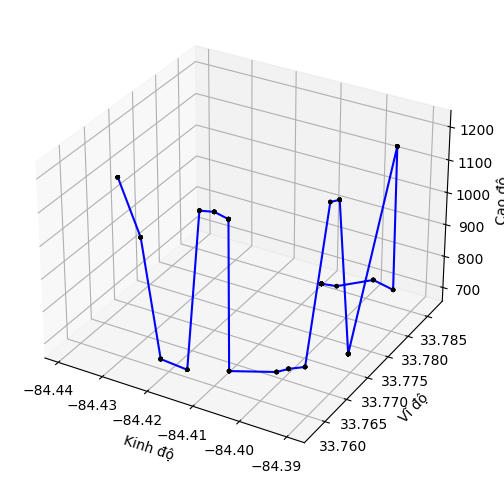

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Điều chỉnh kích thước của hình vẽ
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Biểu diễn các điểm dữ liệu thành các chấm tròn đặc màu đen
ax.scatter(specific_flight_data['lon'], specific_flight_data['lat'], specific_flight_data['geoaltitude'], color='black', marker='o', label='Các điểm',s=5)

# Nối các điểm bằng các đoạn thẳng
ax.plot(specific_flight_data['lon'], specific_flight_data['lat'], specific_flight_data['geoaltitude'], color='blue')

# Đặt nhãn trục
ax.set_xlabel('Kinh độ')
ax.set_ylabel('Vĩ độ')
ax.set_zlabel('Cao độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng kinh độ và vĩ độ

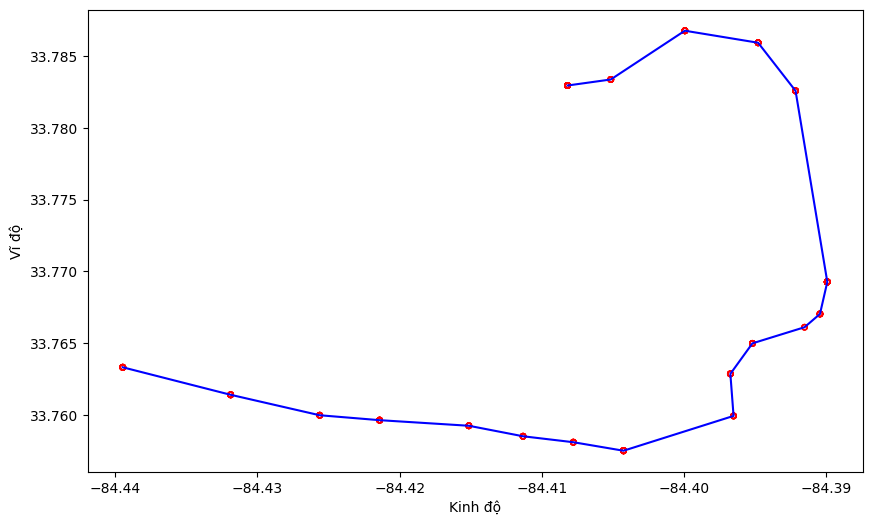

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ đường nối giữa các điểm
plt.plot(specific_flight_data['lon'], specific_flight_data['lat'], linestyle='-', color='blue')

# Vẽ điểm của quỹ đạo máy bay cụ thể với màu đen
plt.scatter(specific_flight_data['lon'], specific_flight_data['lat'], label='Quỹ đạo máy bay', marker='o', facecolors='none', edgecolors='red',s=15)

# Đặt nhãn trục
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng kinh độ theo thời gian

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ các chấm tròn rỗng
plt.scatter(specific_flight_data.index, specific_flight_data['lon'], color='none', edgecolor='black',s=17)

# Vẽ đường nối các chấm
plt.plot(specific_flight_data.index, specific_flight_data['lon'], color='blue')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('Kinh độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng vĩ độ theo thời gian

In [ ]:

import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ các chấm tròn rỗng
plt.scatter(specific_flight_data.index, specific_flight_data['lat'], color='none', edgecolor='blue', s=20)

# Vẽ đường nối các chấm
plt.plot(specific_flight_data.index, specific_flight_data['lat'], color='black')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('Vĩ độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng vận tốc theo thời gian

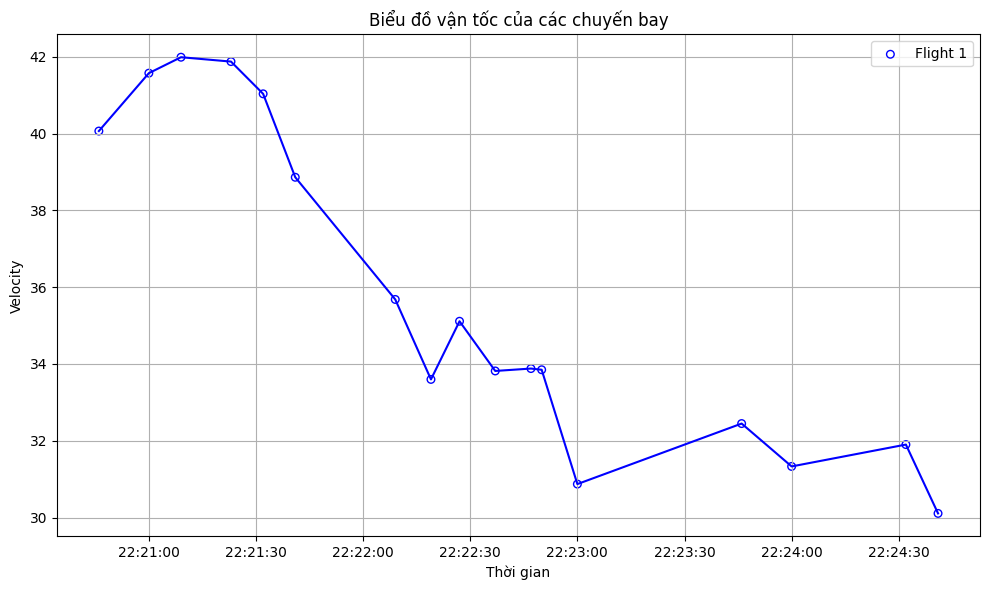

In [ ]:
import matplotlib.pyplot as plt

# Loại bỏ các dòng trùng lặp dựa trên cột 'velocity'
unique_values = flights_on_search_date.drop_duplicates(subset=['velocity'])

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Vẽ các chấm tròn rỗng
plt.scatter(unique_values.index, unique_values['velocity'], color='none', edgecolor='blue', s=30, label='Flight 1')

# Vẽ đường nối các chấm
plt.plot(unique_values.index, unique_values['velocity'], color='blue', label='_nolegend_')

# Đặt nhãn trục và tiêu đề
plt.xlabel('Thời gian')
plt.ylabel('Velocity')
plt.title('Biểu đồ vận tốc của các chuyến bay')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Chỉ định số lượng hình tròn bạn muốn hiển thị
num_points_to_show = 200

# Vẽ các hình tròn rỗng cho Flight 1
plt.scatter(flights_on_search_date.index[:num_points_to_show], flights_on_search_date['velocity'][:num_points_to_show], color='none', edgecolor='blue', s=30, label='Flight 1')

# Vẽ các hình tròn rỗng cho Flight 2
plt.scatter(flights_on_search_date2.index[:num_points_to_show], flights_on_search_date2['velocity'][:num_points_to_show], color='none', edgecolor='black', s=10, label='Flight 2')

# Vẽ đường nối các điểm cho Flight 1
plt.plot(flights_on_search_date.index[:num_points_to_show], flights_on_search_date['velocity'][:num_points_to_show], color='blue', label='_nolegend_')

# Vẽ đường nối các điểm cho Flight 2
plt.plot(flights_on_search_date2.index[:num_points_to_show], flights_on_search_date2['velocity'][:num_points_to_show], color='black', label='_nolegend_')

# Đặt nhãn trục và tiêu đề
plt.xlabel('Thời gian')
plt.ylabel('Velocity')
plt.title('Biểu đồ vận tốc của các chuyến bay')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()


#Mô phỏng độ cao theo thời gian

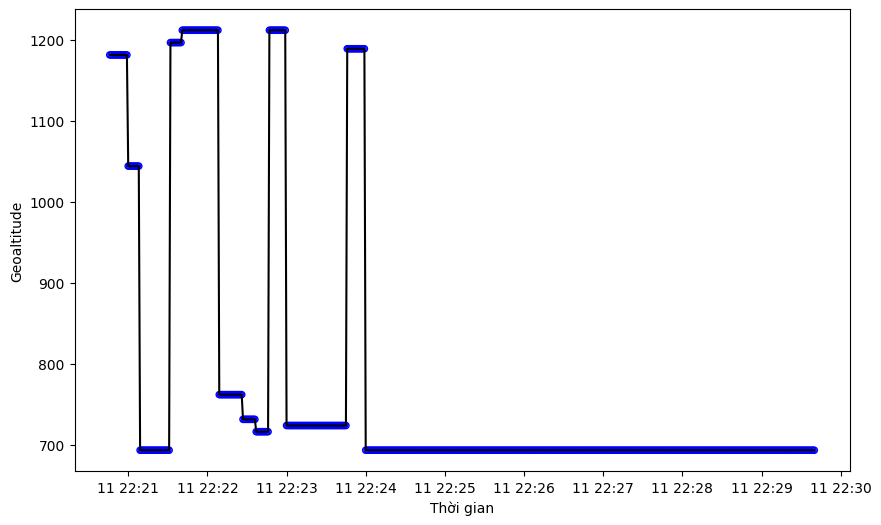

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ các chấm tròn rỗng với kích thước nhỏ hơn
plt.scatter(specific_flight_data.index, specific_flight_data['geoaltitude'], color='none', edgecolor='blue', s=20)

# Vẽ đường nối các chấm
plt.plot(specific_flight_data.index, specific_flight_data['geoaltitude'], color='black')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('Geoaltitude')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng heading theo thời gian

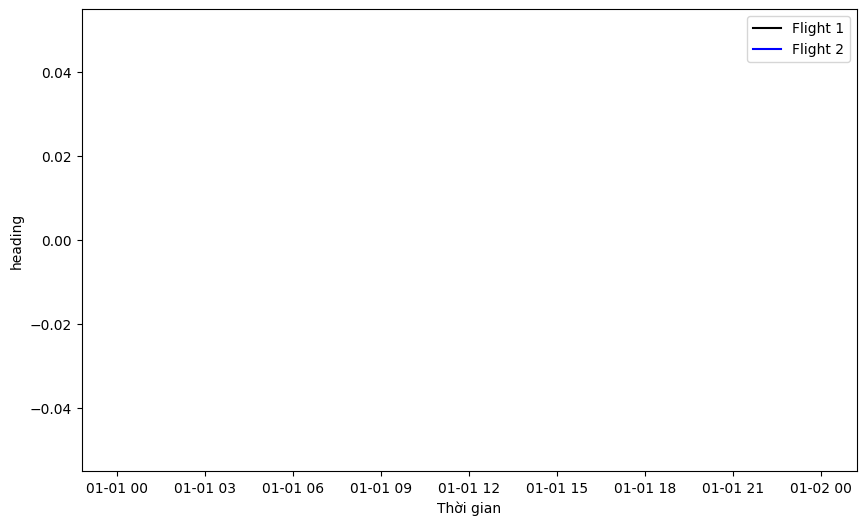

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data2 = data2[(data2.index.date == search_date.date()) & (data2['icao24'] == 'a7912a')]
specific_flight_data = data[(data.index.date == search_date.date()) & (data['icao24'] == 'abe056')]

# Vẽ các chấm tròn rỗng
plt.scatter(specific_flight_data2.index, specific_flight_data2['heading'], color='none', edgecolor='black')
plt.scatter(specific_flight_data.index, specific_flight_data['heading'], color='none', edgecolor='blue')

# Vẽ đường nối các chấm
plt.plot(specific_flight_data2.index, specific_flight_data2['heading'], color='black', label='Flight 1')
plt.plot(specific_flight_data.index, specific_flight_data['heading'], color='blue', label='Flight 2')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('heading')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
!pip install traffic

In [ ]:
from traffic.core import Flight

In [ ]:
from traffic.data import airports
airports['ATL']

In [ ]:
from traffic.data import aircraft
aircraft["aba941"]

In [ ]:
data = data.rename(columns={'time': 'timestamp'})


In [ ]:
import folium

# Tạo một bản đồ với tọa độ trung tâm là vị trí của sân bay ATL
m = folium.Map(location=[33.6407, -84.4277], zoom_start=10)

# Đánh dấu vị trí của sân bay ATL trên bản đồ
folium.Marker([33.6407, -84.4277], tooltip='ATL Airport').add_to(m)

# Hiển thị bản đồ
m


In [ ]:
from traffic.core import Flight

# Tạo một đối tượng Flight từ DataFrame data
flight = Flight(data)

# Bây giờ bạn có thể sử dụng đối tượng flight để truy cập vào dữ liệu và thực hiện các phân tích


In [ ]:
start_time = pd.to_datetime("2017-03-30 00:03:32")
end_time = pd.to_datetime("2017-03-30 15:12:15")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi thời gian thành datetime64
start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)

# Lọc dữ liệu trong khoảng thời gian cần vẽ
flight_subset = flight.between(start_time, end_time)

# Vẽ biểu đồ tốc độ của chuyến bay trong khoảng thời gian đã lọc
plt.plot(flight_subset.data.timestamp, flight_subset.data.velocity)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Flight Velocity')
plt.show()


In [ ]:
flight.between(start_time, end_time).data

NameError: name 'flight' is not defined

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

flight_subset = flight.between(start_time, end_time)

# Dữ liệu kinh độ, vĩ độ, độ cao và thời gian từ DataFrame đã lọc
longitude = flight_subset.data['lon']
latitude = flight_subset.data['lat']
altitude = flight_subset.data['geoaltitude']
timestamp = flight_subset.data['timestamp']

# Vẽ điểm dữ liệu trên biểu đồ 3D với màu sắc dựa trên thời gian
sc = ax.scatter(longitude, latitude, altitude, c=timestamp, cmap='viridis')

# Đặt nhãn cho các trục
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
plt.colorbar(sc, label='Time')

# Hiển thị biểu đồ
plt.show()
